Get List Of Websites(1000) <br>
Go trough each page and check If they are using Webpack <br>
If not using webpack Check What Javascript Library/Libraries the page is using <br>
If JS Lib is found Find version By checking the link and if no match use a Diff Tool<br>
Python  3.11.7

In [1]:
websites = open("WebList.txt",'r')
for website in websites:
    print(website)

https://www.vkontakte.ru

https://www.cocolog-nifty.com

https://www.huffingtonpost.com

https://www.amazon.com

https://www.nydailynews.com

https://www.netscape.com

https://www.goo.ne.jp

https://www.whitehouse.gov

https://www.freewebs.com

https://www.soup.io

https://www.squidoo.com

https://www.uol.com.br

https://www.deviantart.com

https://www.shutterfly.com

https://www.vistaprint.com

https://www.macromedia.com

https://www.oakley.com

https://www.sbwire.com

https://www.bloglovin.com

https://www.themeforest.net

https://www.economist.com

https://www.pen.io

https://www.hc360.com

https://www.is.gd

https://www.dagondesign.com

https://www.printfriendly.com

https://www.gravatar.com

https://www.ezinearticles.com

https://www.phpbb.com

https://www.blog.com

https://www.clickbank.net

https://www.sourceforge.net

https://www.trellian.com

https://www.ebay.com

https://www.disqus.com

https://www.loc.gov

https://www.dailymail.co.uk

https://www.wikia.com

https://www.redif

In [2]:
from selenium import webdriver
import threading

def detect_js_libraries(url):
    driver = webdriver.Chrome()
    driver.get(url)
    
    libraries = []

    #Detect jQuery
    jquery_version = driver.execute_script("return (typeof jQuery !== 'undefined') ? jQuery.fn.jquery : null;")
    if jquery_version:
        libraries.append({"library": "jQuery", "version": jquery_version})

    #Detect React
    react_version = driver.execute_script(
        "return (typeof React !== 'undefined') ? React.version : ((typeof _react !== 'undefined') ? _react.version : null);")
    if react_version:
        libraries.append({"library": "React", "version": react_version})

    driver.quit()
    return libraries

def process_website(url):
    libraries = detect_js_libraries(url)
    print(f"Website: {url}")
    for lib in libraries:
        print(f" - {lib['library']} version {lib['version']}")

def main():
    websites = ["https://www.facebook.com/", "https://www.nike.com/it/?cp=49474584967_search_1706974122400400000&mfadid=adm"]
    
    threads = []
    for website in websites:
        thread = threading.Thread(target=process_website, args=(website,))
        threads.append(thread)
        thread.start()
    
    for thread in threads:
        thread.join()

if __name__ == "__main__":
    main()


Exception in thread Thread-6 (process_website):
Traceback (most recent call last):
  File "c:\Users\mical\anaconda3\envs\prototypeEnviorment\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "c:\Users\mical\anaconda3\envs\prototypeEnviorment\Lib\site-packages\ipykernel\ipkernel.py", line 761, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\mical\anaconda3\envs\prototypeEnviorment\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\mical\AppData\Local\Temp\ipykernel_13824\4189732369.py", line 25, in process_website
  File "C:\Users\mical\AppData\Local\Temp\ipykernel_13824\4189732369.py", line 11, in detect_js_libraries
  File "c:\Users\mical\anaconda3\envs\prototypeEnviorment\Lib\site-packages\selenium\webdriver\remote\webdriver.py", line 407, in execute_script
    return self.execute(command, {"script": script, "args": converted_args})["value"]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Website: https://www.facebook.com/


KeyboardInterrupt: 

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
from urllib.parse import urlparse
import threading
import time

def get_base_url(url):
    parsed_url = urlparse(url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    return base_url

def is_internal_link(base_url, link):
    return urlparse(link).netloc == urlparse(base_url).netloc

def detect_js_libraries(driver):
    libraries = []

    # jQuery
    jquery_version = driver.execute_script("return (typeof jQuery !== 'undefined') ? jQuery.fn.jquery : null;")
    if jquery_version:
        libraries.append({"library": "jQuery", "version": jquery_version})

    # Dojo
    dojo_version = driver.execute_script("return (typeof dojo !== 'undefined') ? dojo.version.toString() : null;")
    if dojo_version:
        libraries.append({"library": "Dojo", "version": dojo_version})

    # D3
    d3_version = driver.execute_script("return (typeof d3 !== 'undefined') ? d3.version : null;")
    if d3_version:
        libraries.append({"library": "D3", "version": d3_version})

    # Pixi.js
    pixi_version = driver.execute_script("return (typeof PIXI !== 'undefined') ? PIXI.VERSION : null;")
    if pixi_version:
        libraries.append({"library": "Pixi.js", "version": pixi_version})

    # Three.js
    three_version = driver.execute_script("return (typeof THREE !== 'undefined') ? THREE.REVISION : null;")
    if three_version:
        libraries.append({"library": "Three.js", "version": three_version})

    # Velocity.js
    velocity_version = driver.execute_script("return (typeof Velocity !== 'undefined') ? Velocity.version.major + '.' + Velocity.version.minor + '.' + Velocity.version.patch : null;")
    if velocity_version:
        libraries.append({"library": "Velocity.js", "version": velocity_version})

    #React
    react_version = driver.execute_script(
        "return (typeof React !== 'undefined') ? React.version : ((typeof _react !== 'undefined') ? _react.version : null);")
    if react_version:
        libraries.append({"library": "React", "version": react_version})

    # Vue.js
    vue_version = driver.execute_script("return (typeof Vue !== 'undefined') ? Vue.version : null;")
    if vue_version:
        libraries.append({"library": "Vue", "version": vue_version})

    # Ember.js
    ember_version = driver.execute_script("return (typeof Ember !== 'undefined') ? Ember.VERSION : null;")
    if ember_version:
        libraries.append({"library": "Ember", "version": ember_version})

    # Angular
    angular_version = driver.execute_script(
        "return (window.angular !== undefined) ? window.angular.version.full : " 
        "((window.ng !== undefined && window.ng.version !== undefined) ? window.ng.version.full : null);")
    if angular_version:
        libraries.append({"library": "Angular", "version": angular_version})

    return libraries

def get_links(driver, url, max_links=25):
    base_url = get_base_url(url)
    driver.get(url)
    time.sleep(3)  # Wait for the page to load
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    links = set()  # Use a set to avoid duplicates

    for a in soup.find_all('a', href=True):
        href = a['href']
        # Check if the link is internal
        if href.startswith('http') and is_internal_link(base_url, href) and href not in links:
            links.add(href)
            if len(links) == max_links:
                break
    return list(links)

def visit_links(driver, website, links):
    js_libraries_info = []
    for link in links:
        try:
            driver.get(link)
            time.sleep(2)  # Adjust time as needed
            libraries = detect_js_libraries(driver)
            if libraries:
                js_libraries_info.append({link: libraries})
        except Exception as e:
            print(f"Error visiting {link}: {e}")
    print(f"JavaScript libraries found in {website}: {js_libraries_info}")
    return js_libraries_info

def process_websites(websites):
    driver = webdriver.Chrome()
    all_website_info = {}
    for website in websites:
        try:
            links = get_links(driver, website)
            print(f"Collecting links from: {website}")
            js_libraries_info = visit_links(driver, website, links)
            all_website_info[website] = js_libraries_info
        except Exception as e:
            print(f"Error processing {website}: {e}")
    driver.quit()
    return all_website_info

def main():
    with open("WebList.txt", 'r') as file:
        websites = [line.strip() for line in file if line.strip()]

    # Split the websites list into 4 roughly equal parts for threading
    chunk_size = len(websites) // 4
    threads = []
    all_website_info = []

    def thread_func(websites_slice):
        info = process_websites(websites_slice)
        all_website_info.append(info)

    for i in range(0, len(websites), chunk_size):
        end = i + chunk_size if (i + chunk_size) < len(websites) else len(websites)
        thread = threading.Thread(target=thread_func, args=(websites[i:end],))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

    # Optionally, aggregate or save all_website_info results here

if __name__ == "__main__":
    main()

Error processing https://www.theguardian.com: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=122.0.6261.69)
Stacktrace:
	GetHandleVerifier [0x00007FF632DE4C82+3505170]
	(No symbol) [0x00007FF632A10852]
	(No symbol) [0x00007FF6328C4145]
	(No symbol) [0x00007FF6328A1D4C]
	(No symbol) [0x00007FF6329325F7]
	(No symbol) [0x00007FF632947A61]
	(No symbol) [0x00007FF63292BC33]
	(No symbol) [0x00007FF6328FD618]
	(No symbol) [0x00007FF6328FE6B1]
	GetHandleVerifier [0x00007FF632E167DD+3708781]
	GetHandleVerifier [0x00007FF632E6FC5D+4074477]
	GetHandleVerifier [0x00007FF632E67DDF+4042095]
	GetHandleVerifier [0x00007FF632B3A136+708806]
	(No symbol) [0x00007FF632A1CB0F]
	(No symbol) [0x00007FF632A17D14]
	(No symbol) [0x00007FF632A17E6C]
	(No symbol) [0x00007FF632A079A4]
	BaseThreadInitThunk [0x00007FFF4E4E257D+29]
	RtlUserThreadStart [0x00007FFF4E90AA58+40]

Error processing https://www.tripadvisor.com: Message: no such window: ta

KeyboardInterrupt: 

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs
import threading
import time
import re
import sqlite3


def initialize_db(db_name="website_data.db"):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''CREATE TABLE IF NOT EXISTS websites
                          (id INTEGER PRIMARY KEY, url TEXT UNIQUE)''')
        cursor.execute('''CREATE TABLE IF NOT EXISTS libraries
                          (id INTEGER PRIMARY KEY, website_id INTEGER, link TEXT,
                           library TEXT, version TEXT,
                           FOREIGN KEY(website_id) REFERENCES websites(id))''')
        # Commit is automatic with the context manager

    
def insert_website_get_id(url, db_name="website_data.db"):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("INSERT OR IGNORE INTO websites (url) VALUES (?)", (url,))
        cursor.execute("SELECT id FROM websites WHERE url = ?", (url,))
        website_id = cursor.fetchone()[0]
    return website_id

def insert_libraries(website_id, libraries, db_name="website_data.db"):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        libraries_data = [(website_id, lib['link'], lib['library'], lib['version']) for lib in libraries]
        cursor.executemany('''INSERT INTO libraries (website_id, link, library, version)
                              VALUES (?, ?, ?, ?)''', libraries_data)


def check_link_processed(website_id, link, db_name="website_data.db"):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    cursor.execute("SELECT id FROM libraries WHERE website_id = ? AND link = ?", (website_id, link))
    result = cursor.fetchone()
    conn.close()
    return result is not None


def get_base_url(url):
    parsed_url = urlparse(url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    return base_url

def is_internal_link(base_url, link):
    return urlparse(link).netloc == urlparse(base_url).netloc

def detect_webpack(soup):
    # Look for script tags that might indicate Webpack usage
    script_tags = soup.find_all('script', src=True)
    webpack_patterns = [r"bundle\.js", r"webpack", r"\.chunk\.js"]
    for script in script_tags:
        src = script.get('src', '')
        for pattern in webpack_patterns:
            if re.search(pattern, src, re.IGNORECASE):
                return True  # Webpack likely used
    return False
def detect_js_libraries(driver,soup=None):
    libraries = []

    #First, check if Webpack is used
    if detect_webpack(soup):
        libraries.append({"library": "Webpack", "version": "Unknown"})
        
    # jQuery
    jquery_version = driver.execute_script("return (typeof jQuery !== 'undefined') ? jQuery.fn.jquery : null;")
    if jquery_version:
        libraries.append({"library": "jQuery", "version": jquery_version})

    # Dojo
    dojo_version = driver.execute_script("return (typeof dojo !== 'undefined') ? dojo.version.toString() : null;")
    if dojo_version:
        libraries.append({"library": "Dojo", "version": dojo_version})

    # D3
    d3_version = driver.execute_script("return (typeof d3 !== 'undefined') ? d3.version : null;")
    if d3_version:
        libraries.append({"library": "D3", "version": d3_version})

    # Pixi.js
    pixi_version = driver.execute_script("return (typeof PIXI !== 'undefined') ? PIXI.VERSION : null;")
    if pixi_version:
        libraries.append({"library": "Pixi.js", "version": pixi_version})

    # Three.js
    three_version = driver.execute_script("return (typeof THREE !== 'undefined') ? THREE.REVISION : null;")
    if three_version:
        libraries.append({"library": "Three.js", "version": three_version})

    # Velocity.js
    velocity_version = driver.execute_script("return (typeof Velocity !== 'undefined') ? Velocity.version.major + '.' + Velocity.version.minor + '.' + Velocity.version.patch : null;")
    if velocity_version:
        libraries.append({"library": "Velocity.js", "version": velocity_version})

    #React
    react_version = driver.execute_script(
        "return (typeof React !== 'undefined') ? React.version : ((typeof _react !== 'undefined') ? _react.version : null);")
    if react_version:
        libraries.append({"library": "React", "version": react_version})

    # Vue.js
    vue_version = driver.execute_script("return (typeof Vue !== 'undefined') ? Vue.version : null;")
    if vue_version:
        libraries.append({"library": "Vue", "version": vue_version})

    # Ember.js
    ember_version = driver.execute_script("return (typeof Ember !== 'undefined') ? Ember.VERSION : null;")
    if ember_version:
        libraries.append({"library": "Ember", "version": ember_version})

    # Angular
    angular_version = driver.execute_script(
        "return (window.angular !== undefined) ? window.angular.version.full : " 
        "((window.ng !== undefined && window.ng.version !== undefined) ? window.ng.version.full : null);")
    if angular_version:
        libraries.append({"library": "Angular", "version": angular_version})
    
    if soup is None:
        soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    for script in soup.find_all('script', src=True):
        src = script['src']
        
        #Pattern examples for popular libraries (simplified for demonstration)
        patterns = {
            'jquery': r"jquery(?:\.min)?\.js",
            'dojo': r"dojo\.js",
            'd3': r"d3(?:\.min)?\.js",
            'pixi': r"pixi(?:\.min)?\.js",
            'three': r"three(?:\.min)?\.js",
            'velocity': r"velocity(?:\.min)?\.js",
            'react': r"react(?:\.development|\.production\.min)?\.js",
            'vue': r"vue(?:\.min)?\.js",
            'ember': r"ember\.min\.js",
            'angular': r"angular(?:\.min)?\.js",
        }

        for lib, pattern in patterns.items():
            if re.search(pattern, src, re.IGNORECASE):
                version_query = parse_qs(urlparse(src).query).get('v', ['Unknown'])[0]
                libraries.append({"library": lib.capitalize(), "version": version_query})
                break  # Assuming one script won't match multiple libraries

    return libraries


def get_links(driver, url, max_links=25):
    base_url = get_base_url(url)
    driver.get(url)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    links = set()  #Use a set to avoid duplicates

    for a in soup.find_all('a', href=True):
        href = a['href']
        #Check if the link is internal
        if href.startswith('http') and is_internal_link(base_url, href) and href not in links:
            links.add(href)
            if len(links) == max_links:
                break
    return list(links)

def visit_links(driver, website_id, website, links, db_name="website_data.db"):
    js_libraries_info = []
    for link in links:
        if check_link_processed(website_id, link, db_name=db_name):
            print(f"Skipping already processed link: {link}")
            continue
        try:
            driver.get(link)
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            detected_libraries = detect_js_libraries(driver, soup=soup)
            libraries = [{'link': link, 'library': lib['library'], 'version': lib['version']} for lib in detected_libraries]
            if libraries:
                js_libraries_info.append({link: libraries})
                insert_libraries(website_id, libraries, db_name=db_name)  # Adjusted call
        except Exception as e:
            print(f"Error visiting {link}: {e}")
    print(f"JavaScript libraries found in {website}: {js_libraries_info}")
    return js_libraries_info


def process_websites(websites, db_name="website_data.db"):
    driver = webdriver.Chrome()
    for website in websites:
        website_id = insert_website_get_id(website, db_name=db_name)
        try:
            links = get_links(driver, website)
            print(f"Collecting links from: {website}")
            # Pass website_id to visit_links
            js_libraries_info = visit_links(driver, website_id, website, links, db_name=db_name)
        except Exception as e:
            print(f"Error processing {website}: {e}")
    driver.quit()

def main():
    with open("WebList.txt", 'r') as file:
        websites = [line.strip() for line in file if line.strip()]

    #Split the websites list into 4 roughly equal parts for threading
    chunk_size = len(websites) // 4
    threads = []
    all_website_info = []

    def thread_func(websites_slice):
        info = process_websites(websites_slice)
        all_website_info.append(info)

    for i in range(0, len(websites), chunk_size):
        end = i + chunk_size if (i + chunk_size) < len(websites) else len(websites)
        thread = threading.Thread(target=thread_func, args=(websites[i:end],))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

    #Optionally, aggregate or save all_website_info results here

if __name__ == "__main__":
    initialize_db()  # Ensure the database is ready before starting
    main()

Skipping already processed link: https://www.theguardian.com/weekly?INTCMP=gdnwb_mawns_editorial_gweekly_GW_TopNav_Int
Skipping already processed link: https://www.theguardian.com/world
Skipping already processed link: https://www.theguardian.com/world/middleeast
Skipping already processed link: https://www.theguardian.com/culture/all
Skipping already processed link: https://www.theguardian.com/world/europe-news
Skipping already processed link: https://www.theguardian.com/membership
Skipping already processed link: https://www.theguardian.com/environment/climate-crisis
Skipping already processed link: https://www.theguardian.com/commentisfree/all
Skipping already processed link: https://www.theguardian.com/inpictures
Skipping already processed link: https://www.theguardian.com/world/palestinian-territories
Skipping already processed link: https://www.theguardian.com/lifeandstyle/all
Skipping already processed link: https://www.theguardian.com/documentaries
Skipping already processed li

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs
import threading
import time
import re
import sqlite3

def get_website_status(url, db_name="website_data.db"):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT status FROM websites WHERE url = ?", (url,))
        status = cursor.fetchone()
        if status:
            return status[0]
        else:
            return None

def update_website_status(url, status, db_name="website_data.db"):

    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''UPDATE websites SET status = ? WHERE url = ?''', (status, url))
def modify_websites_table_add_status(db_name="website_data.db"):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        # Add a 'status' column to 'websites' table
        cursor.execute('''ALTER TABLE websites ADD COLUMN status TEXT DEFAULT 'Started' ''')
        # Initialize status for existing rows (if any)
        cursor.execute('''UPDATE websites SET status = 'Started' WHERE status IS NULL''')

def initialize_db(db_name="website_data.db"):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''CREATE TABLE IF NOT EXISTS websites
                          (id INTEGER PRIMARY KEY, url TEXT UNIQUE)''')
        cursor.execute('''CREATE TABLE IF NOT EXISTS libraries
                          (id INTEGER PRIMARY KEY, website_id INTEGER, link TEXT,
                           library TEXT, version TEXT,
                           FOREIGN KEY(website_id) REFERENCES websites(id))''')
        # Commit is automatic with the context manager

def insert_website_get_id(url, db_name="website_data.db"):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("INSERT OR IGNORE INTO websites (url) VALUES (?)", (url,))
        cursor.execute("SELECT id FROM websites WHERE url = ?", (url,))
        website_id = cursor.fetchone()[0]
    return website_id

def insert_libraries(website_id, libraries, db_name="website_data.db"):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        libraries_data = [(website_id, lib['link'], lib['library'], lib['version']) for lib in libraries]
        cursor.executemany('''INSERT INTO libraries (website_id, link, library, version)
                              VALUES (?, ?, ?, ?)''', libraries_data)

def check_link_processed(website_id, link, db_name="website_data.db"):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    cursor.execute("SELECT id FROM libraries WHERE website_id = ? AND link = ?", (website_id, link))
    result = cursor.fetchone()
    conn.close()
    return result is not None

def get_base_url(url):
    parsed_url = urlparse(url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    return base_url

def is_internal_link(base_url, link):
    return urlparse(link).netloc == urlparse(base_url).netloc

def detect_webpack(soup):
    # Look for script tags that might indicate Webpack usage
    script_tags = soup.find_all('script', src=True)
    webpack_patterns = [r"bundle\.js", r"webpack", r"\.chunk\.js"]
    for script in script_tags:
        src = script.get('src', '')
        for pattern in webpack_patterns:
            if re.search(pattern, src, re.IGNORECASE):
                return True  # Webpack likely used
    return False
def detect_js_libraries(driver,soup=None):
    libraries = []

    #First, check if Webpack is used
    if detect_webpack(soup):
        libraries.append({"library": "Webpack", "version": "Unknown"})
        
    # jQuery
    jquery_version = driver.execute_script("return (typeof jQuery !== 'undefined') ? jQuery.fn.jquery : null;")
    if jquery_version:
        libraries.append({"library": "jQuery", "version": jquery_version})

    # Dojo
    dojo_version = driver.execute_script("return (typeof dojo !== 'undefined') ? dojo.version.toString() : null;")
    if dojo_version:
        libraries.append({"library": "Dojo", "version": dojo_version})

    # D3
    d3_version = driver.execute_script("return (typeof d3 !== 'undefined') ? d3.version : null;")
    if d3_version:
        libraries.append({"library": "D3", "version": d3_version})

    # Pixi.js
    pixi_version = driver.execute_script("return (typeof PIXI !== 'undefined') ? PIXI.VERSION : null;")
    if pixi_version:
        libraries.append({"library": "Pixi.js", "version": pixi_version})

    # Three.js
    three_version = driver.execute_script("return (typeof THREE !== 'undefined') ? THREE.REVISION : null;")
    if three_version:
        libraries.append({"library": "Three.js", "version": three_version})

    # Velocity.js
    velocity_version = driver.execute_script("return (typeof Velocity !== 'undefined') ? Velocity.version.major + '.' + Velocity.version.minor + '.' + Velocity.version.patch : null;")
    if velocity_version:
        libraries.append({"library": "Velocity.js", "version": velocity_version})

    #React
    react_version = driver.execute_script(
        "return (typeof React !== 'undefined') ? React.version : ((typeof _react !== 'undefined') ? _react.version : null);")
    if react_version:
        libraries.append({"library": "React", "version": react_version})

    # Vue.js
    vue_version = driver.execute_script("return (typeof Vue !== 'undefined') ? Vue.version : null;")
    if vue_version:
        libraries.append({"library": "Vue", "version": vue_version})

    # Ember.js
    ember_version = driver.execute_script("return (typeof Ember !== 'undefined') ? Ember.VERSION : null;")
    if ember_version:
        libraries.append({"library": "Ember", "version": ember_version})

    # Angular
    angular_version = driver.execute_script(
        "return (window.angular !== undefined) ? window.angular.version.full : " 
        "((window.ng !== undefined && window.ng.version !== undefined) ? window.ng.version.full : null);")
    if angular_version:
        libraries.append({"library": "Angular", "version": angular_version})
    
    if soup is None:
        soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    for script in soup.find_all('script', src=True):
        src = script['src']
        
        #Pattern examples for popular libraries 
        patterns = {
            'jquery': r"jquery(?:\.min)?\.js",
            'dojo': r"dojo\.js",
            'd3': r"d3(?:\.min)?\.js",
            'pixi': r"pixi(?:\.min)?\.js",
            'three': r"three(?:\.min)?\.js",
            'velocity': r"velocity(?:\.min)?\.js",
            'react': r"react(?:\.development|\.production\.min)?\.js",
            'vue': r"vue(?:\.min)?\.js",
            'ember': r"ember\.min\.js",
            'angular': r"angular(?:\.min)?\.js",
        }

        for lib, pattern in patterns.items():
            if re.search(pattern, src, re.IGNORECASE):
                version_query = parse_qs(urlparse(src).query).get('v', ['Unknown'])[0]
                libraries.append({"library": lib.capitalize(), "version": version_query})
                break  # Assuming one script won't match multiple libraries

    return libraries

def get_links(driver, url, max_links=25):
    base_url = get_base_url(url)
    driver.get(url)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    links = set()  #Use a set to avoid duplicates

    for a in soup.find_all('a', href=True):
        href = a['href']
        #Check if the link is internal
        if href.startswith('http') and is_internal_link(base_url, href) and href not in links:
            links.add(href)
            if len(links) == max_links:
                break
    return list(links)

def visit_links(driver, website_id, website, links, db_name="website_data.db"):
    js_libraries_info = []
    for link in links:
        if check_link_processed(website_id, link, db_name=db_name):
            print(f"Skipping already processed link: {link}")
            continue
        try:
            driver.get(link)
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            detected_libraries = detect_js_libraries(driver, soup=soup)
            libraries = [{'link': link, 'library': lib['library'], 'version': lib['version']} for lib in detected_libraries]
            if libraries:
                js_libraries_info.append({link: libraries})
                insert_libraries(website_id, libraries, db_name=db_name)  # Adjusted call
        except Exception as e:
            print(f"Error visiting {link}: {e}")
    print(f"JavaScript libraries found in {website}: {js_libraries_info}")
    return js_libraries_info

def process_websites(websites, db_name="website_data.db"):
    driver = webdriver.Chrome()
    for website in websites:
        status = get_website_status(website, db_name=db_name)
        if status == 'Done':
            print(f"Skipping {website} as it is already processed.")
            continue

        website_id = insert_website_get_id(website, db_name=db_name)
        update_website_status(website, 'Started', db_name=db_name)
        
        try:
            links = get_links(driver, website)
            update_website_status(website, 'Working', db_name=db_name)
            print(f"Collecting links from: {website}")
            
            js_libraries_info = visit_links(driver, website_id, website, links, db_name=db_name)
            update_website_status(website, 'Done', db_name=db_name)
        except Exception as e:
            print(f"Error processing {website}: {e}")
            update_website_status(website, 'Error', db_name=db_name)
    driver.quit()

def main():
    with open("WebList.txt", 'r') as file:
        websites = [line.strip() for line in file if line.strip()]

    #Split the websites list into 4 roughly equal parts for threading
    chunk_size = len(websites) // 4
    threads = []
    all_website_info = []

    def thread_func(websites_slice):
        info = process_websites(websites_slice)
        all_website_info.append(info)

    for i in range(0, len(websites), chunk_size):
        end = i + chunk_size if (i + chunk_size) < len(websites) else len(websites)
        thread = threading.Thread(target=thread_func, args=(websites[i:end],))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

    #Optionally, aggregate or save all_website_info results here

if __name__ == "__main__":
    initialize_db()  # Make sure the database is initialized
    #modify_websites_table_add_status()  # Add the status column if it hasn't been added yet
    main()  # Start processing


Skipping https://www.tripadvisor.com as it is already processed.
Skipping https://www.washington.edu as it is already processed.
Skipping https://www.ihg.com as it is already processed.
Skipping https://www.feedburner.com as it is already processed.
Skipping https://www.house.gov as it is already processed.
Skipping https://www.toplist.cz as it is already processed.
Skipping https://www.google.com.au as it is already processed.
Skipping https://www.hp.com as it is already processed.
Skipping https://www.scientificamerican.com as it is already processed.
Skipping https://www.buzzfeed.com as it is already processed.
Skipping https://www.yellowbook.com as it is already processed.
Skipping https://www.wikipedia.org as it is already processed.
Skipping https://www.posterous.com as it is already processed.
Skipping https://www.theguardian.com as it is already processed.
Skipping https://www.vinaora.com as it is already processed.
Skipping https://www.accuweather.com as it is already processe

In [ ]:
import sqlite3

def print_all_data(db_name="website_data.db"):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        
        # Fetch and print all websites with their status
        print("Websites and Status:")
        cursor.execute("SELECT id, url, status FROM websites")
        for row in cursor.fetchall():
            print(f"ID: {row[0]}, URL: {row[1]}, Status: {row[2]}")
        print("\n")

        # Fetch and print all libraries associated with each website
        print("Libraries:")
        cursor.execute("""
        SELECT websites.url, libraries.library, libraries.version, libraries.link 
        FROM libraries
        JOIN websites ON libraries.website_id = websites.id
        """)
        for row in cursor.fetchall():
            print(f"Website URL: {row[0]}, Library: {row[1]}, Version: {row[2]}, Script URL: {row[3]}")
        print("\n")

if __name__ == "__main__":
    print_all_data()  # Make sure to specify your database name if it's not 'website_data.db'


Websites and Status:
ID: 1, URL: https://www.theguardian.com, Status: Done
ID: 2, URL: https://www.tripadvisor.com, Status: Done
ID: 3, URL: https://www.state.gov, Status: Done
ID: 4, URL: https://www.booking.com, Status: Done
ID: 5, URL: https://www.vkontakte.ru, Status: Done
ID: 6, URL: https://www.cocolog-nifty.com, Status: Done
ID: 7, URL: https://www.huffingtonpost.com, Status: Done
ID: 8, URL: https://www.washington.edu, Status: Done
ID: 9, URL: https://www.amazon.com, Status: Done
ID: 10, URL: https://www.nydailynews.com, Status: Done
ID: 11, URL: https://www.bbb.org, Status: Done
ID: 12, URL: https://www.parallels.com, Status: Done
ID: 13, URL: https://www.mtv.com, Status: Done
ID: 14, URL: https://www.ihg.com, Status: Done
ID: 15, URL: https://www.edublogs.org, Status: Done
ID: 16, URL: https://www.alexa.com, Status: Done
ID: 17, URL: https://www.ibm.com, Status: Done
ID: 18, URL: https://www.digg.com, Status: Done
ID: 19, URL: https://www.t-online.de, Status: Done
ID: 20, URL

Websites and Status:
ID: 1, URL: https://www.theguardian.com, Status: Done
ID: 2, URL: https://www.tripadvisor.com, Status: Done
ID: 3, URL: https://www.state.gov, Status: Done
ID: 4, URL: https://www.booking.com, Status: Done
ID: 5, URL: https://www.vkontakte.ru, Status: Done
ID: 6, URL: https://www.cocolog-nifty.com, Status: Done
ID: 7, URL: https://www.huffingtonpost.com, Status: Done
ID: 8, URL: https://www.washington.edu, Status: Done
ID: 9, URL: https://www.amazon.com, Status: Done
ID: 10, URL: https://www.nydailynews.com, Status: Done
ID: 11, URL: https://www.bbb.org, Status: Done
ID: 12, URL: https://www.parallels.com, Status: Done
ID: 13, URL: https://www.mtv.com, Status: Done
ID: 14, URL: https://www.ihg.com, Status: Done
ID: 15, URL: https://www.edublogs.org, Status: Done
ID: 16, URL: https://www.alexa.com, Status: Done
ID: 17, URL: https://www.ibm.com, Status: Done
ID: 18, URL: https://www.digg.com, Status: Done
ID: 19, URL: https://www.t-online.de, Status: Done
ID: 20, URL

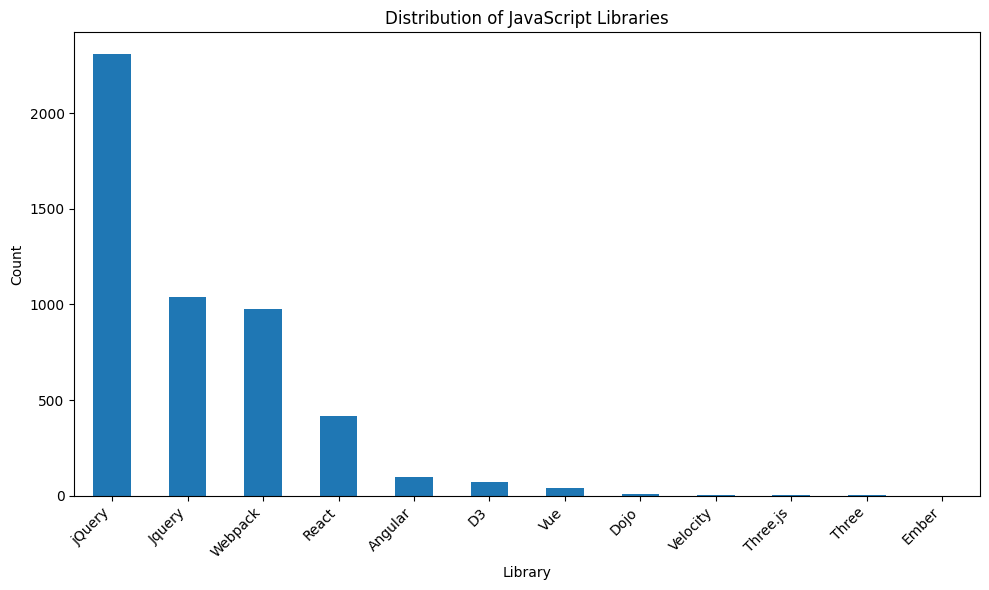

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

def print_all_data(db_name="website_data.db"):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        
        # Fetch and print all websites with their status
        print("Websites and Status:")
        cursor.execute("SELECT id, url, status FROM websites")
        for row in cursor.fetchall():
            print(f"ID: {row[0]}, URL: {row[1]}, Status: {row[2]}")
        print("\n")

        # Fetch and print all libraries associated with each website
        print("Libraries:")
        cursor.execute("""
        SELECT websites.url, libraries.library, libraries.version, libraries.link 
        FROM libraries
        JOIN websites ON libraries.website_id = websites.id
        """)
        for row in cursor.fetchall():
            print(f"Website URL: {row[0]}, Library: {row[1]}, Version: {row[2]}, Script URL: {row[3]}")
        print("\n")

def fetch_data_as_dataframe(db_name="website_data.db"):
    with sqlite3.connect(db_name) as conn:
        # Query to fetch library information
        query = """
        SELECT websites.url, libraries.library, libraries.version, libraries.link 
        FROM libraries
        JOIN websites ON libraries.website_id = websites.id
        """
        # Use pandas to load query result into DataFrame
        df = pd.read_sql_query(query, conn)
    return df

def print_statistics_and_generate_histograms(df):
    # Basic statistics on the number of libraries found
    print("Basic Statistics on Libraries:")
    library_counts = df['library'].value_counts()
    print(library_counts)
    print("\n")

    # Generate histogram for library distribution
    plt.figure(figsize=(10, 6))
    library_counts.plot(kind='bar')
    plt.title('Distribution of JavaScript Libraries')
    plt.xlabel('Library')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # Additional statistics can be added here as needed

def main(db_name="website_data.db"):
    df = fetch_data_as_dataframe(db_name)
    print_all_data(db_name)
    print_statistics_and_generate_histograms(df)

if __name__ == "__main__":
    main()

Websites and Status:
ID: 1, URL: https://www.theguardian.com, Status: Done
ID: 2, URL: https://www.tripadvisor.com, Status: Done
ID: 3, URL: https://www.state.gov, Status: Done
ID: 4, URL: https://www.booking.com, Status: Done
ID: 5, URL: https://www.vkontakte.ru, Status: Done
ID: 6, URL: https://www.cocolog-nifty.com, Status: Done
ID: 7, URL: https://www.huffingtonpost.com, Status: Done
ID: 8, URL: https://www.washington.edu, Status: Done
ID: 9, URL: https://www.amazon.com, Status: Done
ID: 10, URL: https://www.nydailynews.com, Status: Done
ID: 11, URL: https://www.bbb.org, Status: Done
ID: 12, URL: https://www.parallels.com, Status: Done
ID: 13, URL: https://www.mtv.com, Status: Done
ID: 14, URL: https://www.ihg.com, Status: Done
ID: 15, URL: https://www.edublogs.org, Status: Done
ID: 16, URL: https://www.alexa.com, Status: Done
ID: 17, URL: https://www.ibm.com, Status: Done
ID: 18, URL: https://www.digg.com, Status: Done
ID: 19, URL: https://www.t-online.de, Status: Done
ID: 20, URL

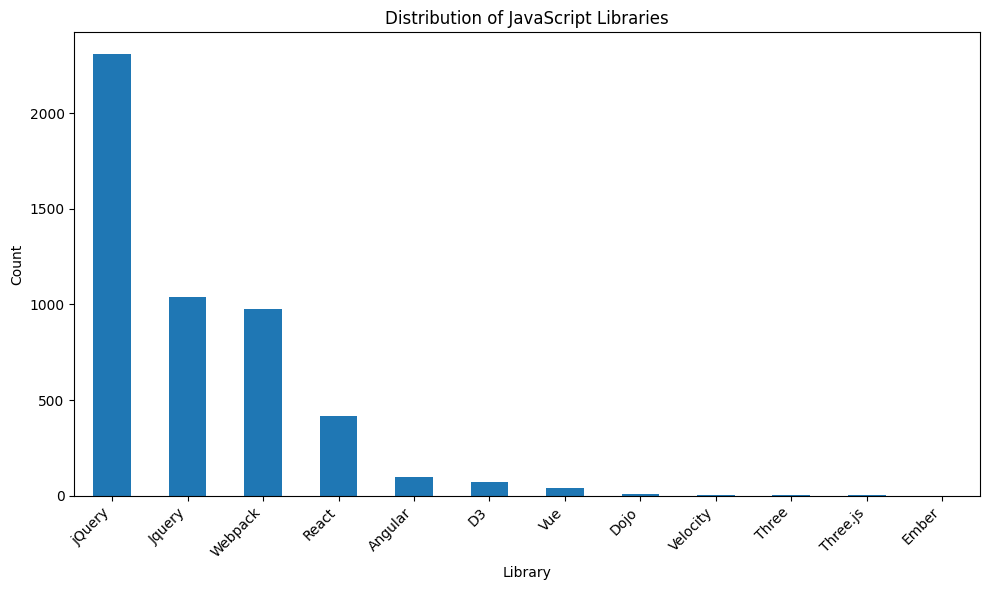

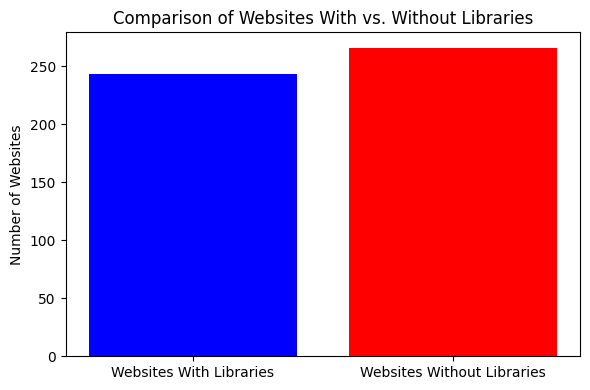

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

def fetch_data_as_dataframe(db_name="website_data.db"):
    with sqlite3.connect(db_name) as conn:
        # Query to fetch all libraries and corresponding website URLs
        query = """
        SELECT websites.url, libraries.library, libraries.version, libraries.link 
        FROM websites
        LEFT JOIN libraries ON websites.id = libraries.website_id
        """
        # Load query results into a DataFrame
        df = pd.read_sql_query(query, conn)
    return df

def identify_websites_without_libraries(df):
    # Identify websites without libraries by checking for NaN in 'library' column
    websites_without_libraries = df[df['library'].isna()]['url'].unique()
    print("Websites Without Any Libraries:")
    for url in websites_without_libraries:
        print(url)
    print("\nTotal Websites Without Any Libraries:", len(websites_without_libraries))
    print("\n")

def print_statistics_and_generate_histograms(df):
    # Filter out rows where 'library' is NaN before generating statistics for libraries
    df_with_libraries = df.dropna(subset=['library'])
    websites_with_libraries_count = len(df_with_libraries['url'].unique())
    websites_without_libraries_count = len(df[df['library'].isna()]['url'].unique())

    # Basic statistics on the number of libraries found
    print("Basic Statistics on Libraries:")
    library_counts = df_with_libraries['library'].value_counts()
    print(library_counts.to_string())
    print("\n")

    # Generate histogram for library distribution
    plt.figure(figsize=(10, 6))
    library_counts.plot(kind='bar')
    plt.title('Distribution of JavaScript Libraries')
    plt.xlabel('Library')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # Generate histogram to compare websites with and without libraries
    plt.figure(figsize=(6, 4))
    categories = ['Websites With Libraries', 'Websites Without Libraries']
    counts = [websites_with_libraries_count, websites_without_libraries_count]
    plt.bar(categories, counts, color=['blue', 'red'])
    plt.title('Comparison of Websites With vs. Without Libraries')
    plt.ylabel('Number of Websites')
    plt.tight_layout()
    plt.show()

def main(db_name="website_data.db"):
    df = fetch_data_as_dataframe(db_name)
    print_all_data(db_name)
    identify_websites_without_libraries(df)
    print_statistics_and_generate_histograms(df)

if __name__ == "__main__":
    main()


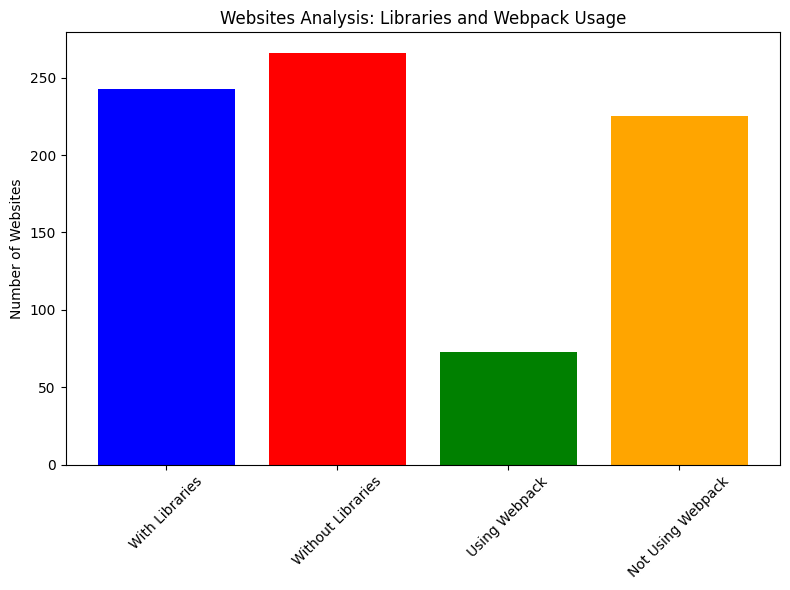

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

def analyze_libraries_and_webpack(db_name="website_data.db"):
    # Connect to the SQLite database
    conn = sqlite3.connect(db_name)
    # Query to fetch URL, library, and check for Webpack
    query = """
    SELECT websites.url, libraries.library,
    CASE WHEN libraries.library LIKE '%webpack%' THEN 'Yes' ELSE 'No' END AS uses_webpack
    FROM websites
    LEFT JOIN libraries ON websites.id = libraries.website_id
    """
    # Convert query results to a DataFrame
    df = pd.read_sql_query(query, conn)
    conn.close()

    # Identify websites with and without libraries
    websites_with_libraries = df.dropna(subset=['library'])
    websites_without_libraries = df[df['library'].isna()]

    # Websites using Webpack
    websites_using_webpack = websites_with_libraries[websites_with_libraries['uses_webpack'] == 'Yes']
    websites_not_using_webpack = websites_with_libraries[websites_with_libraries['uses_webpack'] == 'No']

    # Count of websites in each category
    counts = {
        'With Libraries': len(websites_with_libraries['url'].unique()),
        'Without Libraries': len(websites_without_libraries['url'].unique()),
        'Using Webpack': len(websites_using_webpack['url'].unique()),
        'Not Using Webpack': len(websites_not_using_webpack['url'].unique())
    }

    # Generate histogram
    plt.figure(figsize=(8, 6))
    plt.bar(counts.keys(), counts.values(), color=['blue', 'red', 'green', 'orange'])
    plt.title('Websites Analysis: Libraries and Webpack Usage')
    plt.ylabel('Number of Websites')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    analyze_libraries_and_webpack()

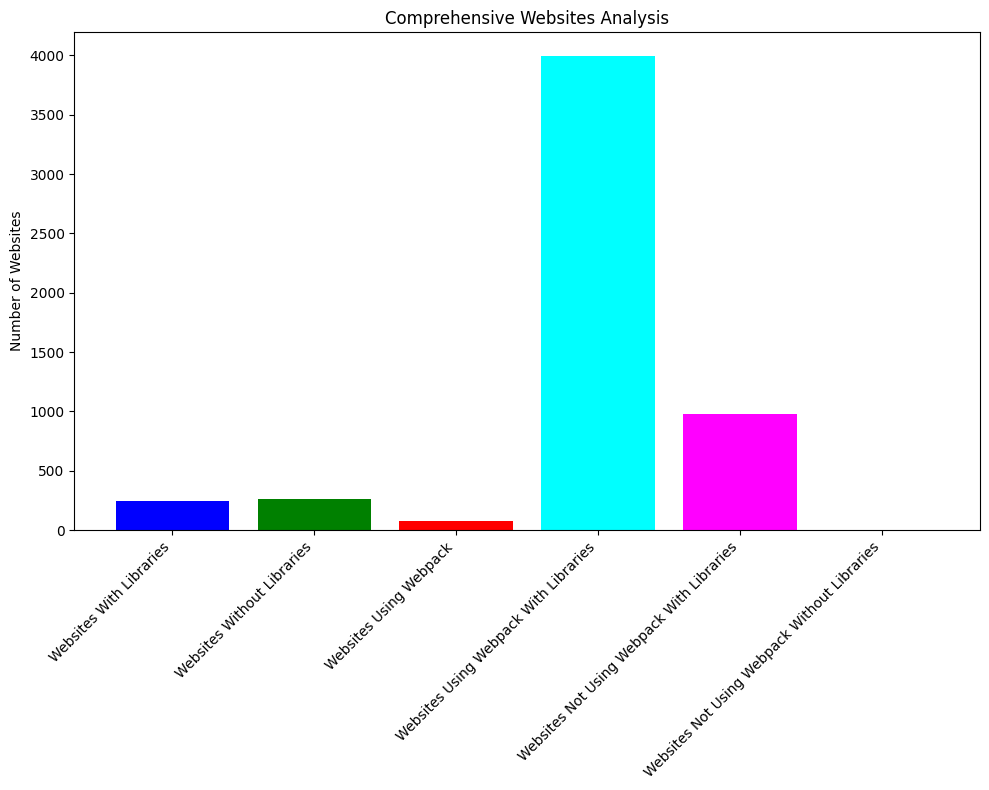

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

def analyze_libraries_webpack_categories(db_name="website_data.db"):
    # Connect to the SQLite database
    conn = sqlite3.connect(db_name)
    # Query to fetch URL, library, and check for Webpack usage
    query = """
    SELECT websites.url, 
           libraries.library,
           CASE 
               WHEN libraries.library LIKE '%webpack%' THEN 'Yes' 
               ELSE 'No' 
           END AS uses_webpack
    FROM websites
    LEFT JOIN libraries ON websites.id = libraries.website_id
    """
    # Convert query results to a DataFrame
    df = pd.read_sql_query(query, conn)
    conn.close()

    # Determine webpack usage across all websites
    df['has_library'] = df['library'].notna()

    # Create a cross-tabulation
    crosstab = pd.crosstab(index=df['url'], columns=[df['uses_webpack'], df['has_library']], dropna=False)

    # Rename the columns for clarity
    crosstab.columns = ['Webpack No Lib', 'Webpack With Lib', 'No Webpack No Lib', 'No Webpack With Lib']
    
    # Calculate total counts for each category
    total_counts = {
        'Websites With Libraries': df['url'][df['has_library']].nunique(),
        'Websites Without Libraries': df['url'][~df['has_library']].nunique(),
        'Websites Using Webpack': df['url'][df['uses_webpack'] == 'Yes'].nunique(),
        'Websites Using Webpack With Libraries': crosstab['Webpack With Lib'].sum(),
        'Websites Not Using Webpack With Libraries': crosstab['No Webpack With Lib'].sum(),
        'Websites Not Using Webpack Without Libraries': crosstab['No Webpack No Lib'].sum(),
    }

    # Generate histogram
    plt.figure(figsize=(10, 8))
    plt.bar(total_counts.keys(), total_counts.values(), color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
    plt.title('Comprehensive Websites Analysis')
    plt.ylabel('Number of Websites')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    analyze_libraries_webpack_categories()


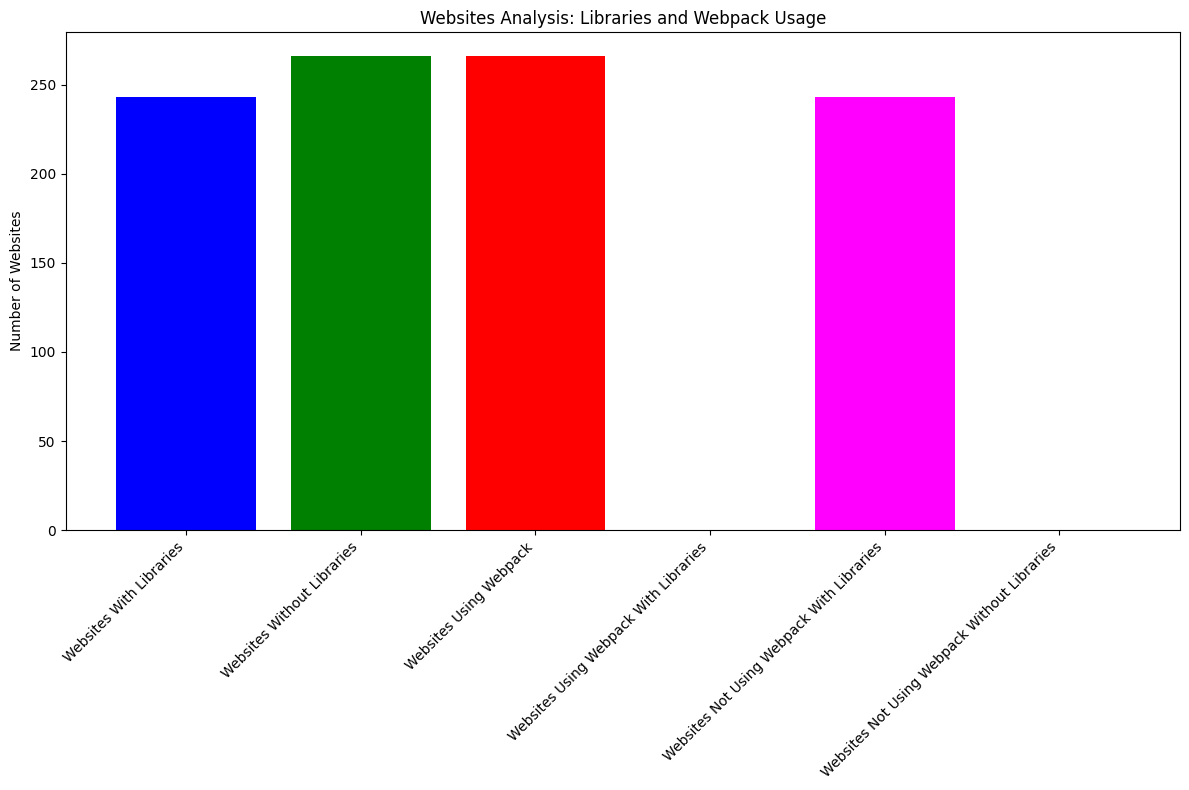

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_libraries_webpack_categories(db_name="website_data.db"):
    with sqlite3.connect(db_name) as conn:
        # Query to fetch all websites and libraries
        query = """
        SELECT websites.url, 
               libraries.library,
               libraries.link
        FROM websites
        LEFT JOIN libraries ON websites.id = libraries.website_id
        """
        df = pd.read_sql_query(query, conn)

    # Determine Webpack usage and presence of libraries
    df['uses_webpack'] = df['link'].str.contains('webpack', case=False, na=True)
    df['has_library'] = df['library'].notna()

    # Identify websites with any occurrence of Webpack
    webpack_sites = df[df['uses_webpack']]['url'].unique()

    # Define categories
    categories = {
        'Websites With Libraries': df[df['has_library']]['url'].nunique(),
        'Websites Without Libraries': df[~df['has_library']]['url'].nunique(),
        'Websites Using Webpack': len(webpack_sites),
        'Websites Using Webpack With Libraries': df[df['uses_webpack'] & df['has_library']]['url'].nunique(),
        'Websites Not Using Webpack With Libraries': df[~df['uses_webpack'] & df['has_library']]['url'].nunique(),
        'Websites Not Using Webpack Without Libraries': df[~df['uses_webpack'] & ~df['has_library']]['url'].nunique(),
    }

    # Generate histogram
    plt.figure(figsize=(12, 8))
    plt.bar(categories.keys(), categories.values(), color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
    plt.title('Websites Analysis: Libraries and Webpack Usage')
    plt.ylabel('Number of Websites')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    analyze_libraries_webpack_categories()


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs
import threading
import time
import re
import sqlite3
import requests

def get_library_links(library_name):
    conn = sqlite3.connect('website_data.db')
    cursor = conn.cursor()
    cursor.execute('SELECT version, cdn_link FROM library_cdn_links WHERE library_name = ?', (library_name,))
    links = cursor.fetchall()
    conn.close()
    return links

def check_website_for_cdn(website_url, driver, db_name="website_dataTest.db"):
    try:
        # Use Selenium's driver to get current page's source for compatibility with dynamic content
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        scripts = soup.find_all('script')
        with sqlite3.connect(db_name) as conn:
            cursor = conn.cursor()
            for script_tag in scripts:
                src = script_tag.get('src')
                if src:
                    cursor.execute("SELECT * FROM library_cdn_links WHERE cdn_link=?", (src,))
                    match = cursor.fetchone()
                    if match:
                        print(f"Match found on {website_url}: {match[2]} for library {match[1]} version {match[3]}")
    except Exception as e:
        print(f"Error checking {website_url}: {e}")

def get_website_status(url, db_name="website_dataTest.db"):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT status FROM websites WHERE url = ?", (url,))
        status = cursor.fetchone()
        if status:
            return status[0]
        else:
            return None

def update_website_status(url, status, db_name="website_dataTest.db"):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''UPDATE websites SET status = ? WHERE url = ?''', (status, url))
        
def modify_websites_table_add_status(db_name="website_dataTest.db"):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        #Add a 'status' column to 'websites' table
        cursor.execute('''ALTER TABLE websites ADD COLUMN status TEXT DEFAULT 'Started' ''')
        #Initialize status for existing rows (if any)
        cursor.execute('''UPDATE websites SET status = 'Started' WHERE status IS NULL''')

def initialize_db(db_name="website_dataTest.db"):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''CREATE TABLE IF NOT EXISTS websites
                          (id INTEGER PRIMARY KEY, url TEXT UNIQUE)''')
        cursor.execute('''CREATE TABLE IF NOT EXISTS libraries
                          (id INTEGER PRIMARY KEY, website_id INTEGER, link TEXT,
                           library TEXT, version TEXT,
                           FOREIGN KEY(website_id) REFERENCES websites(id))''')
        # Commit is automatic with the context manager

def insert_website_get_id(url, db_name="website_dataTest.db"):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("INSERT OR IGNORE INTO websites (url) VALUES (?)", (url,))
        cursor.execute("SELECT id FROM websites WHERE url = ?", (url,))
        website_id = cursor.fetchone()[0]
    return website_id

def insert_libraries(website_id, libraries, db_name="website_dataTest.db"):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        libraries_data = [(website_id, lib['link'], lib['library'], lib['version']) for lib in libraries]
        cursor.executemany('''INSERT INTO libraries (website_id, link, library, version)
                              VALUES (?, ?, ?, ?)''', libraries_data)

def check_link_processed(website_id, link, db_name="website_dataTest.db"):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    cursor.execute("SELECT id FROM libraries WHERE website_id = ? AND link = ?", (website_id, link))
    result = cursor.fetchone()
    conn.close()
    return result is not None

def get_base_url(url):
    parsed_url = urlparse(url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    return base_url

def is_internal_link(base_url, link):
    return urlparse(link).netloc == urlparse(base_url).netloc

def detect_webpackOld(soup):
    
    # Look for script tags that might indicate Webpack usage
    script_tags = soup.find_all('script', src=True)
    webpack_patterns = [r"bundle\.js", r"webpack", r"\.chunk\.js"]
    for script in script_tags:
        src = script.get('src', '')
        for pattern in webpack_patterns:
            if re.search(pattern, src, re.IGNORECASE):
                return True  # Webpack likely used
    return False
def detect_webpack(soup):
    script_tags = soup.find_all('script', src=True)
    webpack_patterns = [r"bundle\.js", r"webpack", r"\.chunk\.js"]
    webpack_signature = re.compile(r"(webpackJsonp|webpackChunk)")

    for script in script_tags:
        src = script.get('src', '')
        if any(re.search(pattern, src, re.IGNORECASE) for pattern in webpack_patterns):
            print(f"Webpack likely used (filename pattern): {src}")
            return True  # Filename pattern matches commonly used in Webpack
        
        #Optionally, download and search within JS files for webpack signatures
        try:
            js_content = requests.get(src).text
            if webpack_signature.search(js_content):
                print(f"Webpack signature found in file: {src}")
                return True  # Found webpack signature in file content
        except Exception as e:
            print(f"Error downloading script: {src}, error: {e}")

    return False

def detect_js_libraries(driver,soup=None):
    libraries = []

    #First, check if Webpack is used
    if detect_webpack(soup):
        libraries.append({"library": "Webpack", "version": "Unknown"})
        
    # jQuery
    jquery_version = driver.execute_script("return (typeof jQuery !== 'undefined') ? jQuery.fn.jquery : null;")
    if jquery_version:
        libraries.append({"library": "jQuery", "version": jquery_version})

    # Dojo
    dojo_version = driver.execute_script("return (typeof dojo !== 'undefined') ? dojo.version.toString() : null;")
    if dojo_version:
        libraries.append({"library": "Dojo", "version": dojo_version})

    # D3
    d3_version = driver.execute_script("return (typeof d3 !== 'undefined') ? d3.version : null;")
    if d3_version:
        libraries.append({"library": "D3", "version": d3_version})

    # Pixi.js
    pixi_version = driver.execute_script("return (typeof PIXI !== 'undefined') ? PIXI.VERSION : null;")
    if pixi_version:
        libraries.append({"library": "Pixi.js", "version": pixi_version})

    # Three.js
    three_version = driver.execute_script("return (typeof THREE !== 'undefined') ? THREE.REVISION : null;")
    if three_version:
        libraries.append({"library": "Three.js", "version": three_version})

    # Velocity.js
    velocity_version = driver.execute_script("return (typeof Velocity !== 'undefined') ? Velocity.version.major + '.' + Velocity.version.minor + '.' + Velocity.version.patch : null;")
    if velocity_version:
        libraries.append({"library": "Velocity.js", "version": velocity_version})

    #React
    react_version = driver.execute_script(
        "return (typeof React !== 'undefined') ? React.version : ((typeof _react !== 'undefined') ? _react.version : null);")
    if react_version:
        libraries.append({"library": "React", "version": react_version})

    # Vue.js
    vue_version = driver.execute_script("return (typeof Vue !== 'undefined') ? Vue.version : null;")
    if vue_version:
        libraries.append({"library": "Vue", "version": vue_version})

    # Ember.js
    ember_version = driver.execute_script("return (typeof Ember !== 'undefined') ? Ember.VERSION : null;")
    if ember_version:
        libraries.append({"library": "Ember", "version": ember_version})

    # Angular
    angular_version = driver.execute_script("return (typeof angular !== 'undefined') ? angular.VERSION : null;")
    #angular_version = driver.execute_script(
    #    "return (window.angular !== undefined) ? window.angular.version.full : " 
    #    "((window.ng !== undefined && window.ng.version !== undefined) ? window.ng.version.full : null);")
    if angular_version:
        libraries.append({"library": "Angular", "version": angular_version})
    
    if soup is None:
        soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    for script in soup.find_all('script', src=True):
        src = script['src']
        
        #Pattern examples for popular libraries 
        patterns = {
            'jquery': r"jquery(?:\.min)?\.js",
            'dojo': r"dojo\.js",
            'd3': r"d3(?:\.min)?\.js",
            'pixi': r"pixi(?:\.min)?\.js",
            'three': r"three(?:\.min)?\.js",
            'velocity': r"velocity(?:\.min)?\.js",
            'react': r"react(?:\.development|\.production\.min)?\.js",
            'vue': r"vue(?:\.min)?\.js",
            'ember': r"ember\.min\.js",
            'angular': r"angular(?:\.min)?\.js",
        }

        for lib, pattern in patterns.items():
            if re.search(pattern, src, re.IGNORECASE):
                version_query = parse_qs(urlparse(src).query).get('v', ['Unknown'])[0]
                libraries.append({"library": lib.capitalize(), "version": version_query})
                break  # Assuming one script won't match multiple libraries

    return libraries

def get_links(driver, url, max_links=25):
    base_url = get_base_url(url)
    driver.get(url)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    links = set()  #Use a set to avoid duplicates

    for a in soup.find_all('a', href=True):
        href = a['href']
        #Check if the link is internal
        if href.startswith('http') and is_internal_link(base_url, href) and href not in links:
            links.add(href)
            if len(links) == max_links:
                break
    return list(links)

def visit_links(driver, website_id, website, links, db_name="website_dataTest.db"):
    js_libraries_info = []
    for link in links:
        if check_link_processed(website_id, link, db_name=db_name):
            print(f"Skipping already processed link: {link}")
            continue
        try:
            driver.get(link)
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
            # Check for CDN usage on each visited page
            check_website_for_cdn(link, driver, db_name=db_name)  # Added call to check_website_for_cdn
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            detected_libraries = detect_js_libraries(driver, soup=soup)
            libraries = [{'link': link, 'library': lib['library'], 'version': lib['version']} for lib in detected_libraries]
            if libraries:
                js_libraries_info.append({link: libraries})
                insert_libraries(website_id, libraries, db_name=db_name)  # Adjusted call
        except Exception as e:
            print(f"Error visiting {link}: {e}")
    print(f"JavaScript libraries found in {website}: {js_libraries_info}")
    return js_libraries_info

def create_webdriver():
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Enables headless mode
    chrome_options.add_argument("--no-sandbox")  # Bypass OS security model, REQUIRED for Docker
    chrome_options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems
    driver = webdriver.Chrome(options=chrome_options)
    return driver

def process_websites(websites, db_name="website_dataTest.db"):
    driver = create_webdriver()
    for website in websites:
        status = get_website_status(website, db_name=db_name)
        if status == 'Done':
            print(f"Skipping {website} as it is already processed.")
            continue

        website_id = insert_website_get_id(website, db_name=db_name)
        update_website_status(website, 'Started', db_name=db_name)
        
        try:
            links = get_links(driver, website)
            update_website_status(website, 'Working', db_name=db_name)
            print(f"Collecting links from: {website}")
            
            js_libraries_info = visit_links(driver, website_id, website, links, db_name=db_name)
            update_website_status(website, 'Done', db_name=db_name)
        except Exception as e:
            print(f"Error processing {website}: {e}")
            update_website_status(website, 'Error', db_name=db_name)
    driver.quit()

def main():
    with open("WebList.txt", 'r') as file:
        websites = [line.strip() for line in file if line.strip()]

    #Split the websites list into 4 roughly equal parts for threading
    chunk_size = len(websites) // 4
    threads = []
    all_website_info = []

    def thread_func(websites_slice):
        info = process_websites(websites_slice)
        all_website_info.append(info)

    for i in range(0, len(websites), chunk_size):
        end = i + chunk_size if (i + chunk_size) < len(websites) else len(websites)
        thread = threading.Thread(target=thread_func, args=(websites[i:end],))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

    #Optionally, aggregate or save all_website_info results here

if __name__ == "__main__":
    initialize_db()  # Make sure the database is initialized
    #modify_websites_table_add_status()  # Add the status column if it hasn't been added yet
    main()  # Start processing


Skipping https://www.booking.com as it is already processed.
Skipping https://www.theguardian.com as it is already processed.
Skipping https://www.bbb.org as it is already processed.
Skipping https://www.parallels.com as it is already processed.
Skipping https://www.alexa.com as it is already processed.
Skipping https://www.ibm.com as it is already processed.
Skipping https://www.usda.gov as it is already processed.
Skipping https://www.rambler.ru as it is already processed.
Skipping https://www.google.com as it is already processed.
Skipping https://www.live.com as it is already processed.
Skipping https://www.reddit.com as it is already processed.
Skipping https://www.netvibes.com as it is already processed.
Skipping https://www.woothemes.com as it is already processed.
Skipping https://www.springer.com as it is already processed.
Skipping https://www.marriott.com as it is already processed.
Skipping https://www.dailymotion.com as it is already processed.
Skipping https://www.admin.c

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs
import threading
from concurrent.futures import ThreadPoolExecutor, as_completed
import time
import re
import sqlite3
import requests
from urllib.robotparser import RobotFileParser

DatabaseName = "website_dataTest1.db"

def can_fetch_url(website_url, user_agent='*'):
    parsed_url = urlparse(website_url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    robots_url = f"{base_url}/robots.txt"
    rp = RobotFileParser()
    rp.set_url(robots_url)
    rp.read()
    can_fetch = rp.can_fetch(user_agent, website_url)
    return can_fetch

def get_library_links(library_name):
    conn = sqlite3.connect('website_data.db')
    cursor = conn.cursor()
    cursor.execute('SELECT version, cdn_link FROM library_cdn_links WHERE library_name = ?', (library_name,))
    links = cursor.fetchall()
    conn.close()
    return links

def check_website_for_cdn(website_url, driver, db_name=DatabaseName):
    try:
        # Use Selenium's driver to get current page's source for compatibility with dynamic content
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        scripts = soup.find_all('script')
        with sqlite3.connect(db_name) as conn:
            cursor = conn.cursor()
            for script_tag in scripts:
                src = script_tag.get('src')
                if src:
                    cursor.execute("SELECT * FROM library_cdn_links WHERE cdn_link=?", (src,))
                    match = cursor.fetchone()
                    if match:
                        print(f"Match found on {website_url}: {match[2]} for library {match[1]} version {match[3]}")
    except Exception as e:
        print(f"Error checking {website_url}: {e}")

def get_website_status(url, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT status FROM websites WHERE url = ?", (url,))
        status = cursor.fetchone()
        if status:
            return status[0]
        else:
            return None

def update_website_status(url, status, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''UPDATE websites SET status = ? WHERE url = ?''', (status, url))
        
def modify_websites_table_add_status(db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        #Add a 'status' column to 'websites' table
        cursor.execute('''ALTER TABLE websites ADD COLUMN status TEXT DEFAULT 'Started' ''')
        #Initialize status for existing rows (if any)
        cursor.execute('''UPDATE websites SET status = 'Started' WHERE status IS NULL''')

def initialize_db(db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''CREATE TABLE IF NOT EXISTS websites
                          (id INTEGER PRIMARY KEY, url TEXT UNIQUE)''')
        cursor.execute('''CREATE TABLE IF NOT EXISTS libraries
                          (id INTEGER PRIMARY KEY, website_id INTEGER, link TEXT,
                           library TEXT, version TEXT,
                           FOREIGN KEY(website_id) REFERENCES websites(id))''')
        # Commit is automatic with the context manager

def insert_website_get_id(url, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("INSERT OR IGNORE INTO websites (url) VALUES (?)", (url,))
        cursor.execute("SELECT id FROM websites WHERE url = ?", (url,))
        website_id = cursor.fetchone()[0]
    return website_id

def insert_libraries(website_id, libraries, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        libraries_data = [(website_id, lib['link'], lib['library'], lib['version']) for lib in libraries]
        cursor.executemany('''INSERT INTO libraries (website_id, link, library, version)
                              VALUES (?, ?, ?, ?)''', libraries_data)

def check_link_processed(website_id, link, db_name=DatabaseName):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    cursor.execute("SELECT id FROM libraries WHERE website_id = ? AND link = ?", (website_id, link))
    result = cursor.fetchone()
    conn.close()
    return result is not None

def get_base_url(url):
    parsed_url = urlparse(url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    return base_url

def is_internal_link(base_url, link):
    return urlparse(link).netloc == urlparse(base_url).netloc

def detect_webpackOld(soup):
    
    
    
    
    # Look for script tags that might indicate Webpack usage
    script_tags = soup.find_all('script', src=True)
    webpack_patterns = [r"bundle\.js", r"webpack", r"\.chunk\.js"]
    for script in script_tags:
        src = script.get('src', '')
        for pattern in webpack_patterns:
            if re.search(pattern, src, re.IGNORECASE):
                return True  # Webpack likely used
    return False
def detect_webpack(soup):
    script_tags = soup.find_all('script', src=True)
    webpack_patterns = [r"bundle\.js", r"webpack", r"\.chunk\.js"]
    webpack_signature = re.compile(r"(webpackJsonp|webpackChunk)")

    for script in script_tags:
        src = script.get('src', '')
        if any(re.search(pattern, src, re.IGNORECASE) for pattern in webpack_patterns):
            print(f"Webpack likely used (filename pattern): {src}")
            return True  # Filename pattern matches commonly used in Webpack
        
        # Optionally, download and search within JS files for webpack signatures
        
        if src.startswith("http"):
            try:
                js_content = requests.get(src).text
                if webpack_signature.search(js_content):
                    print(f"Webpack signature found in file: {src}")
                    return True  # Found webpack signature in file content
            except Exception as e:
                print(f"Error downloading script: {src}, error: {e}")

    return False

def detect_js_libraries(driver,soup=None):
    libraries = []

    #First, check if Webpack is used
    if detect_webpack(soup):
        libraries.append({"library": "Webpack", "version": "Unknown"})
        
    # jQuery
    jquery_version = driver.execute_script("return (typeof jQuery !== 'undefined') ? jQuery.fn.jquery : null;")
    if jquery_version:
        libraries.append({"library": "jQuery", "version": jquery_version})

    # Dojo
    dojo_version = driver.execute_script("return (typeof dojo !== 'undefined') ? dojo.version.toString() : null;")
    if dojo_version:
        libraries.append({"library": "Dojo", "version": dojo_version})

    # D3
    d3_version = driver.execute_script("return (typeof d3 !== 'undefined') ? d3.version : null;")
    if d3_version:
        libraries.append({"library": "D3", "version": d3_version})

    # Pixi.js
    pixi_version = driver.execute_script("return (typeof PIXI !== 'undefined') ? PIXI.VERSION : null;")
    if pixi_version:
        libraries.append({"library": "Pixi.js", "version": pixi_version})

    # Three.js
    three_version = driver.execute_script("return (typeof THREE !== 'undefined') ? THREE.REVISION : null;")
    if three_version:
        libraries.append({"library": "Three.js", "version": three_version})

    # Velocity.js
    velocity_version = driver.execute_script("return (typeof Velocity !== 'undefined') ? Velocity.version.major + '.' + Velocity.version.minor + '.' + Velocity.version.patch : null;")
    if velocity_version:
        libraries.append({"library": "Velocity.js", "version": velocity_version})

    #React
    react_version = driver.execute_script(
        "return (typeof React !== 'undefined') ? React.version : ((typeof _react !== 'undefined') ? _react.version : null);")
    if react_version:
        libraries.append({"library": "React", "version": react_version})

    # Vue.js
    vue_version = driver.execute_script("return (typeof Vue !== 'undefined') ? Vue.version : null;")
    if vue_version:
        libraries.append({"library": "Vue", "version": vue_version})

    # Ember.js
    ember_version = driver.execute_script("return (typeof Ember !== 'undefined') ? Ember.VERSION : null;")
    if ember_version:
        libraries.append({"library": "Ember", "version": ember_version})

    # Angular
    angular_version = driver.execute_script("return (typeof angular !== 'undefined') ? angular.VERSION : null;")
    #angular_version = driver.execute_script(
    #    "return (window.angular !== undefined) ? window.angular.version.full : " 
    #    "((window.ng !== undefined && window.ng.version !== undefined) ? window.ng.version.full : null);")
    if angular_version:
        libraries.append({"library": "Angular", "version": angular_version})
    
    if soup is None:
        soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    for script in soup.find_all('script', src=True):
        src = script['src']
        
        #Pattern examples for popular libraries 
        patterns = {
            'jquery': r"jquery(?:\.min)?\.js",
            'dojo': r"dojo\.js",
            'd3': r"d3(?:\.min)?\.js",
            'pixi': r"pixi(?:\.min)?\.js",
            'three': r"three(?:\.min)?\.js",
            'velocity': r"velocity(?:\.min)?\.js",
            'react': r"react(?:\.development|\.production\.min)?\.js",
            'vue': r"vue(?:\.min)?\.js",
            'ember': r"ember\.min\.js",
            'angular': r"angular(?:\.min)?\.js",
        }

        for lib, pattern in patterns.items():
            if re.search(pattern, src, re.IGNORECASE):
                version_query = parse_qs(urlparse(src).query).get('v', ['Unknown'])[0]
                libraries.append({"library": lib.capitalize(), "version": version_query})
                break  # Assuming one script won't match multiple libraries

    return libraries

def get_links(driver, url, max_links=25):
    base_url = get_base_url(url)
    driver.get(url)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    links = set()  #Use a set to avoid duplicates

    for a in soup.find_all('a', href=True):
        href = a['href']
        #Check if the link is internal
        if href.startswith('http') and is_internal_link(base_url, href) and href not in links:
            links.add(href)
            if len(links) == max_links:
                break
    return list(links)

def visit_links(driver, website_id, website, links, db_name=DatabaseName):
    js_libraries_info = []
    for link in links:
        if check_link_processed(website_id, link, db_name=db_name):
            print(f"Skipping already processed link: {link}")
            continue
        try:
            driver.get(link)
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
            # Check for CDN usage on each visited page
            check_website_for_cdn(link, driver, db_name=db_name)  # Added call to check_website_for_cdn
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            detected_libraries = detect_js_libraries(driver, soup=soup)
            libraries = [{'link': link, 'library': lib['library'], 'version': lib['version']} for lib in detected_libraries]
            if libraries:
                js_libraries_info.append({link: libraries})
                insert_libraries(website_id, libraries, db_name=db_name)  # Adjusted call
        except Exception as e:
            print(f"Error visiting {link}: {e}")
    print(f"JavaScript libraries found in {website}: {js_libraries_info}")
    return js_libraries_info

def create_webdriver():
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Enables headless mode
    chrome_options.add_argument("--no-sandbox")  # Bypass OS security model, REQUIRED for Docker
    chrome_options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems
    chrome_options.add_argument("--window-size=1920,1080")  # Optional: Set a window size if specific dimensions are required for the site
    driver = webdriver.Chrome(options=chrome_options)
    return driver

def process_websites(websites, db_name=DatabaseName):
    driver = create_webdriver()
    for website in websites:
        status = get_website_status(website, db_name=db_name)
        if status == 'Done':
            print(f"Skipping {website} as it is already processed.")
            continue

        website_id = insert_website_get_id(website, db_name=db_name)
        update_website_status(website, 'Started', db_name=db_name)
        
        try:
            links = get_links(driver, website)
            update_website_status(website, 'Working', db_name=db_name)
            print(f"Collecting links from: {website}")
            
            js_libraries_info = visit_links(driver, website_id, website, links, db_name=db_name)
            update_website_status(website, 'Done', db_name=db_name)
        except Exception as e:
            print(f"Error processing {website}: {e}")
            update_website_status(website, 'Error', db_name=db_name)
    driver.quit()
    
def process_single_website(website, db_name=DatabaseName):
    # Check robots.txt before proceeding
    if not can_fetch_url(website):
        print(f"Scraping blocked by robots.txt: {website}")
        update_website_status(website, 'Blocked', db_name=db_name)

        return
    
    driver = create_webdriver()
    status = get_website_status(website, db_name=db_name)
    if status == 'Done':
        print(f"Skipping {website} as it is already processed.")
        return

    website_id = insert_website_get_id(website, db_name=db_name)
    update_website_status(website, 'Started', db_name=db_name)
    
    try:
        links = get_links(driver, website)
        update_website_status(website, 'Working', db_name=db_name)
        print(f"Collecting links from: {website}")
        
        js_libraries_info = visit_links(driver, website_id, website, links, db_name=db_name)
        update_website_status(website, 'Done', db_name=db_name)
        return js_libraries_info
    except Exception as e:
        print(f"Error processing {website}: {e}")
        update_website_status(website, 'Error', db_name=db_name)
    finally:
        driver.quit()
        
def main():
    with open("WebList.txt", 'r') as file:
        websites = [line.strip() for line in file if line.strip()]
    
    all_website_info = []
    with ThreadPoolExecutor(max_workers=4) as executor:
        future_to_website = {executor.submit(process_single_website, website): website for website in websites}
        
        for future in as_completed(future_to_website):
            website = future_to_website[future]
            try:
                data = future.result()
                all_website_info.append(data)
                print(f"Completed processing {website}")
            except Exception as exc:
                print(f"{website} generated an exception: {exc}")

if __name__ == "__main__":
    initialize_db()  # Make sure the database is initialized
    #modify_websites_table_add_status()  # Add the status column if it hasn't been added yet
    main()  # Start processing


Skipping https://www.amazon.com as it is already processed.
Skipping https://www.huffingtonpost.com as it is already processed.
Skipping https://www.vkontakte.ru as it is already processed.
Skipping https://www.cocolog-nifty.com as it is already processed.
Completed processing https://www.amazon.com
Completed processing https://www.huffingtonpost.com
Completed processing https://www.vkontakte.ru
Completed processing https://www.cocolog-nifty.com
Skipping https://www.nydailynews.com as it is already processed.
Skipping https://www.whitehouse.gov as it is already processed.
Skipping https://www.netscape.com as it is already processed.
Skipping https://www.goo.ne.jp as it is already processed.
Completed processing https://www.nydailynews.com
Completed processing https://www.whitehouse.gov
Scraping blocked by robots.txt: https://www.freewebs.com
Completed processing https://www.freewebs.com
Completed processing https://www.netscape.com
https://www.squidoo.com generated an exception: <urlop

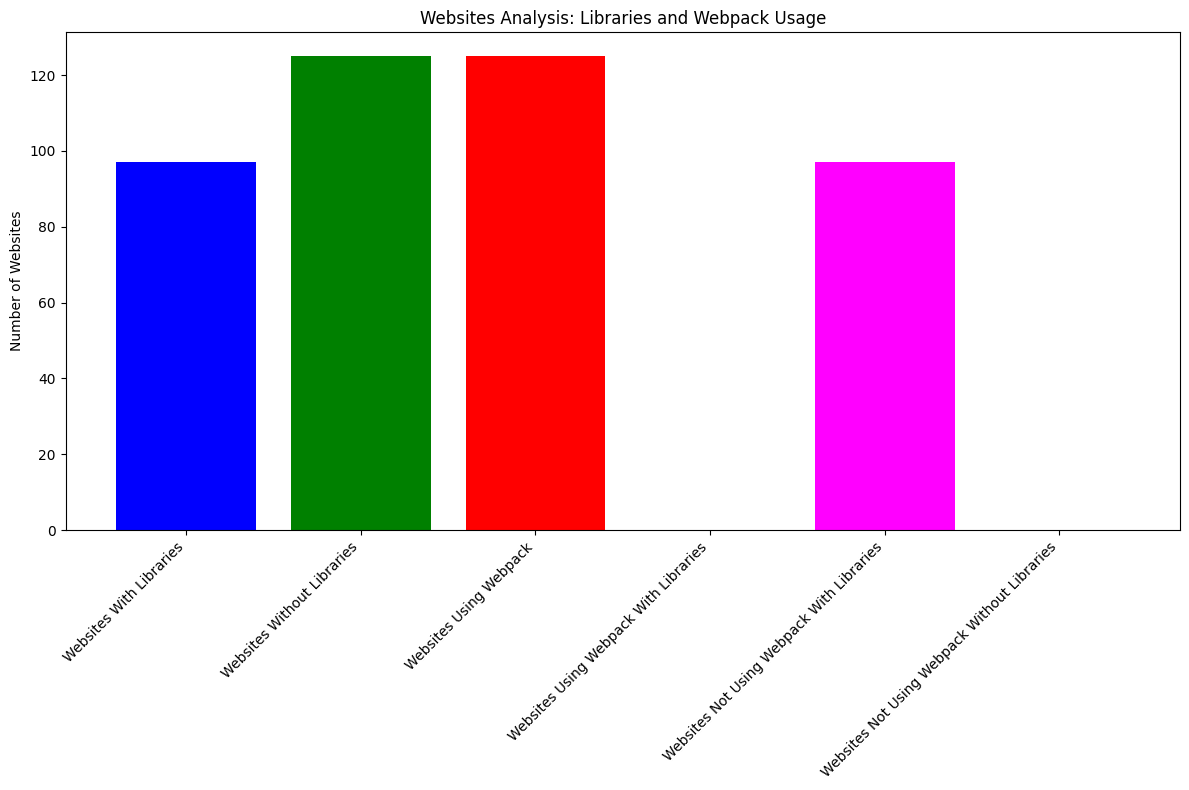

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_libraries_webpack_categories(db_name="website_dataTest.db"):
    with sqlite3.connect(db_name) as conn:
        # Query to fetch all websites and libraries
        query = """
        SELECT websites.url, 
               libraries.library,
               libraries.link
        FROM websites
        LEFT JOIN libraries ON websites.id = libraries.website_id
        """
        df = pd.read_sql_query(query, conn)

    # Determine Webpack usage and presence of libraries
    df['uses_webpack'] = df['link'].str.contains('webpack', case=False, na=True)
    df['has_library'] = df['library'].notna()

    # Identify websites with any occurrence of Webpack
    webpack_sites = df[df['uses_webpack']]['url'].unique()

    # Define categories
    categories = {
        'Websites With Libraries': df[df['has_library']]['url'].nunique(),
        'Websites Without Libraries': df[~df['has_library']]['url'].nunique(),
        'Websites Using Webpack': len(webpack_sites),
        'Websites Using Webpack With Libraries': df[df['uses_webpack'] & df['has_library']]['url'].nunique(),
        'Websites Not Using Webpack With Libraries': df[~df['uses_webpack'] & df['has_library']]['url'].nunique(),
        'Websites Not Using Webpack Without Libraries': df[~df['uses_webpack'] & ~df['has_library']]['url'].nunique(),
    }

    # Generate histogram
    plt.figure(figsize=(12, 8))
    plt.bar(categories.keys(), categories.values(), color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
    plt.title('Websites Analysis: Libraries and Webpack Usage')
    plt.ylabel('Number of Websites')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    analyze_libraries_webpack_categories()


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs
import threading
from concurrent.futures import ThreadPoolExecutor, as_completed
import time
import re
import sqlite3
import requests
from urllib.robotparser import RobotFileParser

DatabaseName = "website_dataPrototype1000.db"

def initialize_db(db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''CREATE TABLE IF NOT EXISTS websites
                          (id INTEGER PRIMARY KEY, url TEXT UNIQUE)''')
        cursor.execute('''CREATE TABLE IF NOT EXISTS libraries
                          (id INTEGER PRIMARY KEY, website_id INTEGER, link TEXT,
                           library TEXT, version TEXT,
                           FOREIGN KEY(website_id) REFERENCES websites(id))''')
        # Commit is automatic with the context manager

def modify_websites_table_add_status(db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        #Add a 'status' column to 'websites' table
        cursor.execute('''ALTER TABLE websites ADD COLUMN status TEXT DEFAULT 'Started' ''')
        #Initialize status for existing rows (if any)
        cursor.execute('''UPDATE websites SET status = 'Started' WHERE status IS NULL''')

def update_website_status(url, status, db_name=DatabaseName):
    #Update the status of website
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''UPDATE websites SET status = ? WHERE url = ?''', (status, url))

def can_fetch_url(website_url, user_agent='*'):
    #Check if website has Robots.txt for ethical reasons 
    parsed_url = urlparse(website_url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    robots_url = f"{base_url}/robots.txt"
    rp = RobotFileParser()
    rp.set_url(robots_url)
    rp.read()
    can_fetch = rp.can_fetch(user_agent, website_url)
    return can_fetch

def fetch_websites_by_status(status, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT url FROM websites WHERE status = ?", (status,))
        return [row[0] for row in cursor.fetchall()]

def get_website_status(url, db_name=DatabaseName):
    #Checki if website completed
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT status FROM websites WHERE url = ?", (url,))
        status = cursor.fetchone()
        if status:
            return status[0]
        else:
            return None

def insert_website_get_id(url, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("INSERT OR IGNORE INTO websites (url) VALUES (?)", (url,))
        cursor.execute("SELECT id FROM websites WHERE url = ?", (url,))
        website_id = cursor.fetchone()[0]
    return website_id

def check_link_processed(website_id, link, db_name=DatabaseName):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    cursor.execute("SELECT id FROM libraries WHERE website_id = ? AND link = ?", (website_id, link))
    result = cursor.fetchone()
    conn.close()
    return result is not None

def check_website_for_cdn(website_url, driver, db_name=DatabaseName):
    #Check if website is using any of the CDN Links to match the js library
    try:
        #Use Selenium's driver to get current page's source for compatibility with dynamic content
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        scripts = soup.find_all('script')
        with sqlite3.connect(db_name) as conn:
            cursor = conn.cursor()
            for script_tag in scripts:
                src = script_tag.get('src')
                if src:
                    cursor.execute("SELECT * FROM library_cdn_links WHERE cdn_link=?", (src,))
                    match = cursor.fetchone()
                    if match:
                        print(f"Match found on {website_url}: {match[2]} for library {match[1]} version {match[3]}")
    except Exception as e:
        print(f"Error checking {website_url}: {e}")

def insert_libraries(website_id, libraries, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        libraries_data = [(website_id, lib['link'], lib['library'], lib['version']) for lib in libraries]
        cursor.executemany('''INSERT INTO libraries (website_id, link, library, version)
                              VALUES (?, ?, ?, ?)''', libraries_data)

def is_internal_link(base_url, link):
    return urlparse(link).netloc == urlparse(base_url).netloc

def create_webdriver():
    chrome_options = Options()
    #chrome_options.add_argument("--headless")  # Enables headless mode
    chrome_options.add_argument("--no-sandbox")  # Bypass OS security model, REQUIRED for Docker
    chrome_options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems
    chrome_options.add_argument("--window-size=1920,1080")  # Optional: Set a window size if specific dimensions are required for the site
    driver = webdriver.Chrome(options=chrome_options)
    return driver

def get_base_url(url):
    parsed_url = urlparse(url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    return base_url

def get_links(driver, url, max_links=25):
    base_url = get_base_url(url)
    driver.get(url)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    links = set()  #Use a set to avoid duplicates

    for a in soup.find_all('a', href=True):
        href = a['href']
        #Check if the link is internal
        if href.startswith('http') and is_internal_link(base_url, href) and href not in links:
            links.add(href)
            if len(links) == max_links:
                break
    return list(links)

def detect_webpack(soup):
    script_tags = soup.find_all('script', src=True)
    webpack_patterns = [r"bundle\.js", r"webpack", r"\.chunk\.js"]
    webpack_signature = re.compile(r"(webpackJsonp|webpackChunk)")

    for script in script_tags:
        src = script.get('src', '')
        if any(re.search(pattern, src, re.IGNORECASE) for pattern in webpack_patterns):
            print(f"Webpack likely used (filename pattern): {src}")
            return True  #Filename pattern matches commonly used in Webpack
        #download and search within JS files for webpack signatures
        
        if src.startswith("http"):
            try:
                js_content = requests.get(src).text
                if webpack_signature.search(js_content):
                    print(f"Webpack signature found in file: {src}")
                    return True  #Found webpack signature in file content
            except Exception as e:
                print(f"Error downloading script: {src}, error: {e}")

    return False

def detect_js_libraries(driver,soup=None):
    libraries = []

    #First, check if Webpack is used
    if detect_webpack(soup):
        libraries.append({"library": "Webpack", "version": "Unknown"})
        
    # jQuery
    jquery_version = driver.execute_script("return (typeof jQuery !== 'undefined') ? jQuery.fn.jquery : null;")
    if jquery_version:
        libraries.append({"library": "jQuery", "version": jquery_version})

    # Dojo
    dojo_version = driver.execute_script("return (typeof dojo !== 'undefined') ? dojo.version.toString() : null;")
    if dojo_version:
        libraries.append({"library": "Dojo", "version": dojo_version})

    # D3
    d3_version = driver.execute_script("return (typeof d3 !== 'undefined') ? d3.version : null;")
    if d3_version:
        libraries.append({"library": "D3", "version": d3_version})

    # Pixi.js
    pixi_version = driver.execute_script("return (typeof PIXI !== 'undefined') ? PIXI.VERSION : null;")
    if pixi_version:
        libraries.append({"library": "Pixi.js", "version": pixi_version})

    # Three.js
    three_version = driver.execute_script("return (typeof THREE !== 'undefined') ? THREE.REVISION : null;")
    if three_version:
        libraries.append({"library": "Three.js", "version": three_version})

    # Velocity.js
    velocity_version = driver.execute_script("return (typeof Velocity !== 'undefined') ? Velocity.version.major + '.' + Velocity.version.minor + '.' + Velocity.version.patch : null;")
    if velocity_version:
        libraries.append({"library": "Velocity.js", "version": velocity_version})

    #React
    react_version = driver.execute_script(
        "return (typeof React !== 'undefined') ? React.version : ((typeof _react !== 'undefined') ? _react.version : null);")
    if react_version:
        libraries.append({"library": "React", "version": react_version})

    #Vue.js
    vue_version = driver.execute_script("return (typeof Vue !== 'undefined') ? Vue.version : null;")
    if vue_version:
        libraries.append({"library": "Vue", "version": vue_version})

    #Ember.js
    ember_version = driver.execute_script("return (typeof Ember !== 'undefined') ? Ember.VERSION : null;")
    if ember_version:
        libraries.append({"library": "Ember", "version": ember_version})

    # Angular
    #angular_version = driver.execute_script("return (typeof angular !== 'undefined') ? angular.VERSION : null;")
    angular_version = driver.execute_script(
        "return (window.angular !== undefined) ? window.angular.version.full : " 
        "((window.ng !== undefined && window.ng.version !== undefined) ? window.ng.version.full : null);")
    if angular_version:
        libraries.append({"library": "Angular", "version": angular_version})
    
    if soup is None:
        soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    for script in soup.find_all('script', src=True):
        src = script['src']
        
        #Pattern examples for popular libraries 
        patterns = {
            'jquery': r"jquery(?:\.min)?\.js",
            'dojo': r"dojo\.js",
            'd3': r"d3(?:\.min)?\.js",
            'pixi': r"pixi(?:\.min)?\.js",
            'three': r"three(?:\.min)?\.js",
            'velocity': r"velocity(?:\.min)?\.js",
            'react': r"react(?:\.development|\.production\.min)?\.js",
            'vue': r"vue(?:\.min)?\.js",
            'ember': r"ember\.min\.js",
            'angular': r"angular(?:\.min)?\.js",
        }

        for lib, pattern in patterns.items():
            if re.search(pattern, src, re.IGNORECASE):
                version_query = parse_qs(urlparse(src).query).get('v', ['Unknown'])[0]
                libraries.append({"library": lib.capitalize(), "version": version_query})
                break  # Assuming one script won't match multiple libraries

    return libraries

def visit_links(driver, website_id, website, links, db_name=DatabaseName):
    js_libraries_info = []
    for link in links:
        if check_link_processed(website_id, link, db_name=db_name):
            print(f"Skipping already processed link: {link}")
            continue
        try:
            driver.get(link)
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
            #Check for CDN usage on each visited page
            check_website_for_cdn(link, driver, db_name=db_name)  #Added call to check_website_for_cdn
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            detected_libraries = detect_js_libraries(driver, soup=soup)
            libraries = [{'link': link, 'library': lib['library'], 'version': lib['version']} for lib in detected_libraries]
            if libraries:
                js_libraries_info.append({link: libraries})
                insert_libraries(website_id, libraries, db_name=db_name)  #Adjusted call
        except Exception as e:
            print(f"Error visiting {link}: {e}")
    print(f"JavaScript libraries found in {website}: {js_libraries_info}")
    return js_libraries_info

def process_single_website(website, db_name=DatabaseName):
        # Check robots.txt before proceeding
        if not can_fetch_url(website):
            print(f"Scraping blocked by robots.txt: {website}")
            update_website_status(website, 'Blocked', db_name=db_name)
            return
        
        status = get_website_status(website, db_name=db_name)
        if status == 'Done':
            print(f"Skipping {website} as it is already processed.")
            return
        else:
            driver = create_webdriver()
            try:
                website_id = insert_website_get_id(website, db_name=db_name)
                update_website_status(website, 'Started', db_name=db_name)
                
                links = get_links(driver, website)
                update_website_status(website, 'Working', db_name=db_name)
                
                print(f"Collecting links from: {website}")
                js_libraries_info = visit_links(driver, website_id, website, links, db_name=db_name)
                update_website_status(website, 'Done', db_name=db_name)
                driver.quit()
                return js_libraries_info
            except Exception as e:
                print(f"Error processing {website}: {e}")
                update_website_status(website, 'Error', db_name=db_name)
            finally:
                if driver:
                    driver.quit()
        
def process_websites(websites, db_name=DatabaseName, max_workers=10):
    
    #Fetch websites that are not marked as 'Done'
    not_done_websites = [website for website in websites if website not in fetch_websites_by_status('Done', db_name=db_name)]
    
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_website = {executor.submit(process_single_website, website, db_name): website for website in not_done_websites}
        for future in as_completed(future_to_website):
            website = future_to_website[future]
            try:
                data = future.result()
            except Exception as exc:
                print(f'{website} generated an exception: {exc}')
            else:
                print(f'{website} is processed.')
        print("Finished")


def main():
    with open("WebList1000_modified.txt", 'r') as file:
        websites = [line.strip() for line in file if line.strip()]
    
    process_websites(websites=websites)

if __name__ == "__main__":
    initialize_db()  # Make sure the database is initialized
    #modify_websites_table_add_status()  # Add the status column if it hasn't been added yet
    main()  # Start processing

https://www.direct-reservation.net generated an exception: <urlopen error [WinError 10054] An existing connection was forcibly closed by the remote host>
Scraping blocked by robots.txt: https://www.apkpure.com
https://www.apkpure.com is processed.
https://www.company-information.service.gov.uk generated an exception: <urlopen error [Errno 11001] getaddrinfo failed>
Scraping blocked by robots.txt: https://www.farfetch.com
https://www.farfetch.com is processed.
Scraping blocked by robots.txt: https://parlament.mt
https://parlament.mt is processed.
Scraping blocked by robots.txt: https://mis.edu.mt/saml/discover
https://mis.edu.mt/saml/discover is processed.
https://www.xaracollection.com generated an exception: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>
https://www.maltco.com generated an exception: <urlopen error [Wi

Websites Without Any Libraries:
bbc.com
booking.com
cambridge.org
flashscore.com
google.com
https://clocks.world
https://www.11v11.com
https://www.123moviesfree.net
https://www.17track.net
https://www.24timezones.com
https://www.30rates.com
https://www.777score.com
https://www.about.google
https://www.about.youtube
https://www.accor.com
https://www.acmilan.com
https://www.agendabookshop.com
https://www.agendatextbooks.com
https://www.airbnb.com
https://www.airbnb.com.mt
https://www.airmalta.com
https://www.airmundo.com
https://www.airport-departures-arrivals.com
https://www.airport-malta.com
https://www.airportia.com
https://www.aiscore.com
https://www.alfmizziandsons.com
https://www.alfred.com.mt
https://www.alliednewspapers.com.mt
https://www.amazon.co.uk
https://www.amazon.it
https://www.amazon.jobs
https://www.androidpolice.com
https://www.antoniosbarber.com
https://www.apa.org
https://www.apkpure.com
https://www.arkivji.org.mt
https://www.arms.com.mt
https://www.as.com
https://www

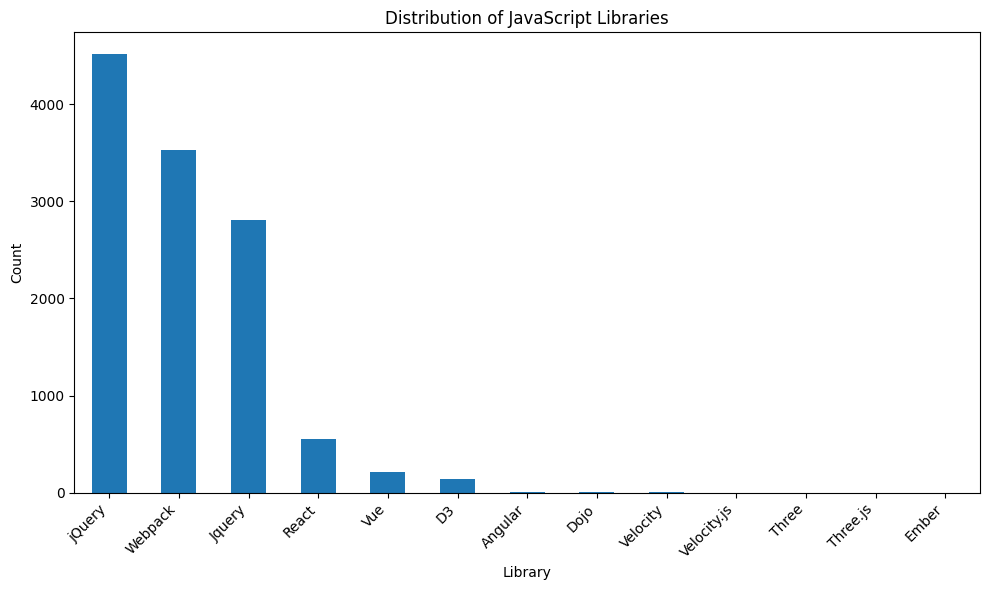

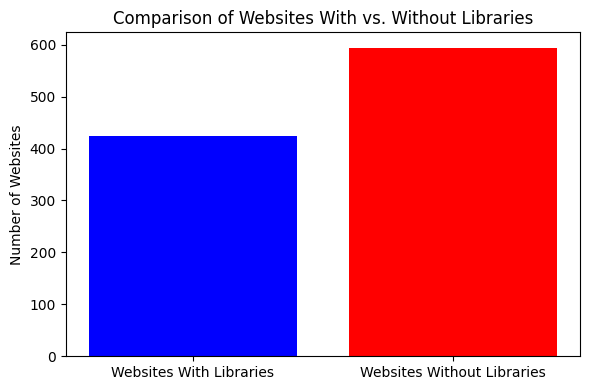

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

def fetch_data_as_dataframe(db_name="website_dataPrototype1000.db"):
    with sqlite3.connect(db_name) as conn:
        # Query to fetch all libraries and corresponding website URLs
        query = """
        SELECT websites.url, libraries.library, libraries.version, libraries.link 
        FROM websites
        LEFT JOIN libraries ON websites.id = libraries.website_id
        """
        # Load query results into a DataFrame
        df = pd.read_sql_query(query, conn)
    return df

def identify_websites_without_libraries(df):
    # Identify websites without libraries by checking for NaN in 'library' column
    websites_without_libraries = df[df['library'].isna()]['url'].unique()
    print("Websites Without Any Libraries:")
    for url in websites_without_libraries:
        print(url)
    print("\nTotal Websites Without Any Libraries:", len(websites_without_libraries))
    print("\n")

def print_statistics_and_generate_histograms(df):
    # Filter out rows where 'library' is NaN before generating statistics for libraries
    df_with_libraries = df.dropna(subset=['library'])
    websites_with_libraries_count = len(df_with_libraries['url'].unique())
    websites_without_libraries_count = len(df[df['library'].isna()]['url'].unique())

    # Basic statistics on the number of libraries found
    print("Basic Statistics on Libraries:")
    library_counts = df_with_libraries['library'].value_counts()
    print(library_counts.to_string())
    print("\n")

    # Generate histogram for library distribution
    plt.figure(figsize=(10, 6))
    library_counts.plot(kind='bar')
    plt.title('Distribution of JavaScript Libraries')
    plt.xlabel('Library')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # Generate histogram to compare websites with and without libraries
    plt.figure(figsize=(6, 4))
    categories = ['Websites With Libraries', 'Websites Without Libraries']
    counts = [websites_with_libraries_count, websites_without_libraries_count]
    plt.bar(categories, counts, color=['blue', 'red'])
    plt.title('Comparison of Websites With vs. Without Libraries')
    plt.ylabel('Number of Websites')
    plt.tight_layout()
    plt.show()

db_name="website_dataPrototype1000.db"
df = fetch_data_as_dataframe(db_name)
identify_websites_without_libraries(df)
print_statistics_and_generate_histograms(df)
    


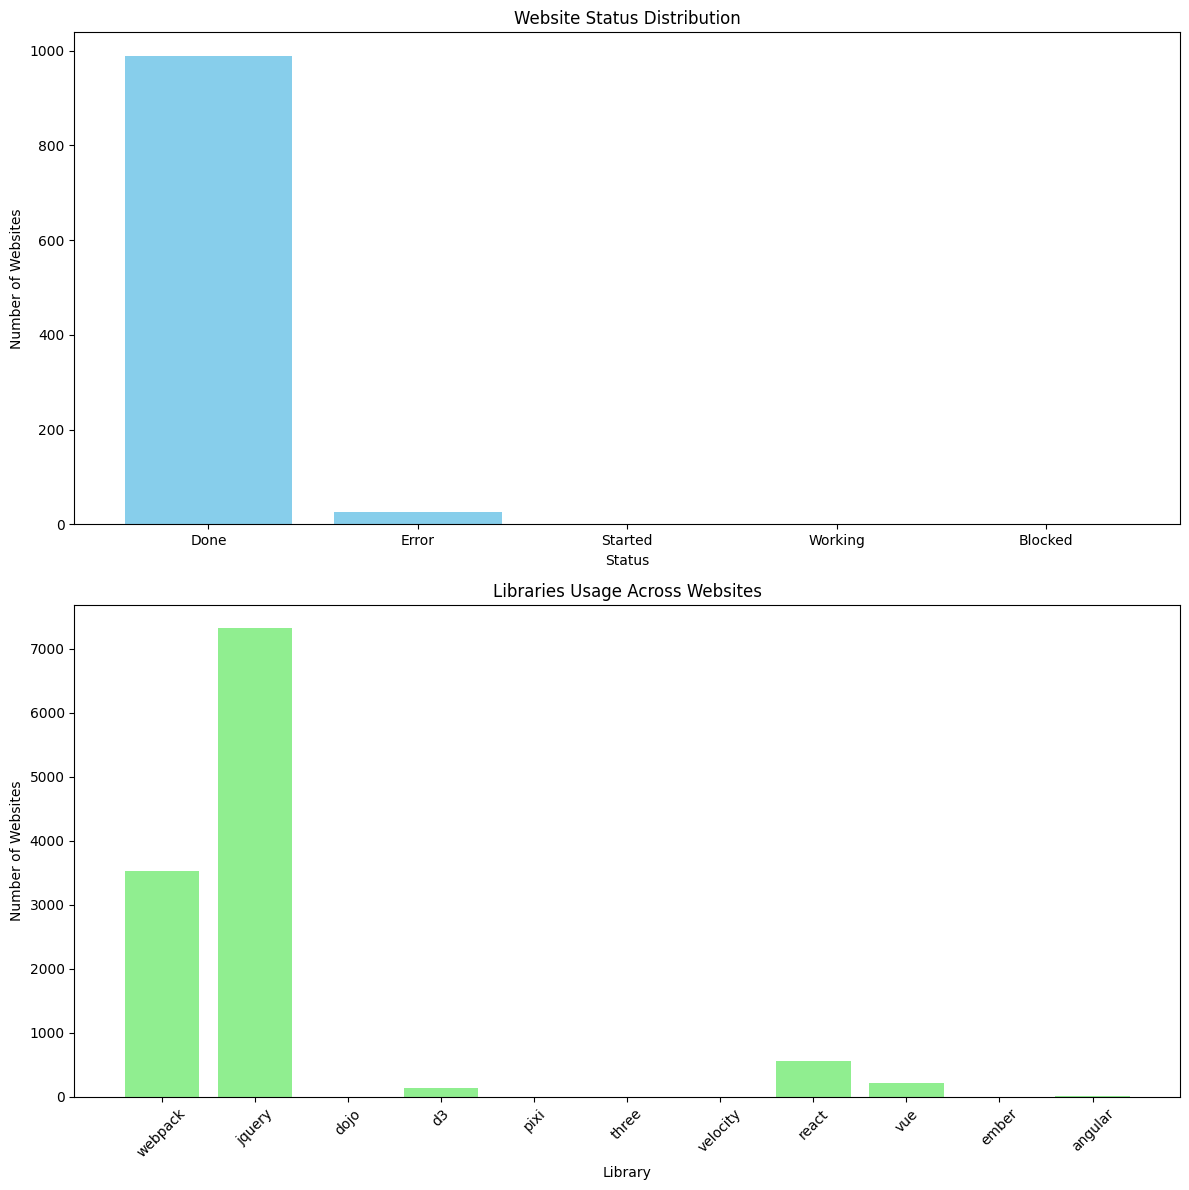

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your SQLite database
db_path = 'website_dataPrototype1000.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Load websites' statuses into a DataFrame
websites_df = pd.read_sql_query("SELECT status FROM websites", conn)

# Load libraries data into a DataFrame
libraries_df = pd.read_sql_query("""
SELECT lib.website_id, web.url, lib.library
FROM libraries lib
JOIN websites web ON lib.website_id = web.id
""", conn)

# Close the database connection
conn.close()

# Analysis 1: Website Statuses
status_counts = websites_df['status'].value_counts()

# Analysis 2: Libraries Usage
# Identify websites using Webpack and other specified libraries
specified_libraries = ['webpack', 'jquery', 'dojo', 'd3', 'pixi', 'three', 
                       'velocity', 'react', 'vue', 'ember', 'angular']
libraries_usage = {lib: libraries_df['library'].str.contains(lib, case=False).sum() for lib in specified_libraries}

# Convert libraries_usage to DataFrame for plotting
libraries_usage_df = pd.DataFrame(list(libraries_usage.items()), columns=['Library', 'Number of Websites'])

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Histogram for Website Statuses
ax[0].bar(status_counts.index, status_counts.values, color='skyblue')
ax[0].set_title('Website Status Distribution')
ax[0].set_xlabel('Status')
ax[0].set_ylabel('Number of Websites')

# Histogram for Libraries Usage
ax[1].bar(libraries_usage_df['Library'], libraries_usage_df['Number of Websites'], color='lightgreen')
ax[1].set_title('Libraries Usage Across Websites')
ax[1].set_xlabel('Library')
ax[1].set_ylabel('Number of Websites')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
#Calculate the number of websites with and without any libraries
#First, let's find the unique website IDs in both the 'websites' table and those that have libraries linked in the 'libraries' table

#Reconnect to the database to perform this analysis
conn = sqlite3.connect('website_dataPrototype1000.db')


#Fetch unique website IDs from the 'websites' table
unique_website_ids = pd.read_sql_query("SELECT id FROM websites", conn)

#Fetch unique website IDs that have at least one library from the 'libraries' table
websites_with_libraries = pd.read_sql_query("SELECT DISTINCT website_id FROM libraries", conn)

#Load the library data into a DataFrame
libraries_df = pd.read_sql_query("""
SELECT lib.website_id, lib.library
FROM libraries lib
""", conn)

#Close the database connection
conn.close()

#Calculate the number of websites without any libraries
websites_without_libraries_count = len(set(unique_website_ids['id']) - set(websites_with_libraries['website_id']))

#Total number of websites
total_websites_count = unique_website_ids.shape[0]

#Number of websites with libraries
websites_with_libraries_count = websites_with_libraries.shape[0]

#Flag rows where the library is Webpack
libraries_df['is_webpack'] = libraries_df['library'].str.contains('webpack', case=False, na=False)

#Websites using Webpack
webpack_websites = libraries_df[libraries_df['is_webpack']]['website_id'].unique()

#Determine the number of websites using Webpack
num_websites_using_webpack = len(webpack_websites)

#Determine websites using Webpack and at least one other library
#First, filter rows for websites using Webpack
webpack_libs_df = libraries_df[libraries_df['website_id'].isin(webpack_websites)]

#Then, group by website_id and count the number of unique libraries (excluding Webpack)
webpack_libs_df = webpack_libs_df[~webpack_libs_df['is_webpack']]  # Exclude webpack rows to count other libraries
websites_with_webpack_and_other_libs = webpack_libs_df.groupby('website_id').filter(lambda x: len(x) > 0)['website_id'].nunique()

{
    "Websites Using Webpack": num_websites_using_webpack,
    "Websites Using Webpack And At Least One Other Library": websites_with_webpack_and_other_libs,
    "Total Websites": total_websites_count,
    "Websites With Libraries": websites_with_libraries_count,
    "Websites Without Libraries or Libraries not detected": websites_without_libraries_count
}


{'Websites Using Webpack': 259,
 'Websites Using Webpack And At Least One Other Library': 179,
 'Total Websites': 1018,
 'Websites With Libraries': 424,
 'Websites Without Libraries or Libraries not detected': 594}

In [ ]:
import sqlite3
import pandas as pd

# Define the path to your SQLite database
db_path = 'website_dataPrototype1000.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Load the library data into a DataFrame
libraries_df = pd.read_sql_query("""
SELECT lib.website_id, lib.library
FROM libraries lib
""", conn)

# Close the database connection
conn.close()

# Flag rows where the library is Webpack
libraries_df['is_webpack'] = libraries_df['library'].str.contains('webpack', case=False, na=False)

# Websites using Webpack
webpack_websites = libraries_df[libraries_df['is_webpack']]['website_id'].unique()

# Determine the number of websites using Webpack
num_websites_using_webpack = len(webpack_websites)

# Determine websites using Webpack and at least one other library
# First, filter rows for websites using Webpack
webpack_libs_df = libraries_df[libraries_df['website_id'].isin(webpack_websites)]

# Then, group by website_id and count the number of unique libraries (excluding Webpack)
webpack_libs_df = webpack_libs_df[~webpack_libs_df['is_webpack']]  # Exclude webpack rows to count other libraries
websites_with_webpack_and_other_libs = webpack_libs_df.groupby('website_id').filter(lambda x: len(x) > 0)['website_id'].nunique()

{
    "Websites Using Webpack": num_websites_using_webpack,
    "Websites Using Webpack And At Least One Other Library": websites_with_webpack_and_other_libs
}

{'Websites Using Webpack': 259,
 'Websites Using Webpack And At Least One Other Library': 179}

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs
import threading
from concurrent.futures import ThreadPoolExecutor, as_completed
import time
import re
import sqlite3
import requests
from urllib.robotparser import RobotFileParser
import os
from difflib import SequenceMatcher

DatabaseName = "website_dataTesting1000.db"

def initialize_db(db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''CREATE TABLE IF NOT EXISTS websites
                          (id INTEGER PRIMARY KEY, url TEXT UNIQUE)''')
        cursor.execute('''CREATE TABLE IF NOT EXISTS libraries
                          (id INTEGER PRIMARY KEY, website_id INTEGER, link TEXT,
                           library TEXT, version TEXT,
                           FOREIGN KEY(website_id) REFERENCES websites(id))''')
        # Commit is automatic with the context manager

def modify_websites_table_add_status(db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        #Add a 'status' column to 'websites' table
        cursor.execute('''ALTER TABLE websites ADD COLUMN status TEXT DEFAULT 'Started' ''')
        #Initialize status for existing rows (if any)
        cursor.execute('''UPDATE websites SET status = 'Started' WHERE status IS NULL''')

def update_website_status(url, status, db_name=DatabaseName):
    #Update the status of website
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''UPDATE websites SET status = ? WHERE url = ?''', (status, url))

def can_fetch_url(website_url, user_agent='*'):
    #Check if website has Robots.txt for ethical reasons 
    parsed_url = urlparse(website_url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    robots_url = f"{base_url}/robots.txt"
    rp = RobotFileParser()
    rp.set_url(robots_url)
    rp.read()
    can_fetch = rp.can_fetch(user_agent, website_url)
    return can_fetch

def fetch_websites_by_status(status, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT url FROM websites WHERE status = ?", (status,))
        return [row[0] for row in cursor.fetchall()]

def get_website_status(url, db_name=DatabaseName):
    #Checki if website completed
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT status FROM websites WHERE url = ?", (url,))
        status = cursor.fetchone()
        if status:
            return status[0]
        else:
            return None

def insert_website_get_id(url, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("INSERT OR IGNORE INTO websites (url) VALUES (?)", (url,))
        cursor.execute("SELECT id FROM websites WHERE url = ?", (url,))
        website_id = cursor.fetchone()[0]
    return website_id

def check_link_processed(website_id, link, db_name=DatabaseName):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    cursor.execute("SELECT id FROM libraries WHERE website_id = ? AND link = ?", (website_id, link))
    result = cursor.fetchone()
    conn.close()
    return result is not None

def check_website_for_cdn(website_url, driver, db_name=DatabaseName):
    #Check if website is using any of the CDN Links to match the js library
    try:
        #Use Selenium's driver to get current page's source for compatibility with dynamic content
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        scripts = soup.find_all('script')
        with sqlite3.connect(db_name) as conn:
            cursor = conn.cursor()
            for script_tag in scripts:
                src = script_tag.get('src')
                if src:
                    cursor.execute("SELECT * FROM library_cdn_links WHERE cdn_link=?", (src,))
                    match = cursor.fetchone()
                    if match:
                        print(f"Match found on {website_url}: {match[2]} for library {match[1]} version {match[3]}")
    except Exception as e:
        print(f"Error checking {website_url}: {e}")

def insert_libraries(website_id, libraries, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        libraries_data = [(website_id, lib['link'], lib['library'], lib['version']) for lib in libraries]
        cursor.executemany('''INSERT INTO libraries (website_id, link, library, version)
                              VALUES (?, ?, ?, ?)''', libraries_data)

def is_internal_link(base_url, link):
    return urlparse(link).netloc == urlparse(base_url).netloc

def create_webdriver():
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Enables headless mode
    chrome_options.add_argument("--no-sandbox")  # Bypass OS security model, REQUIRED for Docker
    chrome_options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems
    chrome_options.add_argument("--window-size=1920,1080")  # Optional: Set a window size if specific dimensions are required for the site
    driver = webdriver.Chrome(options=chrome_options)
    return driver

def get_base_url(url):
    parsed_url = urlparse(url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    return base_url

def get_links(driver, url, max_links=25):
    base_url = get_base_url(url)
    driver.get(url)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    links = set()  #Use a set to avoid duplicates

    for a in soup.find_all('a', href=True):
        href = a['href']
        #Check if the link is internal
        if href.startswith('http') and is_internal_link(base_url, href) and href not in links:
            links.add(href)
            if len(links) == max_links:
                break
    return list(links)

def detect_webpack(soup):
    script_tags = soup.find_all('script', src=True)
    webpack_patterns = [r"bundle\.js", r"webpack", r"\.chunk\.js"]
    webpack_signature = re.compile(r"(webpackJsonp|webpackChunk)")

    for script in script_tags:
        src = script.get('src', '')
        if any(re.search(pattern, src, re.IGNORECASE) for pattern in webpack_patterns):
            print(f"Webpack likely used (filename pattern): {src}")
            return True  #Filename pattern matches commonly used in Webpack
        #download and search within JS files for webpack signatures
        
        if src.startswith("http"):
            try:
                js_content = requests.get(src).text
                if webpack_signature.search(js_content):
                    print(f"Webpack signature found in file: {src}")
                    return True  #Found webpack signature in file content
            except Exception as e:
                print(f"Error downloading script: {src}, error: {e}")

    return False

def get_library_version(driver, lib_details):
    js_check = lib_details['check']
    version = driver.execute_script(f"return {js_check}")
    if version:
        return {"library": lib_details['library'], "version": str(version)}
    return None

def calculate_diff_score(file1_content, file2_content):
    matcher = SequenceMatcher(None, file1_content, file2_content)
    return matcher.ratio()

def read_file_content(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def find_closest_match(library_name, script_content, libraries_base_path="Libraries"):
    best_match = None
    highest_score = 0
    library_path = os.path.join(libraries_base_path, library_name)

    for version_dir in os.listdir(library_path):
        version_path = os.path.join(library_path, version_dir)
        for file in os.listdir(version_path):
            file_path = os.path.join(version_path, file)
            local_file_content = read_file_content(file_path)
            score = calculate_diff_score(script_content, local_file_content)
            if score > highest_score:
                highest_score = score
                best_match = {'library': library_name, 'version': version_dir, 'score': score}

    if best_match and best_match['score'] >= 0.85:
        return best_match
    else:
        return None

def get_scripts_list_from_folder(libraries_base_path="Libraries"):
    scripts = []
    for library_name in os.listdir(libraries_base_path):
        library_path = os.path.join(libraries_base_path, library_name)
        if os.path.isdir(library_path):  # Check if it's a directory
            for version_dir in os.listdir(library_path):
                version_path = os.path.join(library_path, version_dir)
                if os.path.isdir(version_path):  # Check if it's a directory
                    for file in os.listdir(version_path):
                        if file.endswith('.js'):  # Check if the file is a JS file
                            file_path = os.path.join(version_path, file)
                            script_content = read_file_content(file_path)
                            scripts.append((library_name, version_dir, script_content))  # Include version_dir in the tuple
    return scripts

def detect_js_libraries(driver,soup=None):
    
    libraries_to_check = [
    {"library": "Webpack", "check": "!!(window.webpackJsonp || window['webpackJsonp']) ? 'Unknown' : null"},
    {"library": "jQuery", "check": "(typeof jQuery !== 'undefined') ? jQuery.fn.jquery : null"},
    {"library": "Dojo", "check": "(typeof dojo !== 'undefined') ? dojo.version.toString() : null"},
    {"library": "D3", "check": "(typeof d3 !== 'undefined') ? d3.version : null"},
    {"library": "Pixi.js", "check": "(typeof PIXI !== 'undefined') ? PIXI.VERSION : null"},
    {"library": "Three.js", "check": "(typeof THREE !== 'undefined') ? THREE.REVISION : null"},
    {"library": "Velocity.js", "check": "(typeof Velocity !== 'undefined') ? `${Velocity.version.major}.${Velocity.version.minor}.${Velocity.version.patch}` : null"},
    {"library": "React", "check": "(typeof React !== 'undefined') ? React.version : ((typeof _react !== 'undefined') ? _react.version : null)"},
    {"library": "Vue.js", "check": "(typeof Vue !== 'undefined') ? Vue.version : null"},
    {"library": "Ember.js", "check": "(typeof Ember !== 'undefined') ? Ember.VERSION : null"},
    {"library": "Angular", "check": "(window.angular !== undefined) ? window.angular.version.full : ((window.ng !== undefined && window.ng.version !== undefined) ? window.ng.version.full : null)"}
    ]
    
    libraries = []

    #First, check if Webpack is used
    if detect_webpack(soup):
        libraries.append({"library": "Webpack", "version": "Unknown"})
        
    for lib in libraries_to_check:
        lib_version_info = get_library_version(driver, lib)
        if lib_version_info:
            libraries.append(lib_version_info)
    
    if soup is None:
        soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    for script in soup.find_all('script', src=True):
        src = script['src']
        # Pattern examples for popular libraries 
        patterns = {
            'jquery': r"(?i)jquery(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
            'dojo': r"(?i)dojo(?:-\d+\.\d+\.\d+)?\.js",
            'd3': r"(?i)d3(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
            'pixi': r"(?i)pixi(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
            'three': r"(?i)three(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
            'velocity': r"(?i)velocity(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
            'react': r"(?i)react(?:-\d+\.\d+\.\d+)?(?:\.development|\.production\.min)?\.js",
            'vue': r"(?i)vue(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
            'ember': r"(?i)ember(?:-\d+\.\d+\.\d+)?\.min\.js",
            'angular': r"(?i)angular(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
        }
        for lib, pattern in patterns.items():
            if re.search(pattern, src, re.IGNORECASE):
                version_query = parse_qs(urlparse(src).query).get('v', ['Unknown'])[0]
                libraries.append({"library": lib.capitalize(), "version": version_query})
                break  # Assuming one script won't match multiple libraries
    
    if len(libraries) ==0:
        print("No Libraries found. Using dif tool: ")    
        for library_name, script_content in scripts:
            match = find_closest_match(library_name, script_content, "libraries")
            if match:
                libraries.append({
                    "library": match['library'],
                    "version": match['version'],
                    "score": match['score']
                })
            
    return libraries

def visit_links(driver, website_id, website, links, db_name=DatabaseName):
    js_libraries_info = []
    for link in links:
        if check_link_processed(website_id, link, db_name=db_name):
            print(f"Skipping already processed link: {link}")
            continue
        try:
            driver.get(link)
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
            #Check for CDN usage on each visited page
            check_website_for_cdn(link, driver, db_name=db_name)  #Added call to check_website_for_cdn
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            detected_libraries = detect_js_libraries(driver, soup=soup)
            libraries = [{'link': link, 'library': lib['library'], 'version': lib['version']} for lib in detected_libraries]
            if libraries:
                js_libraries_info.append({link: libraries})
                insert_libraries(website_id, libraries, db_name=db_name)  #Adjusted call
        except Exception as e:
            print(f"Error visiting {link}: {e}")
    print(f"JavaScript libraries found in {website}: {js_libraries_info}")
    return js_libraries_info

def process_single_website(website, db_name=DatabaseName):
        # Check robots.txt before proceeding
        if not can_fetch_url(website):
            print(f"Scraping blocked by robots.txt: {website}")
            update_website_status(website, 'Blocked', db_name=db_name)
            return
        
        status = get_website_status(website, db_name=db_name)
        if status == 'Done':
            print(f"Skipping {website} as it is already processed.")
            return
        else:
            driver = create_webdriver()
            try:
                website_id = insert_website_get_id(website, db_name=db_name)
                update_website_status(website, 'Started', db_name=db_name)
                
                links = get_links(driver, website)
                update_website_status(website, 'Working', db_name=db_name)
                
                print(f"Collecting links from: {website}")
                js_libraries_info = visit_links(driver, website_id, website, links, db_name=db_name)
                update_website_status(website, 'Done', db_name=db_name)
                driver.quit()
                return js_libraries_info
            except Exception as e:
                print(f"Error processing {website}: {e}")
                update_website_status(website, 'Error', db_name=db_name)
            finally:
                if driver:
                    driver.quit()
        
def process_websites(websites, db_name=DatabaseName, max_workers=10):
    
    #Fetch websites that are not marked as 'Done'
    not_done_websites = [website for website in websites if website not in fetch_websites_by_status('Done', db_name=db_name)]
    
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_website = {executor.submit(process_single_website, website, db_name): website for website in not_done_websites}
        for future in as_completed(future_to_website):
            website = future_to_website[future]
            try:
                data = future.result()
            except Exception as exc:
                print(f'{website} generated an exception: {exc}')
            else:
                print(f'{website} is processed.')
        print("Finished")

def main():
    with open("WebList1000_modified.txt", 'r') as file:
        websites = [line.strip() for line in file if line.strip()]
    
    process_websites(websites=websites)

if __name__ == "__main__":
    scripts = get_scripts_list_from_folder("libraries")
    initialize_db()  # Make sure the database is initialized
    #modify_websites_table_add_status()  # Add the status column if it hasn't been added yet

    main()  # Start processing

Scraping blocked by robots.txt: https://www.timesofmalta.com
https://www.timesofmalta.com is processed.
Scraping blocked by robots.txt: https://www.facebook.com
https://www.facebook.com is processed.
Scraping blocked by robots.txt: https://www.gov.mt
https://www.gov.mt is processed.
Scraping blocked by robots.txt: https://www.google.com
https://www.google.com is processed.
Scraping blocked by robots.txt: https://www.instagram.com
https://www.instagram.com is processed.
Scraping blocked by robots.txt: https://www.time.is
Scraping blocked by robots.txt: https://www.yellow.com.mt
Scraping blocked by robots.txt: https://www.google.com.mt
https://www.time.is is processed.
https://www.yellow.com.mt is processed.
https://www.google.com.mt is processed.
Scraping blocked by robots.txt: https://www.maltatoday.com.mt
https://www.maltatoday.com.mt is processed.
Scraping blocked by robots.txt: https://www.accuweather.com
https://www.accuweather.com is processed.
Scraping blocked by robots.txt: http

In [ ]:
import sqlite3
import pandas as pd
#Calculate the number of websites with and without any libraries
#First, let's find the unique website IDs in both the 'websites' table and those that have libraries linked in the 'libraries' table

#Reconnect to the database to perform this analysis
conn = sqlite3.connect('website_dataTesting1000.db')


#Fetch unique website IDs from the 'websites' table
unique_website_ids = pd.read_sql_query("SELECT id FROM websites", conn)

#Fetch unique website IDs that have at least one library from the 'libraries' table
websites_with_libraries = pd.read_sql_query("SELECT DISTINCT website_id FROM libraries", conn)

#Load the library data into a DataFrame
libraries_df = pd.read_sql_query("""
SELECT lib.website_id, lib.library
FROM libraries lib
""", conn)

#Close the database connection
conn.close()

#Calculate the number of websites without any libraries
websites_without_libraries_count = len(set(unique_website_ids['id']) - set(websites_with_libraries['website_id']))

#Total number of websites
total_websites_count = unique_website_ids.shape[0]

#Number of websites with libraries
websites_with_libraries_count = websites_with_libraries.shape[0]

#Flag rows where the library is Webpack
libraries_df['is_webpack'] = libraries_df['library'].str.contains('webpack', case=False, na=False)

#Websites using Webpack
webpack_websites = libraries_df[libraries_df['is_webpack']]['website_id'].unique()

#Determine the number of websites using Webpack
num_websites_using_webpack = len(webpack_websites)

#Determine websites using Webpack and at least one other library
#First, filter rows for websites using Webpack
webpack_libs_df = libraries_df[libraries_df['website_id'].isin(webpack_websites)]

#Then, group by website_id and count the number of unique libraries (excluding Webpack)
webpack_libs_df = webpack_libs_df[~webpack_libs_df['is_webpack']]  # Exclude webpack rows to count other libraries
websites_with_webpack_and_other_libs = webpack_libs_df.groupby('website_id').filter(lambda x: len(x) > 0)['website_id'].nunique()

{
    "Websites Using Webpack": num_websites_using_webpack,
    "Websites Using Webpack And At Least One Other Library": websites_with_webpack_and_other_libs,
    "Total Websites": total_websites_count,
    "Websites With Libraries": websites_with_libraries_count,
    "Websites Without Libraries or Libraries not detected": websites_without_libraries_count
}


{'Websites Using Webpack': 259,
 'Websites Using Webpack And At Least One Other Library': 179,
 'Total Websites': 1018,
 'Websites With Libraries': 424,
 'Websites Without Libraries or Libraries not detected': 594}

: 

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.firefox.options import Options
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs
import threading
from concurrent.futures import ThreadPoolExecutor, as_completed
import time
import re
import sqlite3
import requests
from urllib.robotparser import RobotFileParser
import os
from difflib import SequenceMatcher
import logging

DatabaseName = "PrototypeTest1.db"
logging.basicConfig(filename='error_log.txt', level=logging.ERROR, format='%(asctime)s:%(levelname)s:%(message)s')

def initialize_db(db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        
        #Adjust existing Websites table
        cursor.execute('''CREATE TABLE IF NOT EXISTS websites
                          (id INTEGER PRIMARY KEY, Domain TEXT UNIQUE, Status TEXT)''')
        
        #Create Pages table
        cursor.execute('''CREATE TABLE IF NOT EXISTS pages
                          (id INTEGER PRIMARY KEY, website_id INTEGER, url TEXT, status TEXT
                          ,
                           FOREIGN KEY(website_id) REFERENCES websites(id))''')
        
        #Create Scripts table
        cursor.execute('''CREATE TABLE IF NOT EXISTS scripts
                          (id INTEGER PRIMARY KEY,page_id INTEGER, JSTypeWhere TEXT, JSTypeHow TEXT, Library TEXT, version TEXT
                          ,FOREIGN KEY(page_id) REFERENCES pages(id))''')
        
        #Create JSLibraryVersionVulnerabilities table not linked to the others
        cursor.execute('''CREATE TABLE IF NOT EXISTS JSLibraryVersionVulnerabilities
                          (library TEXT, version TEXT, vulnerable TEXT, level TEXT)''')

def insert_scripts(page_id, libraries, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        libraries_data = [(page_id,lib['where'],lib['how'], lib['library'], lib['version']) for lib in libraries]
        cursor.executemany('''INSERT INTO scripts (page_id, JSTypeWhere, JsTypeHow, library, version)
                              VALUES (?, ?, ?, ?, ?)''', libraries_data)

def check_website_for_cdn(website_url, driver, db_name=DatabaseName):
    #Check if website is using any of the CDN Links to match the js library
    libraries = []
    try:
        #Use Selenium's driver to get current page's source for compatibility with dynamic content
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        scripts = soup.find_all('script')
        with sqlite3.connect(db_name) as conn:
            cursor = conn.cursor()
            for script_tag in scripts:
                src = script_tag.get('src')
                if src:
                    cursor.execute("SELECT * FROM library_cdn_links WHERE cdn_link=?", (src,))
                    match = cursor.fetchone()
                    if match:
                        #print(f"Match found on {website_url}: {match[2]} for library {match[1]} version {match[3]}")
                        libraries.append({"how":"cdn","where":"link","library": {match[1]}, "version": {match[3]}})
    except Exception as e:
        #print(f"Error checking {website_url}: {e}")
        logging.error(f"Error processing {website_url}: {e}")
    finally:
        return libraries

def check_page_processed(website_id, link, db_name=DatabaseName):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    cursor.execute("SELECT id FROM pages WHERE website_id = ? AND url = ?", (website_id, link))
    result = cursor.fetchone()
    conn.close()
    return result is not None

def insert_page_get_id(url, website_id , db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("INSERT OR IGNORE INTO pages (url,website_id,status) VALUES (?,?,?)", (url,website_id,'Started'))
        cursor.execute("SELECT id FROM pages WHERE url = ?", (url,))
        website_id = cursor.fetchone()[0]
    return website_id

def fetch_pages_by_status(status, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT url FROM pages WHERE status = ?", (status,))
        return [row[0] for row in cursor.fetchall()]
    
def insert_website_get_id(url, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("INSERT OR IGNORE INTO websites (Domain) VALUES (?)", (url,))
        cursor.execute("SELECT id FROM websites WHERE Domain = ?", (url,))
        website_id = cursor.fetchone()[0]
    return website_id

def fetch_websites_by_status(status, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT Domain FROM websites WHERE Status = ?", (status,))
        return [row[0] for row in cursor.fetchall()]

def update_website_status(url, status, db_name=DatabaseName):
    #Update the status of website
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''UPDATE websites SET Status = ? WHERE Domain = ?''', (status, url))

def update_page_status(url, status, db_name=DatabaseName):
    #Update the status of page
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''UPDATE pages SET Status = ? WHERE url = ?''', (status, url))

def get_website_status(url, db_name=DatabaseName):
    #Check if website completed
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT Status FROM websites WHERE Domain = ? AND status like 'Done'", (url,))
        status = cursor.fetchone()
        if status:
            return status[0]
        else:
            return None

def get_page_status(url, db_name=DatabaseName):
    #Check if page completed
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT status FROM pages WHERE url = ? AND status like 'Done' ", (url,))
        status = cursor.fetchone()
        if status:
            return status[0]
        else:
            return None
        
def read_file_content(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()
    
def get_scripts_list_from_folder(libraries_base_path="Libraries"):
    scripts = []
    for library_name in os.listdir(libraries_base_path):
        library_path = os.path.join(libraries_base_path, library_name)
        if os.path.isdir(library_path):  #Check if it's a directory
            for version_dir in os.listdir(library_path):
                version_path = os.path.join(library_path, version_dir)
                if os.path.isdir(version_path):  #Check if it's a directory
                    for file in os.listdir(version_path):
                        if file.endswith('.js'):  #Check if the file is a JS file
                            file_path = os.path.join(version_path, file)
                            script_content = read_file_content(file_path)
                            scripts.append((library_name, version_dir, script_content))  # Include version_dir in the tuple
    return scripts

def can_fetch_url(website_url, user_agent='*'):
    #Check if website has Robots.txt for ethical reasons 
    parsed_url = urlparse(website_url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    robots_url = f"{base_url}/robots.txt"
    rp = RobotFileParser()
    rp.set_url(robots_url)
    rp.read()
    can_fetch = rp.can_fetch(user_agent, website_url)
    return can_fetch

def create_webdriver():
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Enables headless mode
    chrome_options.add_argument("--no-sandbox")  # Bypass OS security model, REQUIRED for Docker
    chrome_options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems
    chrome_options.add_argument("--window-size=1920,1080")  # Optional: Set a window size if specific dimensions are required for the site
    driver = webdriver.Chrome(options=chrome_options)
    return driver

def create_firefox_webdriver():
    options = Options()
    options.add_argument("--headless")  # Enables headless mode for Firefox
    options.add_argument("--window-size=1920,1080")  # Optional, if specific dimensions are required
    # Additional Firefox-specific configurations can be added here
    driver = webdriver.Firefox(options=options)
    return driver

def get_base_url(url):
    parsed_url = urlparse(url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    return base_url

def is_internal_link(base_url, link):
    return urlparse(link).netloc == urlparse(base_url).netloc

def get_links(driver, url, max_links=25):
    base_url = get_base_url(url)
    driver.get(url)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    links = set()  #Use a set to avoid duplicates
    links.add(url)

    for a in soup.find_all('a', href=True):
        href = a['href']
        #Check if the link is internal
        if href.startswith('http') and is_internal_link(base_url, href) and href not in links:
            links.add(href)
            if len(links) == max_links:
                break
    return list(links)

def detect_webpack(soup):
    script_tags = soup.find_all('script', src=True)
    webpack_patterns = [r"bundle\.js", r"webpack", r"\.chunk\.js"]
    webpack_signature = re.compile(r"(webpackJsonp|webpackChunk)")

    for script in script_tags:
        src = script.get('src', '')
        if any(re.search(pattern, src, re.IGNORECASE) for pattern in webpack_patterns):
            #print(f"Webpack likely used (filename pattern): {src}")
            return True  #Filename pattern matches commonly used in Webpack
        #download and search within JS files for webpack signatures
        
        if src.startswith("http"):
            try:
                js_content = requests.get(src).text
                if webpack_signature.search(js_content):
                    #print(f"Webpack signature found in file: {src}")
                    return True  #Found webpack signature in file content
            except Exception as e:
                #print(f"Error downloading script: {src}, error: {e}")
                logging.error(f"Error processing {src}: {e}")

    return False

def get_library_version(driver, lib_details):
    js_check = lib_details['check']
    version = driver.execute_script(f"return {js_check}")
    if version:
        return {"library": lib_details['library'], "version": str(version), "how": "execute script", "where": "scripts"}
    else:
        #return {"library": lib_details['library'], "version": "Unknown", "how": "execute script", "where": "scripts"}
        return None
def calculate_diff_score(file1_content, file2_content):
    matcher = SequenceMatcher(None, file1_content, file2_content)
    return matcher.ratio()

def find_closest_match(library_name, script_content, libraries_base_path="Libraries"):
    best_match = None
    highest_score = 0
    library_path = os.path.join(libraries_base_path, library_name)

    for version_dir in os.listdir(library_path):
        version_path = os.path.join(library_path, version_dir)
        for file in os.listdir(version_path):
            file_path = os.path.join(version_path, file)
            local_file_content = read_file_content(file_path)
            score = calculate_diff_score(script_content, local_file_content)
            if score > highest_score:
                highest_score = score
                best_match = {'library': library_name, 'version': version_dir, 'score': score}
                if best_match['score'] >= 0.975:
                    return best_match
        
    else:
        return None
    
def detect_inline_js_libraries(soup):
    inline_libraries = []
    # Define patterns or conditions specific to libraries
    patterns = {
        'jQuery': r'\$\(',  # Looking for jQuery's $() pattern
        'Dojo': r'dojo\.require',  # Dojo's way of module importing
        'D3': r'd3\.',  # Accessing d3's methods
        'Pixi.js': r'new PIXI\.',  # Creating a new Pixi instance
        'Three.js': r'THREE\.',  # Accessing Three.js methods
        'Velocity': r'\.velocity\(',  # Calling Velocity's animation function
        'React': r'ReactDOM\.render\(',  # React's method to render components
        'Vue': r'new Vue\(',  # Instantiating Vue
        'Ember': r'Ember\.Application\.create\(',  # Starting an Ember application
        'Angular': r'angular\.module\(',  # Defining an Angular module
    }
    for script in soup.find_all('script'):
        if not script.get('src'):  # This means the script is inline
            script_content = script.string if script.string else ""
            for lib, pattern in patterns.items():
                if re.search(pattern, script_content, re.IGNORECASE):
                    inline_libraries.append({"library": lib, "how": "inline script", "where": "inline"})
                    break  # Assuming one script won't use multiple libraries from this list
    return inline_libraries

def detect_js_libraries(driver,current_url,soup=None):
    try:
        libraries_to_check = [
        {"library": "Webpack", "check": "!!(window.webpackJsonp || window['webpackJsonp']) ? 'Unknown' : null"},
        {"library": "jQuery", "check": "(typeof jQuery !== 'undefined') ? jQuery.fn.jquery : null"},
        {"library": "Dojo", "check": "(typeof dojo !== 'undefined') ? dojo.version.toString() : null"},
        {"library": "D3", "check": "(typeof d3 !== 'undefined') ? d3.version : null"},
        {"library": "Pixi.js", "check": "(typeof PIXI !== 'undefined') ? PIXI.VERSION : null"},
        {"library": "Three.js", "check": "(typeof THREE !== 'undefined') ? THREE.REVISION : null"},
        {"library": "Velocity.js", "check": "typeof Velocity !== 'undefined' ? Velocity : null"},
        {"library": "React", "check": "(typeof React !== 'undefined') ? React.version : ((typeof _react !== 'undefined') ? _react.version : null)"},
        {"library": "Vue.js", "check": "(typeof Vue !== 'undefined') ? Vue.version : null"},
        {"library": "Ember.js", "check": "(typeof Ember !== 'undefined') ? Ember.VERSION : null"},
        {"library": "Angular", "check": "(window.angular !== undefined) ? window.angular.version.full : ((window.ng !== undefined && window.ng.version !== undefined) ? window.ng.version.full : null)"}
        ]
        
        libraries = []

        #First, check if Webpack is used
        if detect_webpack(soup):
            libraries.append({"library": "Webpack", "version": "Unknown","how":"known filename","where":"scripts"})
            
        for lib in libraries_to_check:
            lib_version_info = get_library_version(driver, lib)
            if lib_version_info and lib_version_info != None:
                libraries.append(lib_version_info)
        
        if soup is None:
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            
        libraries.append(detect_inline_js_libraries(soup=soup))
        
        for script in soup.find_all('script', src=True):
            src = script['src']
            # Pattern examples for popular libraries 
            patterns = {
                'jquery': r"(?i)jquery(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'dojo': r"(?i)dojo(?:-\d+\.\d+\.\d+)?\.js",
                'd3': r"(?i)d3(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'pixi': r"(?i)pixi(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'three': r"(?i)three(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'velocity': r"(?i)velocity(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'react': r"(?i)react(?:-\d+\.\d+\.\d+)?(?:\.development|\.production\.min)?\.js",
                'vue': r"(?i)vue(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'ember': r"(?i)ember(?:-\d+\.\d+\.\d+)?\.min\.js",
                'angular': r"(?i)angular(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js"
            }
            for lib, pattern in patterns.items():
                if re.search(pattern, src, re.IGNORECASE):
                    #version_query = parse_qs(urlparse(src).query).get('v', ['Unknown'])[0]
                    #libraries.append({"library": lib.capitalize(), "version": version_query,"how":"known pattern","where":"scripts"})
                    version_query = parse_qs(urlparse(src).query).get('v', ['Unknown'])[0]
                    if isinstance(version_query, list):
                        version_query = version_query[0] if version_query else 'Unknown'
                    libraries.append({"library": lib.capitalize(), "version": version_query, "how": "known pattern", "where": "scripts"})
                    break  # Assuming one script won't match multiple libraries
        
        if len(libraries) ==0:
            print("No Libraries found. Using dif tool: ")    
            for library_name, version, script_content in scripts:
                match = find_closest_match(library_name, script_content, "libraries")
                if match:
                    print("Match, Library: ", match['library']," Version: ", match['version'],"Score",match['score'])
                    libraries.append({
                        "library": match['library'],
                        "version": match['version'],
                        "how":"dif",
                        "where":"scripts"
                    })
                    break
        if libraries is not None:
            print('Found Libraries: ' + ', '.join([str(lib) for lib in libraries]))
        else:
            print('No libraries found.')
        return libraries
    except Exception as e:
            print(f"Error visiting {current_url}: {e}")
            logging.error(f"Error detecting {driver}: {e}")
            
def visit_links(driver, website_id, website, links, db_name=DatabaseName):
    js_libraries_info = []
    js_type_where = ""
    js_type_how = ""
    for link in links:
        page_id = insert_page_get_id(link,website_id, db_name=db_name)
        if get_page_status(link, db_name=db_name):
            print(f"Skipping already processed link: {link}")
            continue
        try:
            driver.get(link)
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
            #Check for CDN usage on each visited page
            detected_libraries = check_website_for_cdn(link, driver, db_name=db_name)  #Added call to check_website_for_cdn
            
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            
            detected_libraries = detect_js_libraries(driver,link ,soup=soup)
            libraries = [{'how': lib['how'], 'where': lib['where'], 'library': lib['library'], 'version': lib.get('version', 'Unknown')} for lib in detected_libraries]
            #was fixing the above line
            if libraries:
                js_libraries_info.append({link: libraries})
                insert_scripts(page_id, libraries, db_name=db_name)  #Adjusted call
            update_page_status(link,"Done",db_name=db_name)   
        except Exception as e:
            print(f"Error processing {link}: {e}")
            logging.error(f"Error processing {link}: {e}")
            update_page_status(link,"Error",db_name=db_name)
        
    if js_libraries_info:
        print(f"JavaScript libraries found in {website}: {js_libraries_info}")
        
    return js_libraries_info

def process_single_website(website, db_name=DatabaseName):
        # Check robots.txt before proceeding
        #if not can_fetch_url(website):
        #    print(f"Scraping blocked by robots.txt: {website}")
        #    update_website_status(website, 'Blocked', db_name=db_name)
        #    return
        
        status = get_website_status(website, db_name=db_name)
        if status == 'Done':
            print(f"Skipping {website} as it is already processed.")
            return
        else:
            #driver =create_firefox_webdriver()
            driver = create_webdriver()
            try:
                website_id = insert_website_get_id(website, db_name=db_name)
                update_website_status(website, 'Started', db_name=db_name)
                
                links = get_links(driver, website)
                update_website_status(website, 'Working', db_name=db_name)
                
                print(f"Collecting links from: {website}")
                js_libraries_info = visit_links(driver, website_id, website, links, db_name=db_name)
                update_website_status(website, 'Done', db_name=db_name)
                driver.quit()
                return js_libraries_info
            except Exception as e:
                print(f"Error processing {website}: {e}")
                logging.error(f"Error processing {website}: {e}")
                update_website_status(website, 'Error', db_name=db_name)
            finally:
                if driver:
                    driver.quit()
        
def process_websites(websites, db_name=DatabaseName, max_workers=10):
    #Fetch websites that are not marked as 'Done'
    done_websites = [website for website in websites if website in fetch_websites_by_status('Done', db_name=db_name)]
    not_done_websites = [website for website in websites if website not in fetch_websites_by_status('Done', db_name=db_name)]

    total_websites = len(websites)-len(done_websites)
    processed_websites = 0
    if total_websites <= 0:
        print("No websites to process or all websites are already marked as 'Done'.")
        return
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_website = {executor.submit(process_single_website, website, db_name): website for website in not_done_websites}
        for future in as_completed(future_to_website):
            website = future_to_website[future]
            try:
                processed_websites += 1
                data = future.result()
                progress_percent = (processed_websites / total_websites) * 100
                print(f"Progress: {progress_percent:.2f}% ({processed_websites}/{total_websites})")
            except Exception as exc:
                logging.error(f"Error processing {website}: {exc}")
                print(f'{website} generated an exception: {exc}')
            else:
                print(f'{website} is processed.')
        print("All websites have been processed.")

def main():
    with open("WebList1000_modified.txt", 'r') as file:
        websites = [line.strip() for line in file if line.strip()]  
    process_websites(websites=websites)
    
if __name__ == "__main__":
    scripts = get_scripts_list_from_folder("libraries")
    initialize_db()  #Make sure the database is initialized
    main()  #Start processing
    print("Finished Program")

No Libraries found. Using dif tool: 


Error processing https://www.tripadvisor.com: database is locked
Match, Library:  angular  Version:  1.0.0 Score 1.0
Found Libraries: {'library': 'angular', 'version': '1.0.0', 'how': 'dif', 'where': 'scripts'}Progress: 0.10% (1/995)
https://www.tripadvisor.com is processed.

No Libraries found. Using dif tool: 
No Libraries found. Using dif tool: 
Match, Library:  angular  Version:  1.0.0 Score 1.0
Found Libraries: {'library': 'angular', 'version': '1.0.0', 'how': 'dif', 'where': 'scripts'}
Match, Library:  angular  Version:  1.0.0 Score 1.0
Found Libraries: {'library': 'angular', 'version': '1.0.0', 'how': 'dif', 'where': 'scripts'}
No Libraries found. Using dif tool: 
Match, Library:  angular  Version:  1.0.0 Score 1.0
Found Libraries: {'library': 'angular', 'version': '1.0.0', 'how': 'dif', 'where': 'scripts'}
JavaScript libraries found in https://www.time.is: [{'https://www.time.is': [{'how': 'dif', 'where': 'scripts', 'library': 'angular', '

In [ ]:
import sqlite3
import pandas as pd
#Calculate the number of websites with and without any libraries
#First, let's find the unique website IDs in both the 'websites' table and those that have libraries linked in the 'libraries' table

#Reconnect to the database to perform this analysis
conn = sqlite3.connect('PrototypeTest1.db')


#Fetch unique website IDs from the 'websites' table
unique_website_ids = pd.read_sql_query("SELECT id FROM websites", conn)

#Fetch unique website IDs that have at least one library from the 'libraries' table
website_pages = pd.read_sql_query("SELECT DISTINCT website_id FROM pages", conn)

pages_script = pd.read_sql_query("SELECT * FROM scripts", conn)

#Load the library data into a DataFrame
libraries_df = pd.read_sql_query("""
SELECT lib.page_id, lib.Library
FROM scripts lib
""", conn)

#Close the database connection


#print(pd.read_sql_query("SELECT status, count(domain) FROM websites where status not like 'done' group by status", conn))

#print(pd.read_sql_query("SELECT * from websites", conn))
#print(pd.read_sql_query("SELECT * from pages", conn))
#print(pd.read_sql_query("SELECT * from scripts", conn))

print(pd.read_sql_query("SELECT library,version, count(p.website_id) FROM websites w join pages p on w.id = p.website_id join scripts s on s.page_id = p.id group by s.Library , version ", conn))

conn.close()


     Library version  count(p.website_id)
0    Angular   1.4.0                    1
1    Angular  1.4.14                    1
2    Angular  1.6.10                    4
3    Angular   1.6.3                    1
4    Angular   1.6.4                   25
..       ...     ...                  ...
105   jQuery   3.6.3                   75
106   jQuery   3.6.4                  177
107   jQuery  3.60.3                   25
108   jQuery   3.7.0                  200
109   jQuery   3.7.1                 1135

[110 rows x 3 columns]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

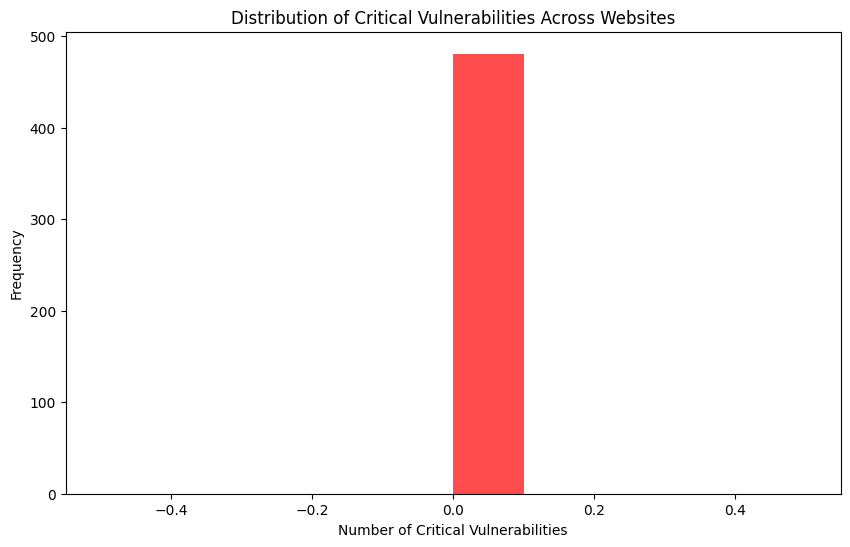

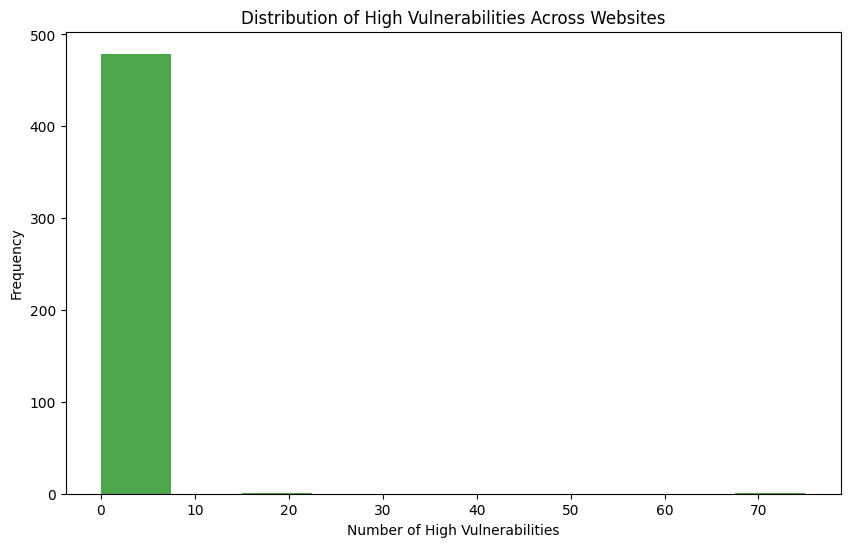

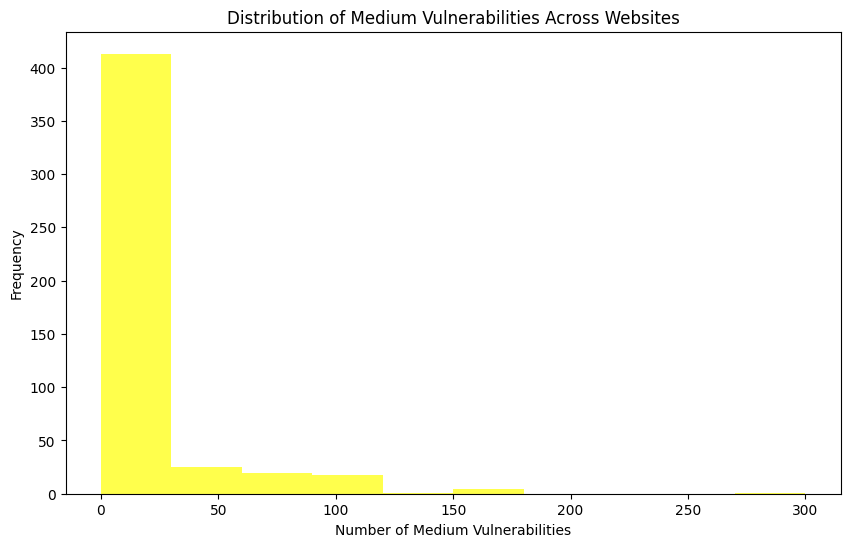

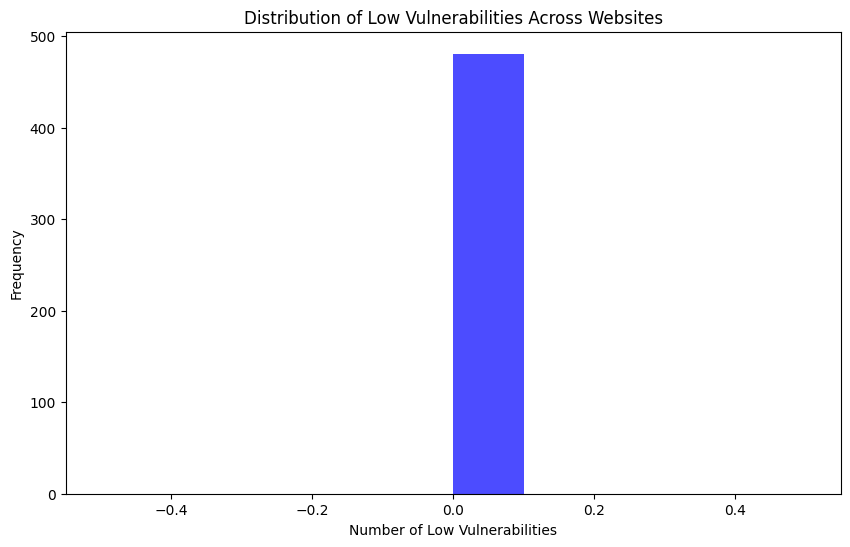

NameError: name 'np' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
import sqlite3
import matplotlib.pyplot as plt

# Connect to the SQLite database
db_path = 'PrototypeTest1.db'
conn = sqlite3.connect(db_path)

# Prepare a cursor
cur = conn.cursor()

# Example query execution (you'll need to adjust or add queries as needed)
cur.execute("""
SELECT 
  w.Domain,
  w.Status,
  s.JSTypeHow,
  s.JSTypeWhere,
  sum(jvl.critical_vulnerabilities) AS total_critical_vulnerabilities,
  sum(jvl.high_vulnerabilities) AS total_high_vulnerabilities,
  sum(jvl.medium_vulnerabilities) AS total_medium_vulnerabilities,
  sum(jvl.low_vulnerabilities) AS total_low_vulnerabilities
FROM websites w
JOIN pages p ON w.id = p.website_id
JOIN scripts s ON p.id = s.page_id
JOIN JSLibraryVersionVulnerabilities jvl ON s.Library like jvl.library_name AND s.version = jvl.version
GROUP BY w.Domain
""")
data = cur.fetchall()

cur.execute("""
            select status, count(status) from websites group by status 
            """)
statusData = cur.fetchall()
# Close the database connection
conn.close()

# Data preparation 
domains = [row[0] for row in data]
critical_counts = [row[4] for row in data]
high_counts = [row[5] for row in data]
medium_counts = [row[6] for row in data]
low_counts = [row[7] for row in data]
statuses =[row[0] for row in statusData]
statusesCount =[row[1] for row in statusData]

print(critical_counts)
print(high_counts)
print(medium_counts)
print(low_counts)


# Generating Histograms (example)
plt.figure(figsize=(10, 6))
plt.hist(critical_counts, bins=10, color='red', alpha=0.7)
plt.title('Distribution of Critical Vulnerabilities Across Websites')
plt.xlabel('Number of Critical Vulnerabilities')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(high_counts, bins=10, color='green', alpha=0.7)
plt.title('Distribution of High Vulnerabilities Across Websites')
plt.xlabel('Number of High Vulnerabilities')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(medium_counts, bins=10, color='yellow', alpha=0.7)
plt.title('Distribution of Medium Vulnerabilities Across Websites')
plt.xlabel('Number of Medium Vulnerabilities')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(low_counts, bins=10, color='blue', alpha=0.7)
plt.title('Distribution of Low Vulnerabilities Across Websites')
plt.xlabel('Number of Low Vulnerabilities')
plt.ylabel('Frequency')
plt.show()

# Simulated data for demonstration
website_status = ['Active', 'Inactive', 'Active', 'Active', 'Inactive', 'Active']
libraries = ['jQuery', 'React', 'Vue', 'React', 'jQuery', 'Vue', 'React']
vulnerabilities = {
    'Critical': [10, 5, 0, 2, 1, 0],
    'High': [20, 15, 5, 10, 2, 3],
    'Medium': [30, 25, 10, 20, 5, 5],
    'Low': [40, 30, 15, 25, 10, 8]
}
jstypehow = ['Inline', 'External', 'Inline', 'Inline', 'External']
jstypewhere = ['Header', 'Footer', 'Header', 'Body', 'Footer']



# Website Status Histogram
plt.figure(figsize=(10, 6))
statuses, counts = np.unique(statusData, return_counts=True)
plt.bar(statuses, statusesCount, color='skyblue')
plt.title('Website Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Websites')
plt.show()

# Most Used Libraries Histogram
plt.figure(figsize=(10, 6))
libs, lib_counts = np.unique(libraries, return_counts=True)
plt.bar(libs, lib_counts, color='lightgreen')
plt.title('Most Used Libraries')
plt.xlabel('Library')
plt.ylabel('Usage Count')
plt.show()

# Vulnerable Websites Histogram
plt.figure(figsize=(10, 6))
for level, counts in vulnerabilities.items():
    plt.hist(counts, bins=10, alpha=0.5, label=level)
plt.title('Vulnerability Distribution Across Websites')
plt.xlabel('Number of Vulnerabilities')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# JSTypeHow Histogram
plt.figure(figsize=(10, 6))
how_types, how_counts = np.unique(jstypehow, return_counts=True)
plt.bar(how_types, how_counts, color='orange')
plt.title('Distribution of JSTypeHow')
plt.xlabel('Type of JS Implementation')
plt.ylabel('Count')
plt.show()

# JSTypeWhere Histogram
plt.figure(figsize=(10, 6))
where_types, where_counts = np.unique(jstypewhere, return_counts=True)
plt.bar(where_types, where_counts, color='purple')
plt.title('Distribution of JSTypeWhere')
plt.xlabel('Location of JS')
plt.ylabel('Count')
plt.show()

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.firefox.options import Options
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs
import threading
from concurrent.futures import ThreadPoolExecutor, as_completed
import time
import re
import sqlite3
import requests
from urllib.robotparser import RobotFileParser
import os
from difflib import SequenceMatcher
import logging

DatabaseName = "PrototypeDBinUse.db"
logging.basicConfig(filename='error_log.txt', level=logging.ERROR, format='%(asctime)s:%(levelname)s:%(message)s')

def initialize_db(db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        
        #Adjust existing Websites table
        cursor.execute('''CREATE TABLE IF NOT EXISTS websites
                          (id INTEGER PRIMARY KEY, Domain TEXT UNIQUE, Status TEXT)''')
        
        #Create Pages table
        cursor.execute('''CREATE TABLE IF NOT EXISTS pages
                          (id INTEGER PRIMARY KEY, website_id INTEGER, url TEXT, status TEXT
                          ,
                           FOREIGN KEY(website_id) REFERENCES websites(id))''')
        
        #Create Scripts table
        cursor.execute('''CREATE TABLE IF NOT EXISTS scripts
                          (id INTEGER PRIMARY KEY,page_id INTEGER, JSTypeWhere TEXT, JSTypeHow TEXT, Library TEXT, version TEXT
                          ,FOREIGN KEY(page_id) REFERENCES pages(id))''')
        
        #Create JSLibraryVersionVulnerabilities table not linked to the others
        cursor.execute('''CREATE TABLE IF NOT EXISTS JSLibraryVersionVulnerabilities
                          (library TEXT, version TEXT, vulnerable TEXT, level TEXT)''')

def insert_scripts(page_id, libraries, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        libraries_data = [(page_id,lib['where'],lib['how'], lib['library'], lib['version']) for lib in libraries]
        cursor.executemany('''INSERT INTO scripts (page_id, JSTypeWhere, JsTypeHow, library, version)
                              VALUES (?, ?, ?, ?, ?)''', libraries_data)

def check_website_for_cdn(website_url, driver, db_name=DatabaseName):
    #Check if website is using any of the CDN Links to match the js library
    libraries = []
    try:
        #Use Selenium's driver to get current page's source for compatibility with dynamic content
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        scripts = soup.find_all('script')
        with sqlite3.connect(db_name) as conn:
            cursor = conn.cursor()
            for script_tag in scripts:
                src = script_tag.get('src')
                if src:
                    cursor.execute("SELECT * FROM library_cdn_links WHERE cdn_link=?", (src,))
                    match = cursor.fetchone()
                    if match:
                        #print(f"Match found on {website_url}: {match[2]} for library {match[1]} version {match[3]}")
                        libraries.append({"how":"cdn","where":"link","library": {match[1]}, "version": {match[3]}})
    except Exception as e:
        #print(f"Error checking {website_url}: {e}")
        logging.error(f"Error processing {website_url}: {e}")
    finally:
        return libraries

def check_page_processed(website_id, link, db_name=DatabaseName):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    cursor.execute("SELECT id FROM pages WHERE website_id = ? AND url = ?", (website_id, link))
    result = cursor.fetchone()
    conn.close()
    return result is not None

def insert_page_get_id(url, website_id , db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("INSERT OR IGNORE INTO pages (url,website_id,status) VALUES (?,?,?)", (url,website_id,'Started'))
        cursor.execute("SELECT id FROM pages WHERE url = ?", (url,))
        website_id = cursor.fetchone()[0]
    return website_id

def fetch_pages_by_status(status, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT url FROM pages WHERE status = ?", (status,))
        return [row[0] for row in cursor.fetchall()]
    
def insert_website_get_id(url, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("INSERT OR IGNORE INTO websites (Domain) VALUES (?)", (url,))
        cursor.execute("SELECT id FROM websites WHERE Domain = ?", (url,))
        website_id = cursor.fetchone()[0]
    return website_id

def fetch_websites_by_status(status, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT Domain FROM websites WHERE Status = ?", (status,))
        return [row[0] for row in cursor.fetchall()]

def fetch_websites_by_status(statuses, db_name='DatabaseName.db'):  # Assuming .db extension for clarity
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        # Prepare a tuple of status values for the SQL query's parameters
        # The tuple is required for the query to correctly replace the placeholder with the values
        statuses_tuple = tuple(statuses)
        # Use the IN operator to select domains with any of the statuses in the statuses_tuple
        query = "SELECT Domain FROM websites WHERE Status IN ({seq})".format(seq=','.join(['?']*len(statuses)))
        cursor.execute(query, statuses_tuple)
        return [row[0] for row in cursor.fetchall()]

def update_website_status(url, status, db_name=DatabaseName):
    #Update the status of website
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''UPDATE websites SET Status = ? WHERE Domain = ?''', (status, url))

def update_page_status(url, status, db_name=DatabaseName):
    #Update the status of page
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''UPDATE pages SET Status = ? WHERE url = ?''', (status, url))

def get_website_status(url, db_name=DatabaseName):
    #Check if website completed
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT Status FROM websites WHERE Domain = ? AND status like 'Done'", (url,))
        status = cursor.fetchone()
        if status:
            return status[0]
        else:
            return None
def insert_page_get_id(page_url, website_id, db_name=DatabaseName):
    """
    Inserts a page URL and website ID into the database and returns the page ID.
    
    :param page_url: URL of the page to insert.
    :param website_id: ID of the website the page belongs to.
    :param db_name: Name of the database.
    :return: ID of the inserted page.
    """
    try:
        conn = sqlite3.connect(db_name)
        cursor = conn.cursor()
        cursor.execute("INSERT INTO pages (url, website_id) VALUES (?, ?)", (page_url, website_id))
        conn.commit()
        page_id = cursor.lastrowid
        conn.close()
        return page_id
    except sqlite3.Error as e:
        print(f"Database error: {e}")
        logging.error(f"Database error: {e}")
    except Exception as e:
        print(f"Exception in _query: {e}")
        logging.error(f"Exception in _query: {e}")
    return None


def get_page_status(url, db_name=DatabaseName):
    #Check if page completed
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT status FROM pages WHERE url = ? AND status like 'Done' ", (url,))
        status = cursor.fetchone()
        if status:
            return status[0]
        else:
            return None
        
    
def get_scripts_list_from_folder(libraries_base_path="Libraries"):
    scripts = []
    for library_name in os.listdir(libraries_base_path):
        library_path = os.path.join(libraries_base_path, library_name)
        if os.path.isdir(library_path):  #Check if it's a directory
            for version_dir in os.listdir(library_path):
                version_path = os.path.join(library_path, version_dir)
                if os.path.isdir(version_path):  #Check if it's a directory
                    for file in os.listdir(version_path):
                        if file.endswith('.js'):  #Check if the file is a JS file
                            file_path = os.path.join(version_path, file)
                            script_content = read_file_content(file_path)
                            scripts.append((library_name, version_dir, script_content))  # Include version_dir in the tuple
    return scripts

def can_fetch_url(website_url, user_agent='*'):
    #Check if website has Robots.txt for ethical reasons 
    parsed_url = urlparse(website_url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    robots_url = f"{base_url}/robots.txt"
    rp = RobotFileParser()
    rp.set_url(robots_url)
    rp.read()
    can_fetch = rp.can_fetch(user_agent, website_url)
    return can_fetch

def create_webdriver():
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Enables headless mode
    chrome_options.add_argument("--no-sandbox")  # Bypass OS security model, REQUIRED for Docker
    chrome_options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems
    chrome_options.add_argument("--window-size=1920,1080")  # Optional: Set a window size if specific dimensions are required for the site
    driver = webdriver.Chrome(options=chrome_options)
    return driver

def create_firefox_webdriver():
    options = Options()
    options.add_argument("--headless")  # Enables headless mode for Firefox
    options.add_argument("--window-size=1920,1080")  # Optional, if specific dimensions are required
    # Additional Firefox-specific configurations can be added here
    driver = webdriver.Firefox(options=options)
    return driver

def get_base_url(url):
    parsed_url = urlparse(url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    return base_url

def is_internal_link(base_url, link):
    return urlparse(link).netloc == urlparse(base_url).netloc

def get_links(driver, url, max_links=25):
    base_url = get_base_url(url)
    driver.get(url)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    links = set()  #Use a set to avoid duplicates
    links.add(url)

    for a in soup.find_all('a', href=True):
        href = a['href']
        #Check if the link is internal
        if href.startswith('http') and is_internal_link(base_url, href) and href not in links:
            links.add(href)
            if len(links) == max_links:
                break
    return list(links)

def detect_webpack(soup):
    script_tags = soup.find_all('script', src=True)
    webpack_patterns = [r"bundle\.js", r"webpack", r"\.chunk\.js"]
    webpack_signature = re.compile(r"(webpackJsonp|webpackChunk)")

    for script in script_tags:
        src = script.get('src', '')
        if any(re.search(pattern, src, re.IGNORECASE) for pattern in webpack_patterns):
            #print(f"Webpack likely used (filename pattern): {src}")
            return True  #Filename pattern matches commonly used in Webpack
        #download and search within JS files for webpack signatures
        
        if src.startswith("http"):
            try:
                js_content = requests.get(src).text
                if webpack_signature.search(js_content):
                    #print(f"Webpack signature found in file: {src}")
                    return True  #Found webpack signature in file content
            except Exception as e:
                #print(f"Error downloading script: {src}, error: {e}")
                logging.error(f"Error processing {src}: {e}")

    return False

def get_library_version(driver, lib_details):
    js_check = lib_details['check']
    version = driver.execute_script(f"return {js_check}")
    if version:
        return {"library": lib_details['library'], "version": str(version), "how": "execute script", "where": "scripts"}
    else:
        #return {"library": lib_details['library'], "version": "Unknown", "how": "execute script", "where": "scripts"}
        return None

def read_file_content(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def calculate_diff_score(file1_content, file2_content):
    matcher = SequenceMatcher(None, file1_content, file2_content)
    return matcher.ratio()

def find_closest_match(script_content, libraries_base_path="Libraries"):
    best_match = None
    highest_score = 0
    for library_name in os.listdir(libraries_base_path):
        library_path = os.path.join(libraries_base_path, library_name)
        for version_dir in os.listdir(library_path):
            version_path = os.path.join(library_path, version_dir)
            for file in os.listdir(version_path):
                file_path = os.path.join(version_path, file)
                library_file_content = read_file_content(file_path)
                
                score = calculate_diff_score(script_content, library_file_content)
                print(library_path,version_path," Score: ",score)
                if score > highest_score:
                    highest_score = score
                    if highest_score> 0.95:
                         best_match = (library_name, version_dir, score)
                         return best_match
                     
    return best_match
   
def get_base_url(current_url):
    from urllib.parse import urlparse
    parsed_url = urlparse(current_url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    return base_url

def normalize_url(url, current_url):
    if url.startswith('//'):
        protocol = current_url.split(':')[0]
        return f'{protocol}:{url}'
    elif url.startswith('/'):
        base_url = get_base_url(current_url)
        return f'{base_url}{url}'
    return url

def get_webpage_scripts(driver):
    webpage_scripts = []
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    current_url = driver.current_url
    
    for script in soup.find_all('script'):
        if not script.get('src'):
            script_content = script.text
            if script_content:
                webpage_scripts.append((None, script_content))
        else:
            script_src = normalize_url(script['src'], current_url)
            try:
                response = requests.get(script_src)
                if response.status_code == 200:
                    script_content = response.text
                    webpage_scripts.append((script_src, script_content))
                else:
                    print(f"Failed to fetch script: {script_src}, Status Code: {response.status_code}")
            except Exception as e:
                print(f"Error fetching script {script_src}: {e}")

    return webpage_scripts


def detect_inline_js_libraries(soup):
    inline_libraries = []
    # Define patterns or conditions specific to libraries
    patterns = {
        'jQuery': r'\$\(',  # Looking for jQuery's $() pattern
        'Dojo': r'dojo\.require',  # Dojo's way of module importing
        'D3': r'd3\.',  # Accessing d3's methods
        'Pixi.js': r'new PIXI\.',  # Creating a new Pixi instance
        'Three.js': r'THREE\.',  # Accessing Three.js methods
        'Velocity': r'\.velocity\(',  # Calling Velocity's animation function
        'React': r'ReactDOM\.render\(',  # React's method to render components
        'Vue': r'new Vue\(',  # Instantiating Vue
        'Ember': r'Ember\.Application\.create\(',  # Starting an Ember application
        'Angular': r'angular\.module\(',  # Defining an Angular module
    }
    for script in soup.find_all('script'):
        if not script.get('src'):  # This means the script is inline
            script_content = script.string if script.string else ""
            for lib, pattern in patterns.items():
                if re.search(pattern, script_content, re.IGNORECASE):
                    inline_libraries.append({"library": lib, "how": "inline script", "where": "inline"})
                    break  # Assuming one script won't use multiple libraries from this list
    return inline_libraries

def detect_js_libraries(driver,current_url,soup=None):
    try:
        libraries_to_check = [
        {"library": "Webpack", "check": "!!(window.webpackJsonp || window['webpackJsonp']) ? 'Unknown' : null"},
        {"library": "jQuery", "check": "(typeof jQuery !== 'undefined') ? jQuery.fn.jquery : null"},
        {"library": "Dojo", "check": "(typeof dojo !== 'undefined') ? dojo.version.toString() : null"},
        {"library": "D3", "check": "(typeof d3 !== 'undefined') ? d3.version : null"},
        {"library": "Pixi.js", "check": "(typeof PIXI !== 'undefined') ? PIXI.VERSION : null"},
        {"library": "Three.js", "check": "(typeof THREE !== 'undefined') ? THREE.REVISION : null"},
        {"library": "Velocity.js", "check": "typeof Velocity !== 'undefined' ? Velocity : null"},
        {"library": "React", "check": "(typeof React !== 'undefined') ? React.version : ((typeof _react !== 'undefined') ? _react.version : null)"},
        {"library": "Vue.js", "check": "(typeof Vue !== 'undefined') ? Vue.version : null"},
        {"library": "Ember.js", "check": "(typeof Ember !== 'undefined') ? Ember.VERSION : null"},
        {"library": "Angular", "check": "(window.angular !== undefined) ? window.angular.version.full : ((window.ng !== undefined && window.ng.version !== undefined) ? window.ng.version.full : null)"}
        ]
        
        libraries = []

        #First, check if Webpack is used
        if detect_webpack(soup):
            libraries.append({"library": "Webpack", "version": "Unknown","how":"known filename","where":"scripts"})
            
        for lib in libraries_to_check:
            lib_version_info = get_library_version(driver, lib)
            if lib_version_info and lib_version_info != None:
                libraries.append(lib_version_info)
        
        if soup is None:
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            
        libraries.append(detect_inline_js_libraries(soup=soup))
        
        for script in soup.find_all('script', src=True):
            src = script['src']
            # Pattern examples for popular libraries 
            patterns = {
                'jquery': r"(?i)jquery(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'dojo': r"(?i)dojo(?:-\d+\.\d+\.\d+)?\.js",
                'd3': r"(?i)d3(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'pixi': r"(?i)pixi(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'three': r"(?i)three(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'velocity': r"(?i)velocity(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'react': r"(?i)react(?:-\d+\.\d+\.\d+)?(?:\.development|\.production\.min)?\.js",
                'vue': r"(?i)vue(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'ember': r"(?i)ember(?:-\d+\.\d+\.\d+)?\.min\.js",
                'angular': r"(?i)angular(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js"
            }
            for lib, pattern in patterns.items():
                if re.search(pattern, src, re.IGNORECASE):
                    #version_query = parse_qs(urlparse(src).query).get('v', ['Unknown'])[0]
                    #libraries.append({"library": lib.capitalize(), "version": version_query,"how":"known pattern","where":"scripts"})
                    version_query = parse_qs(urlparse(src).query).get('v', ['Unknown'])[0]
                    if isinstance(version_query, list):
                        version_query = version_query[0] if version_query else 'Unknown'
                    libraries.append({"library": lib.capitalize(), "version": version_query, "how": "known pattern", "where": "scripts"})
                    break  # Assuming one script won't match multiple libraries
        
        webpage_scripts = get_webpage_scripts(driver)        
        
        if len(libraries) == 0:
            
            print("No Libraries found using patterns. Using diff tool:")
            for script_src, script_content in webpage_scripts:
                match = find_closest_match(script_content)
                if match:
                    library_name, version, score = match
                    print(f"Match, Library: {library_name}, Version: {version}, Score: {score}")
                    libraries.append({
                        "library": library_name,
                        "version": version,
                        "how": "diff",
                        "where": "scripts"
                    })
                    break
                    
        
        if libraries:
            print('Found Libraries: ' + ', '.join([f"{lib['library']} v{lib['version']}" for lib in libraries]))
        else:
            print('No libraries found.')
        return libraries
    except Exception as e:
        print(f"Error visiting {current_url}: {e}")
            
def visit_links(driver, website_id, website, links, db_name=DatabaseName):
    js_libraries_info = []
    js_type_where = ""
    js_type_how = ""
    for link in links:
        page_id = insert_page_get_id(link,website_id, db_name=db_name)
        if get_page_status(link, db_name=db_name):
            print(f"Skipping already processed link: {link}")
            continue
        try:
            driver.get(link)
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
            #Check for CDN usage on each visited page
            detected_libraries = check_website_for_cdn(link, driver, db_name=db_name)  #Added call to check_website_for_cdn
            
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            
            detected_libraries = detect_js_libraries(driver,link ,soup=soup)
            libraries = [{'how': lib['how'], 'where': lib['where'], 'library': lib['library'], 'version': lib.get('version', 'Unknown')} for lib in detected_libraries]
            #was fixing the above line
            if libraries:
                js_libraries_info.append({link: libraries})
                insert_scripts(page_id, libraries, db_name=db_name)  #Adjusted call
                update_page_status(link,"Done",db_name=db_name)  
                print (link," Done")
            else:
                update_page_status(link,"No Libraries found",db_name=db_name) 
                print(link," No Libraries found") 
        except Exception as e:
            print(f"Error processing {link}: {e}")
            logging.error(f"Error processing {link}: {e}")
            update_page_status(link,"Error",db_name=db_name)
        
    if js_libraries_info:
        print(f"JavaScript libraries found in {website}: {js_libraries_info}")
        
    return js_libraries_info

def process_single_website(website, db_name=DatabaseName):
        # Check robots.txt before proceeding
        #if not can_fetch_url(website):
        #    print(f"Scraping blocked by robots.txt: {website}")
        #    update_website_status(website, 'Blocked', db_name=db_name)
        #    return
        
        status = get_website_status(website, db_name=db_name)
        if status == 'Done':
            print(f"Skipping {website} as it is already processed.")
            return
        else:
            #driver =create_firefox_webdriver()
            driver = create_webdriver()
            try:
                website_id = insert_website_get_id(website, db_name=db_name)
                update_website_status(website, 'Started', db_name=db_name)
                
                links = get_links(driver, website)
                update_website_status(website, 'Working', db_name=db_name)
                
                print(f"Collecting links from: {website}")
                js_libraries_info = visit_links(driver, website_id, website, links, db_name=db_name)
                if(js_libraries_info):
                    update_website_status(website, 'Done', db_name=db_name)
                    print(f'Done {website}')
                
                else:
                    update_website_status(website, 'No Libraries Found', db_name=db_name)
                    print(f"No Libraries Found {website}")
                driver.quit()
                return js_libraries_info
            except Exception as e:
                print(f"Error processing {website}: {e}")
                logging.error(f"Error processing {website}: {e}")
                update_website_status(website, 'Error', db_name=db_name)
            finally:
                if driver:
                    driver.quit()
        
def process_websites(websites, db_name=DatabaseName, max_workers=10):
    #Fetch websites that are not marked as 'Done'
    #done_websites = [website for website in websites if website in fetch_websites_by_status('Done', db_name=db_name)]
    statuses_to_fetch = ["No Libraries Found", "Done"]
    not_done_websites = [website for website in websites if website not in fetch_websites_by_status(statuses=statuses_to_fetch, db_name=db_name)]


    total_websites = len(websites)-len(not_done_websites)
    processed_websites = 0
    if total_websites <= 0:
        print("No websites to process or all websites are already marked as 'Done'.")
        return
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_website = {executor.submit(process_single_website, website, db_name): website for website in not_done_websites}
        for future in as_completed(future_to_website):
            website = future_to_website[future]
            try:
                processed_websites += 1
                data = future.result()
                progress_percent = (processed_websites / total_websites) * 100
                print(f"Progress: {progress_percent:.2f}% ({processed_websites}/{total_websites})")
            except Exception as exc:
                logging.error(f"Error processing {website}: {exc}")
                print(f'{website} generated an exception: {exc}')
            else:
                print(f'{website} is processed.')
        print("All websites have been processed.")

def main():
    with open("WebList1000_modified.txt", 'r') as file:
        websites = [line.strip() for line in file if line.strip()]  
    process_websites(websites=websites)
    
if __name__ == "__main__":
    scripts = get_scripts_list_from_folder("libraries")
    initialize_db()  #Make sure the database is initialized
    main()  #Start processing
    print("Finished Program")

Error processing https://www.company-information.service.gov.uk: Message: Reached error page: about:neterror?e=dnsNotFound&u=https%3A//www.company-information.service.gov.uk/&c=UTF-8&d=We%20can%E2%80%99t%20connect%20to%20the%20server%20at%20www.company-information.service.gov.uk.
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:193:5
UnknownError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:832:5
checkReadyState@chrome://remote/content/marionette/navigate.sys.mjs:58:24
onNavigation@chrome://remote/content/marionette/navigate.sys.mjs:330:39
emit@resource://gre/modules/EventEmitter.sys.mjs:148:20
receiveMessage@chrome://remote/content/marionette/actors/MarionetteEventsParent.sys.mjs:33:25

Error processing https://www.topchoice.com.mt: Message: Reached error page: about:neterror?e=redirectLoop&u=https%3A//www.topchoice.com.mt/&c=UTF-8&d=Firefox%20has%20detected%20that%20the%20s

The Prototype with upgraded diff tool

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.firefox.options import Options
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs
import threading
from concurrent.futures import ThreadPoolExecutor, as_completed
import time
import re
import sqlite3
import requests
from urllib.robotparser import RobotFileParser
import os
from difflib import SequenceMatcher
import logging
import base64

DatabaseName = "FinalDB.db"
logging.basicConfig(filename='error_log.txt', level=logging.ERROR, format='%(asctime)s:%(levelname)s:%(message)s')

#region

def initialize_db(db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        
        #Adjust existing Websites table
        cursor.execute('''CREATE TABLE IF NOT EXISTS websites
                          (id INTEGER PRIMARY KEY, Domain TEXT UNIQUE, Status TEXT)''')
        
        #Create Pages table
        cursor.execute('''CREATE TABLE IF NOT EXISTS pages
                          (id INTEGER PRIMARY KEY, website_id INTEGER, url TEXT, status TEXT
                          ,
                           FOREIGN KEY(website_id) REFERENCES websites(id))''')
        
        #Create Scripts table
        cursor.execute('''CREATE TABLE IF NOT EXISTS scripts
                          (id INTEGER PRIMARY KEY,page_id INTEGER, JSTypeWhere TEXT, JSTypeHow TEXT, Library TEXT, version TEXT
                          ,FOREIGN KEY(page_id) REFERENCES pages(id))''')
        
        #Create JSLibraryVersionVulnerabilities table not linked to the others
        cursor.execute('''CREATE TABLE IF NOT EXISTS JSLibraryVersionVulnerabilities
                          (library TEXT, version TEXT, vulnerable TEXT, level TEXT)''')

# def insert_scripts(page_id, libraries, db_name=DatabaseName):
#     with sqlite3.connect(db_name) as conn:
#         cursor = conn.cursor()
#         #libraries_data=[]
#         #libraries_data.extend(libraries)
#         libraries_data = [
#             (page_id,
#             lib.get('where', 'default_where'),
#             lib.get('how', 'default_how'),
#             lib.get('library', 'default_library'),
#             lib.get('version', 'default_version'))
#     for lib in libraries
# ]        #libraries_data = [(page_id,lib['where'],lib['how'], lib['library'], lib['version']) for lib in libraries]
#         cursor.executemany('''INSERT INTO scripts (page_id, JSTypeWhere, JsTypeHow, library, version)
#                               VALUES (?, ?, ?, ?, ?)''', libraries_data)
# def insert_scripts(page_id, libraries, db_name=DatabaseName):
#     with sqlite3.connect(db_name) as conn:
#         cursor = conn.cursor()
        
#         # Flatten any nested lists within libraries
#         flattened_libraries = []
#         for item in libraries:
#             if isinstance(item, list):
#                 flattened_libraries.extend(item)  # Extend if item is a list
#             elif isinstance(item, dict):
#                 flattened_libraries.append(item)  # Append if item is a dict
        
#         libraries_data = [
#             (page_id,
#              lib.get('where', 'default_where'),
#              lib.get('how', 'default_how'),
#              lib.get('library', 'default_library'),
#              lib.get('version', 'default_version'))
#             for lib in flattened_libraries
#         ]
        
#         cursor.executemany('''INSERT INTO scripts (page_id, JSTypeWhere, JsTypeHow, library, version)
#                               VALUES (?, ?, ?, ?, ?)''', libraries_data)

def insert_scripts(page_id, libraries, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()

        # Initialize a new list to hold flattened library information
        flattened_libraries = []

        # Iterate through each item in the original libraries list
        for item in libraries:
            # If the item is a dictionary (expected case), append it directly
            if isinstance(item, dict):
                flattened_libraries.append(item)
            # If the item is a list, extend flattened_libraries with this list
            elif isinstance(item, list):
                for subitem in item:
                    # Ensure the subitem is a dictionary before adding
                    if isinstance(subitem, dict):
                        flattened_libraries.append(subitem)
                    else:
                        print("Unexpected structure in libraries list:", subitem)
                        # Handle unexpected structure or skip
            else:
                print("Unexpected structure in libraries list:", item)
                # Handle unexpected structure or skip

        # Prepare the data for database insertion
        libraries_data = [
            (page_id,
             lib.get('where', 'default_where'),
             lib.get('how', 'default_how'),
             lib.get('library', 'default_library'),
             lib.get('version', 'default_version'))
            for lib in flattened_libraries
        ]

        # Execute the database insertion
        cursor.executemany('''INSERT INTO scripts (page_id, JSTypeWhere, JsTypeHow, library, version)
                              VALUES (?, ?, ?, ?, ?)''', libraries_data)

def check_website_for_cdn(website_url, driver, db_name=DatabaseName):
    #Check if website is using any of the CDN Links to match the js library
    libraries = []
    try:
        #Use Selenium's driver to get current page's source for compatibility with dynamic content
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        scripts = soup.find_all('script')
        if scripts:
            with sqlite3.connect(db_name) as conn:
                cursor = conn.cursor()
                for script_tag in scripts:
                    src = script_tag.get('src')
                    if src:
                        cursor.execute("SELECT * FROM library_cdn_links WHERE cdn_link=?", (src,))
                        match = cursor.fetchone()
                        if match:
                            #print(f"Match found on {website_url}: {match[2]} for library {match[1]} version {match[3]}")
                            libraries.append({"how":"cdn","where":"link","library": {match[1]}, "version": {match[3]}})
    except Exception as e:
        print(f"Error finding CDN {website_url}: {e}")
        logging.error(f"Error finding CDN {website_url}: {e}")
    finally:
        return libraries

def check_page_processed(website_id, link, db_name=DatabaseName):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    cursor.execute("SELECT id FROM pages WHERE website_id = ? AND url = ?", (website_id, link))
    result = cursor.fetchone()
    conn.close()
    return result is not None

def insert_page_get_id(url, website_id , db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("INSERT OR IGNORE INTO pages (url,website_id,status) VALUES (?,?,?)", (url,website_id,'Started'))
        cursor.execute("SELECT id FROM pages WHERE url = ?", (url,))
        website_id = cursor.fetchone()[0]
    return website_id

def fetch_pages_by_status(status, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT url FROM pages WHERE status = ?", (status,))
        return [row[0] for row in cursor.fetchall()]
    
def insert_website_get_id(url, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("INSERT OR IGNORE INTO websites (Domain) VALUES (?)", (url,))
        cursor.execute("SELECT id FROM websites WHERE Domain = ?", (url,))
        website_id = cursor.fetchone()[0]
    return website_id

def fetch_websites_by_status1(status, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT Domain FROM websites WHERE Status = ?", (status,))
        return [row[0] for row in cursor.fetchall()]

def fetch_websites_by_status(statuses, db_name=DatabaseName):  # Assuming .db extension for clarity
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        # Prepare a tuple of status values for the SQL query's parameters
        # The tuple is required for the query to correctly replace the placeholder with the values
        statuses_tuple = tuple(statuses)
        # Use the IN operator to select domains with any of the statuses in the statuses_tuple
        query = "SELECT Domain FROM websites WHERE Status IN ({seq})".format(seq=','.join(['?']*len(statuses)))
        cursor.execute(query, statuses_tuple)
        return [row[0] for row in cursor.fetchall()]

def update_website_status(url, status, db_name=DatabaseName):
    #Update the status of website
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''UPDATE websites SET Status = ? WHERE Domain = ?''', (status, url))

def update_page_status(url, status, db_name=DatabaseName):
    #Update the status of page
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''UPDATE pages SET Status = ? WHERE url = ?''', (status, url))

def get_website_status(url, db_name=DatabaseName):
    #Check if website completed
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT Status FROM websites WHERE Domain = ? AND status like 'Done'", (url,))
        status = cursor.fetchone()
        if status:
            return status[0]
        else:
            return None

def get_page_status(url, db_name=DatabaseName):
    #Check if page completed
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT status FROM pages WHERE url = ? AND status like 'Done' ", (url,))
        status = cursor.fetchone()
        if status:
            return status[0]
        else:
            return None
        
#endregion    
def get_scripts_list_from_folder(libraries_base_path="Libraries"):
    scripts = []
    for library_name in os.listdir(libraries_base_path):
        library_path = os.path.join(libraries_base_path, library_name)
        if os.path.isdir(library_path):  #Check if it's a directory
            for version_dir in os.listdir(library_path):
                version_path = os.path.join(library_path, version_dir)
                if os.path.isdir(version_path):  #Check if it's a directory
                    for file in os.listdir(version_path):
                        if file.endswith('.js'):  #Check if the file is a JS file
                            file_path = os.path.join(version_path, file)
                            script_content = read_file_content(file_path)
                            scripts.append((library_name, version_dir, script_content))  # Include version_dir in the tuple
    return scripts

def can_fetch_url(website_url, user_agent='*'):
    #Check if website has Robots.txt for ethical reasons 
    parsed_url = urlparse(website_url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    robots_url = f"{base_url}/robots.txt"
    rp = RobotFileParser()
    rp.set_url(robots_url)
    rp.read()
    can_fetch = rp.can_fetch(user_agent, website_url)
    return can_fetch

def create_webdriver():
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Enables headless mode
    chrome_options.add_argument("--no-sandbox")  # Bypass OS security model, REQUIRED for Docker
    chrome_options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems
    chrome_options.add_argument("--window-size=1920,1080")  # Optional: Set a window size if specific dimensions are required for the site
    driver = webdriver.Chrome(options=chrome_options)
    return driver

def create_firefox_webdriver():
    options = Options()
    options.add_argument("--headless")  # Enables headless mode for Firefox
    options.add_argument("--window-size=1920,1080")  # Optional, if specific dimensions are required
    # Additional Firefox-specific configurations can be added here
    driver = webdriver.Firefox(options=options)
    return driver

def get_base_url(url):
    parsed_url = urlparse(url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    return base_url

def is_internal_link(base_url, link):
    return urlparse(link).netloc == urlparse(base_url).netloc

def get_links(driver, url, max_links=25):
    base_url = get_base_url(url)
    driver.get(url)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    links = set()  #Use a set to avoid duplicates
    links.add(url)
    a_tags = soup.find_all('a', href=True)
    if a_tags:
        for a in a_tags:
            href = a['href']
            #Check if the link is internal
            if href.startswith('http') and is_internal_link(base_url, href) and href not in links:
                links.add(href)
                if len(links) == max_links:
                    break
    return list(links)

# def detect_webpack(soup):
#     script_tags = soup.find_all('script', src=True)
#     webpack_patterns = [r"bundle\.js", r"webpack", r"\.chunk\.js"]
#     webpack_signature = re.compile(r"(webpackJsonp|webpackChunk)")
#     if script_tags:
#         for script in script_tags:
#             src = script.get('src', '')
#             if any(re.search(pattern, src, re.IGNORECASE) for pattern in webpack_patterns):
#                 #print(f"Webpack likely used (filename pattern): {src}")
#                 return True  #Filename pattern matches commonly used in Webpack
#             #download and search within JS files for webpack signatures
            
#             if src.startswith("http"):
#                 try:
#                     js_content = requests.get(src).text
#                     if webpack_signature.search(js_content):
#                         #print(f"Webpack signature found in file: {src}")
#                         return True  #Found webpack signature in file content
#                 except Exception as e:
#                     #print(f"Error downloading script: {src}, error: {e}")
#                     logging.error(f"Detecting Webpack Error {src}: {e}")

#     return False


def detect_webpack(soup):
    script_tags = soup.find_all('script', src=True)
    webpack_patterns = [r"bundle\.js", r"webpack", r"\.chunk\.js"]
    webpack_signature = re.compile(r"(webpackJsonp|webpackChunk)")
    if script_tags:
        for script in script_tags:
            src = script.get('src', '')
            if any(re.search(pattern, src, re.IGNORECASE) for pattern in webpack_patterns):
                return True  # Filename pattern matches commonly used in Webpack
            # Download and search within JS files for webpack signatures
            if src.startswith("http"):
                try:
                    js_content = requests.get(src).text
                    if webpack_signature.search(js_content):
                        return True  # Found webpack signature in file content
                except requests.exceptions.ConnectionError as e:
                    # Handle connection errors specifically
                    print(f"Could not download script {src}: Connection error")
                    logging.error(f"Connection error when accessing {src}: {e}")
                except Exception as e:
                    # Handle other errors
                    print(f"Error downloading script: {src}, error: {e}")
                    logging.error(f"Error downloading script: {src}: {e}")
    return False

def get_library_version(driver, lib_details):
    try:
        js_check = lib_details['check']
        version = driver.execute_script(f"return {js_check}")
        if version is not None:
            version_str = str(version)
            return {
                "library": lib_details['library'],
                "version": version_str,
                "how": "execute script",
                "where": "scripts"
            }
        else:
            return None
    except Exception as e:
        logging.error(f"Error getting library version for {lib_details['library']}: {e}")
        print(f"Error getting library version for {lib_details['library']}: {e}")
        return None
def read_file_content(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def calculate_diff_score(file1_content, file2_content):
    matcher = SequenceMatcher(None, file1_content, file2_content)
    return matcher.ratio()

'''def compare_file(script_content, script_size, file_path, size_tolerance=1024):
    #print("Compering File size")
    file_size = os.path.getsize(file_path)
    if abs(file_size - script_size) <= size_tolerance:
        library_file_content = read_file_content(file_path)
        score = calculate_diff_score(script_content, library_file_content)
        return file_path, score
    return file_path, 0
'''
def compare_file(script_content, script_size, file_path, percentage_tolerance=5):
    # Calculate 5% of the script_size for tolerance
    size_tolerance = script_size * (percentage_tolerance / 100.0)
    
    # Get the size of the file at file_path
    file_size = os.path.getsize(file_path)
    
    # Compare file sizes within the tolerance
    if abs(file_size - script_size) <= size_tolerance:
        library_file_content = read_file_content(file_path)
        score = calculate_diff_score(script_content, library_file_content)
        return file_path, score
    return file_path, 0

def find_closest_match_parallel(script_content, libraries_base_path="Libraries", percentage_tolerance=5):
    print("Finding Closest Match")
    script_size = len(script_content.encode('utf-8'))
    best_match_info = {'score': 0, 'library': None, 'version': None, 'file_path': None}

    # Parallel comparison
    with ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
        futures = {executor.submit(compare_file, script_content, script_size, file_data[2], percentage_tolerance): file_data for file_data in files_to_compare}
        for future in as_completed(futures):
            file_data = futures[future]
            _, score = future.result()
            if score > best_match_info['score']:
                best_match_info.update({'score': score, 'library': file_data[0], 'version': file_data[1], 'file_path': file_data[2]})
                if score > 0.95:  # Early exit if a match is good enough
                    break

    # Check if the highest score meets the threshold
    if best_match_info['score'] > 0.95:
        return True, best_match_info['score'], best_match_info['library'], best_match_info['version']
    else:
        return None, None, None, None  # Or any other way you prefer to indicate a non-sufficient match
def find_closest_match(script_content, libraries_base_path="Libraries", percentage_tolerance=5):
    print("Finding Closest Match")
    script_size = len(script_content.encode('utf-8'))
    best_match_info = {'score': 0, 'library': None, 'version': None, 'file_path': None}

    # Sequential comparison
    for file_data in files_to_compare:
        _, score = compare_file(script_content, script_size, file_data[2], percentage_tolerance)
        if score > best_match_info['score']:
            best_match_info.update({'score': score, 'library': file_data[0], 'version': file_data[1], 'file_path': file_data[2]})
            if score > 0.95:  # Early exit if a match is good enough
                break

    # Check if the highest score meets the threshold
    if best_match_info['score'] > 0.95:
        return True, best_match_info['score'], best_match_info['library'], best_match_info['version']
    else:
        return None, None, None, None  # Or any other way you prefer to indicate a non-sufficient match

def get_base_url(current_url):
    from urllib.parse import urlparse
    parsed_url = urlparse(current_url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    return base_url

# def normalize_url(url, current_url):
#     if url.startswith('//'):
#         protocol = current_url.split(':')[0]
#         return f'{protocol}:{url}'
#     elif url.startswith('/'):
#         base_url = get_base_url(current_url)
#         return f'{base_url}{url}'
#     return url

# def get_webpage_scripts(driver):
#     webpage_scripts = []
#     soup = BeautifulSoup(driver.page_source, 'html.parser')
#     current_url = driver.current_url
    
#     for script in soup.find_all('script'):
#         if script is not None:
#             if not script.get('src'):
#                 script_content = script.text
#                 if script_content:
#                     webpage_scripts.append((None, script_content))
#             else:
#                 script_src = normalize_url(script['src'], current_url)
#                 try:
#                     response = requests.get(script_src)
#                     if response.status_code == 200:
#                         script_content = response.text
#                         webpage_scripts.append((script_src, script_content))
#                     else:
#                         print(f"Failed to fetch script: {script_src}, Status Code: {response.status_code}")
#                 except Exception as e:
#                     print(f"Error fetching script {script_src}: {e}")
#         else:
#             print("No Script tags found")

#     return webpage_scripts
def get_webpage_scripts(driver):
    webpage_scripts = []
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    current_url = driver.current_url

    for script in soup.find_all('script'):
        if script is not None:
            if not script.get('src'):
                script_content = script.text
                if script_content:
                    webpage_scripts.append((None, script_content))
            else:
                script_src = script['src']
                if script_src.startswith('data:'):
                    # Handle data URI
                    content_type, content_data = script_src.split(',', 1)
                    if ';base64' in content_type:
                        content_data = base64.b64decode(content_data)
                    else:
                        content_data = unquote_plus(content_data)
                    webpage_scripts.append((script_src, content_data.decode('utf-8')))
                else:
                    script_src = normalize_url(script_src, current_url)
                    try:
                        response = requests.get(script_src)
                        if response.status_code == 200:
                            script_content = response.text
                            webpage_scripts.append((script_src, script_content))
                        else:
                            print(f"Failed to fetch script: {script_src}, Status Code: {response.status_code}")
                    except Exception as e:
                        print(f"Error fetching script {script_src}: {e}")
        else:
            print("No Script tags found")

    return webpage_scripts

def normalize_url(url, current_url):
    parsed_current_url = urlparse(current_url)
    base_url = f"{parsed_current_url.scheme}://{parsed_current_url.netloc}"
    if url.startswith("//"):
        return f"{parsed_current_url.scheme}:{url}"
    elif url.startswith("/"):
        return f"{base_url}{url}"
    else:
        return url

def detect_inline_js_libraries(soup):
    inline_libraries = []
    # Define patterns or conditions specific to libraries
    patterns = {
        'jQuery': r'\$\(',  # Looking for jQuery's $() pattern
        'Dojo': r'dojo\.require',  # Dojo's way of module importing
        'D3': r'd3\.',  # Accessing d3's methods
        'Pixi.js': r'new PIXI\.',  # Creating a new Pixi instance
        'Three.js': r'THREE\.',  # Accessing Three.js methods
        'Velocity': r'\.velocity\(',  # Calling Velocity's animation function
        'React': r'ReactDOM\.render\(',  # React's method to render components
        'Vue': r'new Vue\(',  # Instantiating Vue
        'Ember': r'Ember\.Application\.create\(',  # Starting an Ember application
        'Angular': r'angular\.module\(',  # Defining an Angular module
    }
    scripts = soup.find_all('script')
    if scripts:
        for script in scripts:
            
            if not script.get('src'):  # This means the script is inline
                script_content = script.string if script.string else ""
                for lib, pattern in patterns.items():
                    if re.search(pattern, script_content, re.IGNORECASE):
                        inline_libraries.append({"library": lib, "how": "inline script", "where": "inline","version": "Unknown"})
    return inline_libraries

def detect_js_libraries(driver,current_url,soup=None):
    try:
        libraries_to_check = [
        {"library": "Webpack", "check": "!!(window.webpackJsonp || window['webpackJsonp']) ? 'Unknown' : null"},
        {"library": "jQuery", "check": "(typeof jQuery !== 'undefined') ? jQuery.fn.jquery : null"},
        {"library": "Dojo", "check": "(typeof dojo !== 'undefined') ? dojo.version.toString() : null"},
        {"library": "D3", "check": "(typeof d3 !== 'undefined') ? d3.version : null"},
        {"library": "Pixi.js", "check": "(typeof PIXI !== 'undefined') ? PIXI.VERSION : null"},
        {"library": "Three.js", "check": "(typeof THREE !== 'undefined') ? THREE.REVISION : null"},
        {"library": "Velocity.js", "check": "typeof Velocity !== 'undefined' ? Velocity : null"},
        {"library": "React", "check": "(typeof React !== 'undefined') ? React.version : ((typeof _react !== 'undefined') ? _react.version : null)"},
        {"library": "Vue.js", "check": "(typeof Vue !== 'undefined') ? Vue.version : null"},
        {"library": "Ember.js", "check": "(typeof Ember !== 'undefined') ? Ember.VERSION : null"},
        {"library": "Angular", "check": "(window.angular !== undefined) ? window.angular.version.full : ((window.ng !== undefined && window.ng.version !== undefined) ? window.ng.version.full : null)"}
        ]
        
        libraries = []
        
        if soup is None:
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            
        #First, check if Webpack is used
        if detect_webpack(soup):
            libraries.append({"library": "Webpack", "version": "Unknown","how":"known filename","where":"scripts"})
            
        for lib in libraries_to_check:
            try:
                lib_version_info = get_library_version(driver, lib)
                if lib_version_info:
                    libraries.append(lib_version_info) 
            except Exception as e:
                logging.error(f"Error getting library version for {lib['library']} in {current_url}: {e}")
                print(f"Error getting library version for {lib['library']} in {current_url}: {e}")
        inline_detected_scripts = detect_inline_js_libraries(soup=soup)
        if(inline_detected_scripts):
            libraries.append(inline_detected_scripts)
            
        # Assuming soup is already defined
        scripts = soup.find_all('script', src=True)
        for script in scripts:
            src = script.get('src')
            # Pattern examples for popular libraries
            patterns = {
                'jquery': r"(?i)jquery(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'dojo': r"(?i)dojo(?:-\d+\.\d+\.\d+)?\.js",
                'd3': r"(?i)d3(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'pixi': r"(?i)pixi(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'three': r"(?i)three(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'velocity': r"(?i)velocity(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'react': r"(?i)react(?:-\d+\.\d+\.\d+)?(?:\.development|\.production\.min)?\.js",
                'vue': r"(?i)vue(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'ember': r"(?i)ember(?:-\d+\.\d+\.\d+)?\.min\.js",
                'angular': r"(?i)angular(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js"
            }
            for lib, pattern in patterns.items():
                if re.search(pattern, src, re.IGNORECASE):
                    parsed_url = urlparse(src)
                    version_query = parse_qs(parsed_url.query).get('v')
                    version = version_query[0] if version_query else 'Unknown'
                    
                    # Ensure correct capitalization for the library name
                    lib_name = lib.capitalize()
                    # Adjust for libraries that have a specific capitalization convention
                    if lib == "jquery":
                        lib_name = "jQuery"
                    elif lib == "d3":
                        lib_name = "D3"
                    elif lib == "pixi":
                        lib_name = "PixiJS"
                    elif lib == "three":
                        lib_name = "Three.js"
                    elif lib == "vue":
                        lib_name = "Vue.js"
                    elif lib == "ember":
                        lib_name = "Ember.js"
                    elif lib == "angular":
                        lib_name = "Angular"
                    
                    libraries.append({"library": lib_name, "version": version, "how": "known pattern", "where": "script src"})
                    break  # Exit the loop after finding a match to prevent checking other patterns
        
        
        '''
        if len(libraries) == 0:
            
            webpage_scripts = get_webpage_scripts(driver)        
            if webpage_scripts:
                print("No Libraries found using patterns. Using diff tool:")
                for script_src, script_content in webpage_scripts:
                    match,score ,library_name,version = find_closest_match(script_content)

                    if match:
                        print(f"Match, Library: {library_name}, Version: {version}, Score: {score}")
                        libraries.append({
                            "library": library_name,
                            "version": version,
                            "how": "diff",
                            "where": "scripts"
                        })
                        break
                    if score: 
                        print("Highest score: ",score, " Website",website)
        '''
                    
        
        if libraries:
            flattened_libraries = []
            for item in libraries:
                if isinstance(item, list):
                    flattened_libraries.extend(item)  # Extend if item is a list
                elif isinstance(item, dict):
                    flattened_libraries.append(item)  # Append if item is a dict
        
            print('Found Libraries in url:'+ current_url +': ' + ', '.join([f"{lib['library']} {lib['version']}" for lib in flattened_libraries]))
        else:
            print('No libraries found.')
        return libraries
    except Exception as e:
        logging.error(f"Error in detect_js_libraries at {current_url}: {e}")
        print(f"Error detecting libraries in {current_url}: {e}")
    finally:
        return libraries
            
def visit_links(driver, website_id, website, links, db_name=DatabaseName):
    js_libraries_info = []
    js_type_where = ""
    js_type_how = ""
    for link in links:
        detected_libraries=[]
        page_id = insert_page_get_id(link,website_id, db_name=db_name)
        if get_page_status(link, db_name=db_name):
            print(f"Skipping already processed link: {link}")
            continue
        try:
            driver.get(link)
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
            #Check for CDN usage on each visited page
            cdn_libraries_detected = check_website_for_cdn(link, driver, db_name=db_name)
            if cdn_libraries_detected:
                detected_libraries.append( cdn_libraries_detected)  #Added call to check_website_for_cdn
            
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            js_libraries_detected = detect_js_libraries(driver,link ,soup=soup)
            if js_libraries_detected:
                detected_libraries.append(js_libraries_detected)
            libraries=[]
            libraries.extend(detected_libraries)
            #libraries = [{'how': lib['how'], 'where': lib['where'], 'library': lib['library'], 'version': lib['version']} for lib in detected_libraries]
            #was fixing the above line
            if libraries:
                js_libraries_info.append({link: libraries})
                insert_scripts(page_id, libraries, db_name=db_name)  #Adjusted call
                update_page_status(link,"Done",db_name=db_name)  
                print (link," Done")
            else:
                update_page_status(link,"No Libraries found",db_name=db_name) 
                print(link," No Libraries found") 
        except Exception as e:
            print(f"Error Visiting link: {link}: {e}")
            logging.error(f"Error Visiting link: {link}: {e}")
            update_page_status(link,"Error",db_name=db_name)
        
    if js_libraries_info:
        print(f"JavaScript libraries found in {website}: {js_libraries_info}")
        
    return js_libraries_info

def process_single_website(website, db_name=DatabaseName):
        # Check robots.txt before proceeding
        status = get_website_status(website, db_name=db_name)
        #if status == 'Done' or status == "No Libraries Found" or status =="Blocked":
        if status == 'Done' or status == "No Libraries Found" or status == "Error":

            print(f"Skipping {website} as it is already processed.")
            return
        else:
            website_id = insert_website_get_id(website, db_name=db_name)

            # if not can_fetch_url(website):
            #     print(f"Scraping blocked by robots.txt: {website}")
            #     update_website_status(website, 'Blocked', db_name=db_name)
            #     return
            #driver =create_firefox_webdriver()
            driver = create_webdriver()
            try:
                update_website_status(website, 'Started', db_name=db_name)
                
                links = get_links(driver, website)
                update_website_status(website, 'Working', db_name=db_name)
                
                print(f"Collecting links from: {website}")
                js_libraries_info = visit_links(driver, website_id, website, links, db_name=db_name)
                if(js_libraries_info):
                    update_website_status(website, 'Done', db_name=db_name)
                    print(f'Done {website}')
                
                else:
                    update_website_status(website, 'No Libraries Found', db_name=db_name)
                    print(f"No Libraries Found {website}")
                driver.quit()
                return js_libraries_info
            except Exception as e:
                print(f"Error processing {website}: {e}")
                logging.error(f"Error processing {website}: {e}")
                update_website_status(website, 'Error', db_name=db_name)
            finally:
                if driver:
                    driver.quit()
        
def process_websites(websites, db_name=DatabaseName, max_workers=10):
    #Fetch websites that are not marked as 'Done'
    #done_websites = [website for website in websites if website in fetch_websites_by_status('Done', db_name=db_name)]
    statuses_to_fetch = ["No Libraries Found", "Done","Error"]
    not_done_websites = [website for website in websites if website not in fetch_websites_by_status(statuses=statuses_to_fetch, db_name=db_name)]


    total_websites = len(not_done_websites)
    processed_websites = 0
    if total_websites <= 0:
        print("No websites to process or all websites are already marked as 'Done'.")
        return
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_website = {executor.submit(process_single_website, website, db_name): website for website in not_done_websites}
        for future in as_completed(future_to_website):
            website = future_to_website[future]
            try:
                processed_websites += 1
                data = future.result()
                progress_percent = (processed_websites / total_websites) * 100
                print(f"Progress: {progress_percent:.2f}% ({processed_websites}/{total_websites})")
            except Exception as exc:
                logging.error(f"Error processing {website}: {exc}")
                print(f'{website} generated an exception: {exc}')
            else:
                print(f'{website} is processed.')
        print("All websites have been processed.")

def main():
    with open("WebList1000_modified.txt", 'r') as file:
        websites = [line.strip() for line in file if line.strip()]  
    process_websites(websites=websites)
    
if __name__ == "__main__":
    scripts = get_scripts_list_from_folder("libraries")
    libraries_base_path="Libraries"
    files_to_compare = []
    # Gather list of files to compare
    for library_name in os.listdir(libraries_base_path):
        library_path = os.path.join(libraries_base_path, library_name)
        for version_dir in os.listdir(library_path):
            version_path = os.path.join(library_path, version_dir)
            for file in os.listdir(version_path):
                file_path = os.path.join(version_path, file)
                files_to_compare.append((library_name, version_dir, file_path))
                
    initialize_db()  #Make sure the database is initialized
    main()  #Start processing
    print("Finished Program")

Could not download script https://olympics.com/en/api/js/usernation: Connection error


In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.firefox.options import Options
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs
import threading
from concurrent.futures import ThreadPoolExecutor, as_completed
import time
import re
import sqlite3
import requests
from urllib.robotparser import RobotFileParser
import os
from difflib import SequenceMatcher
import logging
import base64

DatabaseName = "FinalDBMaltese.db"
logging.basicConfig(filename='error_log.txt', level=logging.ERROR, format='%(asctime)s:%(levelname)s:%(message)s')

#region

def initialize_db(db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        
        #Adjust existing Websites table
        cursor.execute('''CREATE TABLE IF NOT EXISTS websites
                          (id INTEGER PRIMARY KEY, Domain TEXT UNIQUE, Status TEXT)''')
        
        #Create Pages table
        cursor.execute('''CREATE TABLE IF NOT EXISTS pages
                          (id INTEGER PRIMARY KEY, website_id INTEGER, url TEXT, status TEXT
                          ,
                           FOREIGN KEY(website_id) REFERENCES websites(id))''')
        
        #Create Scripts table
        cursor.execute('''CREATE TABLE IF NOT EXISTS scripts
                          (id INTEGER PRIMARY KEY,page_id INTEGER, JSTypeWhere TEXT, JSTypeHow TEXT, Library TEXT, version TEXT
                          ,FOREIGN KEY(page_id) REFERENCES pages(id))''')
        
        #Create JSLibraryVersionVulnerabilities table not linked to the others
        cursor.execute('''CREATE TABLE IF NOT EXISTS JSLibraryVersionVulnerabilities
                          (library TEXT, version TEXT, vulnerable TEXT, level TEXT)''')


def insert_scripts(page_id, libraries, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()

        # Initialize a new list to hold flattened library information
        flattened_libraries = []

        # Iterate through each item in the original libraries list
        for item in libraries:
            # If the item is a dictionary (expected case), append it directly
            if isinstance(item, dict):
                flattened_libraries.append(item)
            # If the item is a list, extend flattened_libraries with this list
            elif isinstance(item, list):
                for subitem in item:
                    # Ensure the subitem is a dictionary before adding
                    if isinstance(subitem, dict):
                        flattened_libraries.append(subitem)
                    else:
                        print("Unexpected structure in libraries list:", subitem)
                        # Handle unexpected structure or skip
            else:
                print("Unexpected structure in libraries list:", item)
                # Handle unexpected structure or skip

        # Prepare the data for database insertion
        libraries_data = [
            (page_id,
             lib.get('where', 'default_where'),
             lib.get('how', 'default_how'),
             lib.get('library', 'default_library'),
             lib.get('version', 'default_version'))
            for lib in flattened_libraries
        ]

        # Execute the database insertion
        cursor.executemany('''INSERT INTO scripts (page_id, JSTypeWhere, JsTypeHow, library, version)
                              VALUES (?, ?, ?, ?, ?)''', libraries_data)

def check_website_for_cdn(website_url, driver, db_name=DatabaseName):
    #Check if website is using any of the CDN Links to match the js library
    libraries = []
    try:
        #Use Selenium's driver to get current page's source for compatibility with dynamic content
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        scripts = soup.find_all('script')
        if scripts:
            with sqlite3.connect(db_name) as conn:
                cursor = conn.cursor()
                for script_tag in scripts:
                    src = script_tag.get('src')
                    if src:
                        cursor.execute("SELECT * FROM library_cdn_links WHERE cdn_link=?", (src,))
                        match = cursor.fetchone()
                        if match:
                            #print(f"Match found on {website_url}: {match[2]} for library {match[1]} version {match[3]}")
                            libraries.append({"how":"cdn","where":"link","library": {match[1]}, "version": {match[3]}})
    except Exception as e:
        print(f"Error finding CDN {website_url}: {e}")
        logging.error(f"Error finding CDN {website_url}: {e}")
    finally:
        return libraries

def check_page_processed(website_id, link, db_name=DatabaseName):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    cursor.execute("SELECT id FROM pages WHERE website_id = ? AND url = ?", (website_id, link))
    result = cursor.fetchone()
    conn.close()
    return result is not None

def insert_page_get_id(url, website_id , db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("INSERT OR IGNORE INTO pages (url,website_id,status) VALUES (?,?,?)", (url,website_id,'Started'))
        cursor.execute("SELECT id FROM pages WHERE url = ?", (url,))
        website_id = cursor.fetchone()[0]
    return website_id

def fetch_pages_by_status(status, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT url FROM pages WHERE status = ?", (status,))
        return [row[0] for row in cursor.fetchall()]
    
def insert_website_get_id(url, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("INSERT OR IGNORE INTO websites (Domain) VALUES (?)", (url,))
        cursor.execute("SELECT id FROM websites WHERE Domain = ?", (url,))
        website_id = cursor.fetchone()[0]
    return website_id

def fetch_websites_by_status1(status, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT Domain FROM websites WHERE Status = ?", (status,))
        return [row[0] for row in cursor.fetchall()]

def fetch_websites_by_status(statuses, db_name=DatabaseName):  # Assuming .db extension for clarity
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        # Prepare a tuple of status values for the SQL query's parameters
        # The tuple is required for the query to correctly replace the placeholder with the values
        statuses_tuple = tuple(statuses)
        # Use the IN operator to select domains with any of the statuses in the statuses_tuple
        query = "SELECT Domain FROM websites WHERE Status IN ({seq})".format(seq=','.join(['?']*len(statuses)))
        cursor.execute(query, statuses_tuple)
        return [row[0] for row in cursor.fetchall()]

def update_website_status(url, status, db_name=DatabaseName):
    #Update the status of website
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''UPDATE websites SET Status = ? WHERE Domain = ?''', (status, url))

def update_page_status(url, status, db_name=DatabaseName):
    #Update the status of page
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''UPDATE pages SET Status = ? WHERE url = ?''', (status, url))

def get_website_status(url, db_name=DatabaseName):
    #Check if website completed
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT Status FROM websites WHERE Domain = ? AND status like 'Done'", (url,))
        status = cursor.fetchone()
        if status:
            return status[0]
        else:
            return None

def get_page_status(url, db_name=DatabaseName):
    #Check if page completed
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT status FROM pages WHERE url = ? AND status like 'Done' ", (url,))
        status = cursor.fetchone()
        if status:
            return status[0]
        else:
            return None
        
#endregion    
def get_scripts_list_from_folder(libraries_base_path="Libraries"):
    scripts = []
    for library_name in os.listdir(libraries_base_path):
        library_path = os.path.join(libraries_base_path, library_name)
        if os.path.isdir(library_path):  #Check if it's a directory
            for version_dir in os.listdir(library_path):
                version_path = os.path.join(library_path, version_dir)
                if os.path.isdir(version_path):  #Check if it's a directory
                    for file in os.listdir(version_path):
                        if file.endswith('.js'):  #Check if the file is a JS file
                            file_path = os.path.join(version_path, file)
                            script_content = read_file_content(file_path)
                            scripts.append((library_name, version_dir, script_content))  # Include version_dir in the tuple
    return scripts

def can_fetch_url(website_url, user_agent='*'):
    #Check if website has Robots.txt for ethical reasons 
    parsed_url = urlparse(website_url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    robots_url = f"{base_url}/robots.txt"
    rp = RobotFileParser()
    rp.set_url(robots_url)
    rp.read()
    can_fetch = rp.can_fetch(user_agent, website_url)
    return can_fetch

def create_webdriver():
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Enables headless mode
    chrome_options.add_argument("--no-sandbox")  # Bypass OS security model, REQUIRED for Docker
    chrome_options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems
    chrome_options.add_argument("--window-size=1920,1080")  # Optional: Set a window size if specific dimensions are required for the site
    driver = webdriver.Chrome(options=chrome_options)
    return driver

def create_firefox_webdriver():
    options = Options()
    options.add_argument("--headless")  # Enables headless mode for Firefox
    options.add_argument("--window-size=1920,1080")  # Optional, if specific dimensions are required
    # Additional Firefox-specific configurations can be added here
    driver = webdriver.Firefox(options=options)
    return driver

def get_base_url(url):
    parsed_url = urlparse(url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    return base_url

def is_internal_link(base_url, link):
    return urlparse(link).netloc == urlparse(base_url).netloc

def get_links(driver, url, max_links=25):
    base_url = get_base_url(url)
    driver.get(url)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    links = set()  #Use a set to avoid duplicates
    links.add(url)
    a_tags = soup.find_all('a', href=True)
    if a_tags:
        for a in a_tags:
            href = a['href']
            #Check if the link is internal
            if href.startswith('http') and is_internal_link(base_url, href) and href not in links:
                links.add(href)
                if len(links) == max_links:
                    break
    return list(links)

# def detect_webpack(soup):
#     script_tags = soup.find_all('script', src=True)
#     webpack_patterns = [r"bundle\.js", r"webpack", r"\.chunk\.js"]
#     webpack_signature = re.compile(r"(webpackJsonp|webpackChunk)")
#     if script_tags:
#         for script in script_tags:
#             src = script.get('src', '')
#             if any(re.search(pattern, src, re.IGNORECASE) for pattern in webpack_patterns):
#                 #print(f"Webpack likely used (filename pattern): {src}")
#                 return True  #Filename pattern matches commonly used in Webpack
#             #download and search within JS files for webpack signatures
            
#             if src.startswith("http"):
#                 try:
#                     js_content = requests.get(src).text
#                     if webpack_signature.search(js_content):
#                         #print(f"Webpack signature found in file: {src}")
#                         return True  #Found webpack signature in file content
#                 except Exception as e:
#                     #print(f"Error downloading script: {src}, error: {e}")
#                     logging.error(f"Detecting Webpack Error {src}: {e}")

#     return False


def detect_webpack(soup):
    script_tags = soup.find_all('script', src=True)
    webpack_patterns = [r"bundle\.js", r"webpack", r"\.chunk\.js"]
    webpack_signature = re.compile(r"(webpackJsonp|webpackChunk)")
    if script_tags:
        for script in script_tags:
            src = script.get('src', '')
            if any(re.search(pattern, src, re.IGNORECASE) for pattern in webpack_patterns):
                return True  # Filename pattern matches commonly used in Webpack
            # Download and search within JS files for webpack signatures
            if src.startswith("http"):
                try:
                    js_content = requests.get(src).text
                    if webpack_signature.search(js_content):
                        return True  # Found webpack signature in file content
                except requests.exceptions.ConnectionError as e:
                    # Handle connection errors specifically
                    print(f"Could not download script {src}: Connection error")
                    logging.error(f"Connection error when accessing {src}: {e}")
                except Exception as e:
                    # Handle other errors
                    print(f"Error downloading script: {src}, error: {e}")
                    logging.error(f"Error downloading script: {src}: {e}")
    return False

def get_library_version(driver, lib_details):
    try:
        js_check = lib_details['check']
        version = driver.execute_script(f"return {js_check}")
        if version is not None:
            version_str = str(version)
            return {
                "library": lib_details['library'],
                "version": version_str,
                "how": "execute script",
                "where": "scripts"
            }
        else:
            return None
    except Exception as e:
        logging.error(f"Error getting library version for {lib_details['library']}: {e}")
        print(f"Error getting library version for {lib_details['library']}: {e}")
        return None
def read_file_content(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def calculate_diff_score(file1_content, file2_content):
    matcher = SequenceMatcher(None, file1_content, file2_content)
    return matcher.ratio()

'''def compare_file(script_content, script_size, file_path, size_tolerance=1024):
    #print("Compering File size")
    file_size = os.path.getsize(file_path)
    if abs(file_size - script_size) <= size_tolerance:
        library_file_content = read_file_content(file_path)
        score = calculate_diff_score(script_content, library_file_content)
        return file_path, score
    return file_path, 0
'''
def compare_file(script_content, script_size, file_path, percentage_tolerance=5):
    # Calculate 5% of the script_size for tolerance
    size_tolerance = script_size * (percentage_tolerance / 100.0)
    
    # Get the size of the file at file_path
    file_size = os.path.getsize(file_path)
    
    # Compare file sizes within the tolerance
    if abs(file_size - script_size) <= size_tolerance:
        library_file_content = read_file_content(file_path)
        score = calculate_diff_score(script_content, library_file_content)
        return file_path, score
    return file_path, 0

def find_closest_match_parallel(script_content, libraries_base_path="Libraries", percentage_tolerance=5):
    print("Finding Closest Match")
    script_size = len(script_content.encode('utf-8'))
    best_match_info = {'score': 0, 'library': None, 'version': None, 'file_path': None}

    # Parallel comparison
    with ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
        futures = {executor.submit(compare_file, script_content, script_size, file_data[2], percentage_tolerance): file_data for file_data in files_to_compare}
        for future in as_completed(futures):
            file_data = futures[future]
            _, score = future.result()
            if score > best_match_info['score']:
                best_match_info.update({'score': score, 'library': file_data[0], 'version': file_data[1], 'file_path': file_data[2]})
                if score > 0.95:  # Early exit if a match is good enough
                    break

    # Check if the highest score meets the threshold
    if best_match_info['score'] > 0.95:
        return True, best_match_info['score'], best_match_info['library'], best_match_info['version']
    else:
        return None, None, None, None  # Or any other way you prefer to indicate a non-sufficient match
def find_closest_match(script_content, libraries_base_path="Libraries", percentage_tolerance=5):
    print("Finding Closest Match")
    script_size = len(script_content.encode('utf-8'))
    best_match_info = {'score': 0, 'library': None, 'version': None, 'file_path': None}

    # Sequential comparison
    for file_data in files_to_compare:
        _, score = compare_file(script_content, script_size, file_data[2], percentage_tolerance)
        if score > best_match_info['score']:
            best_match_info.update({'score': score, 'library': file_data[0], 'version': file_data[1], 'file_path': file_data[2]})
            if score > 0.95:  # Early exit if a match is good enough
                break

    # Check if the highest score meets the threshold
    if best_match_info['score'] > 0.95:
        return True, best_match_info['score'], best_match_info['library'], best_match_info['version']
    else:
        return None, None, None, None  # Or any other way you prefer to indicate a non-sufficient match

def get_base_url(current_url):
    from urllib.parse import urlparse
    parsed_url = urlparse(current_url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    return base_url

# def normalize_url(url, current_url):
#     if url.startswith('//'):
#         protocol = current_url.split(':')[0]
#         return f'{protocol}:{url}'
#     elif url.startswith('/'):
#         base_url = get_base_url(current_url)
#         return f'{base_url}{url}'
#     return url

# def get_webpage_scripts(driver):
#     webpage_scripts = []
#     soup = BeautifulSoup(driver.page_source, 'html.parser')
#     current_url = driver.current_url
    
#     for script in soup.find_all('script'):
#         if script is not None:
#             if not script.get('src'):
#                 script_content = script.text
#                 if script_content:
#                     webpage_scripts.append((None, script_content))
#             else:
#                 script_src = normalize_url(script['src'], current_url)
#                 try:
#                     response = requests.get(script_src)
#                     if response.status_code == 200:
#                         script_content = response.text
#                         webpage_scripts.append((script_src, script_content))
#                     else:
#                         print(f"Failed to fetch script: {script_src}, Status Code: {response.status_code}")
#                 except Exception as e:
#                     print(f"Error fetching script {script_src}: {e}")
#         else:
#             print("No Script tags found")

#     return webpage_scripts
def get_webpage_scripts(driver):
    webpage_scripts = []
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    current_url = driver.current_url

    for script in soup.find_all('script'):
        if script is not None:
            if not script.get('src'):
                script_content = script.text
                if script_content:
                    webpage_scripts.append((None, script_content))
            else:
                script_src = script['src']
                if script_src.startswith('data:'):
                    # Handle data URI
                    content_type, content_data = script_src.split(',', 1)
                    if ';base64' in content_type:
                        content_data = base64.b64decode(content_data)
                    else:
                        content_data = unquote_plus(content_data)
                    webpage_scripts.append((script_src, content_data.decode('utf-8')))
                else:
                    script_src = normalize_url(script_src, current_url)
                    try:
                        response = requests.get(script_src)
                        if response.status_code == 200:
                            script_content = response.text
                            webpage_scripts.append((script_src, script_content))
                        else:
                            print(f"Failed to fetch script: {script_src}, Status Code: {response.status_code}")
                    except Exception as e:
                        print(f"Error fetching script {script_src}: {e}")
        else:
            print("No Script tags found")

    return webpage_scripts

def normalize_url(url, current_url):
    parsed_current_url = urlparse(current_url)
    base_url = f"{parsed_current_url.scheme}://{parsed_current_url.netloc}"
    if url.startswith("//"):
        return f"{parsed_current_url.scheme}:{url}"
    elif url.startswith("/"):
        return f"{base_url}{url}"
    else:
        return url

def detect_inline_js_libraries(soup):
    inline_libraries = []
    # Define patterns or conditions specific to libraries
    patterns = {
        'jQuery': r'\$\(',  # Looking for jQuery's $() pattern
        'Dojo': r'dojo\.require',  # Dojo's way of module importing
        'D3': r'd3\.',  # Accessing d3's methods
        'Pixi.js': r'new PIXI\.',  # Creating a new Pixi instance
        'Three.js': r'THREE\.',  # Accessing Three.js methods
        'Velocity': r'\.velocity\(',  # Calling Velocity's animation function
        'React': r'ReactDOM\.render\(',  # React's method to render components
        'Vue': r'new Vue\(',  # Instantiating Vue
        'Ember': r'Ember\.Application\.create\(',  # Starting an Ember application
        'Angular': r'angular\.module\(',  # Defining an Angular module
    }
    scripts = soup.find_all('script')
    if scripts:
        for script in scripts:
            
            if not script.get('src'):  # This means the script is inline
                script_content = script.string if script.string else ""
                for lib, pattern in patterns.items():
                    if re.search(pattern, script_content, re.IGNORECASE):
                        inline_libraries.append({"library": lib, "how": "inline script", "where": "inline","version": "Unknown"})
    return inline_libraries

def detect_js_libraries(driver,current_url,soup=None):
    try:
        libraries_to_check = [
        {"library": "Webpack", "check": "!!(window.webpackJsonp || window['webpackJsonp']) ? 'Unknown' : null"},
        {"library": "jQuery", "check": "(typeof jQuery !== 'undefined') ? jQuery.fn.jquery : null"},
        {"library": "Dojo", "check": "(typeof dojo !== 'undefined') ? dojo.version.toString() : null"},
        {"library": "D3", "check": "(typeof d3 !== 'undefined') ? d3.version : null"},
        {"library": "Pixi.js", "check": "(typeof PIXI !== 'undefined') ? PIXI.VERSION : null"},
        {"library": "Three.js", "check": "(typeof THREE !== 'undefined') ? THREE.REVISION : null"},
        {"library": "Velocity.js", "check": "typeof Velocity !== 'undefined' ? Velocity : null"},
        {"library": "React", "check": "(typeof React !== 'undefined') ? React.version : ((typeof _react !== 'undefined') ? _react.version : null)"},
        {"library": "Vue.js", "check": "(typeof Vue !== 'undefined') ? Vue.version : null"},
        {"library": "Ember.js", "check": "(typeof Ember !== 'undefined') ? Ember.VERSION : null"},
        {"library": "Angular", "check": "(window.angular !== undefined) ? window.angular.version.full : ((window.ng !== undefined && window.ng.version !== undefined) ? window.ng.version.full : null)"}
        ]
        
        libraries = []
        
        if soup is None:
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            
        #First, check if Webpack is used
        if detect_webpack(soup):
            libraries.append({"library": "Webpack", "version": "Unknown","how":"known filename","where":"scripts"})
            
        for lib in libraries_to_check:
            try:
                lib_version_info = get_library_version(driver, lib)
                if lib_version_info:
                    libraries.append(lib_version_info) 
            except Exception as e:
                logging.error(f"Error getting library version for {lib['library']} in {current_url}: {e}")
                print(f"Error getting library version for {lib['library']} in {current_url}: {e}")
        inline_detected_scripts = detect_inline_js_libraries(soup=soup)
        if(inline_detected_scripts):
            libraries.append(inline_detected_scripts)
            
        # Assuming soup is already defined
        scripts = soup.find_all('script', src=True)
        for script in scripts:
            src = script.get('src')
            # Pattern examples for popular libraries
            patterns = {
                'jquery': r"(?i)jquery(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'dojo': r"(?i)dojo(?:-\d+\.\d+\.\d+)?\.js",
                'd3': r"(?i)d3(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'pixi': r"(?i)pixi(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'three': r"(?i)three(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'velocity': r"(?i)velocity(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'react': r"(?i)react(?:-\d+\.\d+\.\d+)?(?:\.development|\.production\.min)?\.js",
                'vue': r"(?i)vue(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'ember': r"(?i)ember(?:-\d+\.\d+\.\d+)?\.min\.js",
                'angular': r"(?i)angular(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js"
            }
            for lib, pattern in patterns.items():
                if re.search(pattern, src, re.IGNORECASE):
                    parsed_url = urlparse(src)
                    version_query = parse_qs(parsed_url.query).get('v')
                    version = version_query[0] if version_query else 'Unknown'
                    
                    # Ensure correct capitalization for the library name
                    lib_name = lib.capitalize()
                    # Adjust for libraries that have a specific capitalization convention
                    if lib == "jquery":
                        lib_name = "jQuery"
                    elif lib == "dojo":
                        lib_name = "Dojo.js"
                    elif lib == "d3":
                        lib_name = "D3"
                    elif lib == "pixi":
                        lib_name = "PixiJS"
                    elif lib == "three":
                        lib_name = "Three.js"
                    elif lib == "vue":
                        lib_name = "Vue.js"
                    elif lib == "react":
                        lib_name = "React.js"
                    elif lib == "velocity":
                        lib_name = "Velocity.js"    
                    elif lib == "ember":
                        lib_name = "Ember.js"
                    elif lib == "angular":
                        lib_name = "Angular"
                    
                    libraries.append({"library": lib_name, "version": version, "how": "known pattern", "where": "script src"})
                    break  # Exit the loop after finding a match to prevent checking other patterns
        
        
        '''
        if len(libraries) == 0:
            
            webpage_scripts = get_webpage_scripts(driver)        
            if webpage_scripts:
                print("No Libraries found using patterns. Using diff tool:")
                for script_src, script_content in webpage_scripts:
                    match,score ,library_name,version = find_closest_match(script_content)

                    if match:
                        print(f"Match, Library: {library_name}, Version: {version}, Score: {score}")
                        libraries.append({
                            "library": library_name,
                            "version": version,
                            "how": "diff",
                            "where": "scripts"
                        })
                        break
                    if score: 
                        print("Highest score: ",score, " Website",website)
        '''
                    
        
        if libraries:
            flattened_libraries = []
            for item in libraries:
                if isinstance(item, list):
                    flattened_libraries.extend(item)  # Extend if item is a list
                elif isinstance(item, dict):
                    flattened_libraries.append(item)  # Append if item is a dict
        
            print('Found Libraries in url:'+ current_url +': ' + ', '.join([f"{lib['library']} {lib['version']}" for lib in flattened_libraries]))
        else:
            print('No libraries found.')
        return libraries
    except Exception as e:
        logging.error(f"Error in detect_js_libraries at {current_url}: {e}")
        print(f"Error detecting libraries in {current_url}: {e}")
    finally:
        return libraries
            
def visit_links(driver, website_id, website, links, db_name=DatabaseName):
    js_libraries_info = []
    js_type_where = ""
    js_type_how = ""
    for link in links:
        detected_libraries=[]
        page_id = insert_page_get_id(link,website_id, db_name=db_name)
        if get_page_status(link, db_name=db_name):
            print(f"Skipping already processed link: {link}")
            continue
        try:
            driver.get(link)
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
            #Check for CDN usage on each visited page
            cdn_libraries_detected = check_website_for_cdn(link, driver, db_name=db_name)
            if cdn_libraries_detected:
                detected_libraries.append( cdn_libraries_detected)  #Added call to check_website_for_cdn
            
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            js_libraries_detected = detect_js_libraries(driver,link ,soup=soup)
           
            if js_libraries_detected:
                detected_libraries.append(js_libraries_detected)
            libraries=[]
            libraries.extend(detected_libraries)
            #libraries = [{'how': lib['how'], 'where': lib['where'], 'library': lib['library'], 'version': lib['version']} for lib in detected_libraries]
            #was fixing the above line
            if libraries:
                js_libraries_info.append({link: libraries})
                insert_scripts(page_id, libraries, db_name=db_name)  #Adjusted call
                update_page_status(link,"Done",db_name=db_name)  
                print (link," Done")
            else:
                update_page_status(link,"No Libraries found",db_name=db_name) 
                print(link," No Libraries found") 
        except Exception as e:
            print(f"Error Visiting link: {link}: {e}")
            logging.error(f"Error Visiting link: {link}: {e}")
            update_page_status(link,"Error",db_name=db_name)
        
    if js_libraries_info:
        print(f"JavaScript libraries found in {website}: {js_libraries_info}")
        
    return js_libraries_info

def process_single_website(website, db_name=DatabaseName):
        # Check robots.txt before proceeding
        status = get_website_status(website, db_name=db_name)
        #if status == 'Done' or status == "No Libraries Found" or status =="Blocked":
        if status == 'Done' or status == "No Libraries Found" or status == "Error":

            print(f"Skipping {website} as it is already processed.")
            return
        else:
            website_id = insert_website_get_id(website, db_name=db_name)

            # if not can_fetch_url(website):
            #     print(f"Scraping blocked by robots.txt: {website}")
            #     update_website_status(website, 'Blocked', db_name=db_name)
            #     return
            #driver =create_firefox_webdriver()
            driver = create_webdriver()
            try:
                update_website_status(website, 'Started', db_name=db_name)
                
                links = get_links(driver, website)
                update_website_status(website, 'Working', db_name=db_name)
                
                print(f"Collecting links from: {website}")
                js_libraries_info = visit_links(driver, website_id, website, links, db_name=db_name)
                if(js_libraries_info):
                    update_website_status(website, 'Done', db_name=db_name)
                    print(f'Done {website}')
                
                else:
                    update_website_status(website, 'No Libraries Found', db_name=db_name)
                    print(f"No Libraries Found {website}")
                driver.quit()
                return js_libraries_info
            except Exception as e:
                print(f"Error processing {website}: {e}")
                logging.error(f"Error processing {website}: {e}")
                update_website_status(website, 'Error', db_name=db_name)
            finally:
                if driver:
                    driver.quit()
        
def process_websites(websites, db_name=DatabaseName, max_workers=10):
    #Fetch websites that are not marked as 'Done'
    #done_websites = [website for website in websites if website in fetch_websites_by_status('Done', db_name=db_name)]
    statuses_to_fetch = ["No Libraries Found", "Done","Error"]
    not_done_websites = [website for website in websites if website not in fetch_websites_by_status(statuses=statuses_to_fetch, db_name=db_name)]


    total_websites = len(not_done_websites)
    processed_websites = 0
    if total_websites <= 0:
        print("No websites to process or all websites are already marked as 'Done'.")
        return
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_website = {executor.submit(process_single_website, website, db_name): website for website in not_done_websites}
        for future in as_completed(future_to_website):
            website = future_to_website[future]
            try:
                processed_websites += 1
                data = future.result()
                progress_percent = (processed_websites / total_websites) * 100
                print(f"Progress: {progress_percent:.2f}% ({processed_websites}/{total_websites})")
            except Exception as exc:
                logging.error(f"Error processing {website}: {exc}")
                print(f'{website} generated an exception: {exc}')
            else:
                print(f'{website} is processed.')
        print("All websites have been processed.")

def main():
    with open("WebListGov.txt", 'r') as file:
        websites = [line.strip() for line in file if line.strip()]  
    process_websites(websites=websites)
    
if __name__ == "__main__":
    scripts = get_scripts_list_from_folder("libraries")
    libraries_base_path="Libraries"
    files_to_compare = []
    # Gather list of files to compare
    for library_name in os.listdir(libraries_base_path):
        library_path = os.path.join(libraries_base_path, library_name)
        for version_dir in os.listdir(library_path):
            version_path = os.path.join(library_path, version_dir)
            for file in os.listdir(version_path):
                file_path = os.path.join(version_path, file)
                files_to_compare.append((library_name, version_dir, file_path))
                
    initialize_db()  #Make sure the database is initialized
    main()  #Start processing
    print("Finished Program")

Skipping already processed link: https://www.zfinmalta.org/the-company/
Skipping already processed link: https://www.zfinmalta.org/education-and-participation/marketa-pospisilova-ballet-intensive-2024/
Skipping already processed link: https://www.zfinmalta.org/education-and-participation/open-rehearsals/
Found Libraries in url:https://www.zfinmalta.org/support-us/: jQuery 3.7.0, jQuery Unknown, jQuery Unknown
https://www.zfinmalta.org/support-us/  Done
No libraries found.
https://www.zfinmalta.org/wp-content/uploads/2024/01/ZfinMalta-National-Dance-Company-Season-Programme-23-24-maltese-new.pdf  No Libraries found
Skipping already processed link: https://www.zfinmalta.org/education-and-participation
Skipping already processed link: https://www.zfinmalta.org/privacy-policy/
Skipping already processed link: https://www.zfinmalta.org/resources/
Skipping already processed link: https://www.zfinmalta.org/portfolio_page/aringa-rossa/
Skipping already processed link: https://www.zfinmalta.org

In [1]:
import sqlite3
import requests
from bs4 import BeautifulSoup
from concurrent.futures import ThreadPoolExecutor
import logging

# Constants
DATABASE_NAME = "FinalDBMaltese.db"
MAX_WORKERS = 10

# Configure logging
logging.basicConfig(filename='error_log.txt', level=logging.ERROR, format='%(asctime)s:%(levelname)s:%(message)s')

def fetch_pages():
    """Fetches a list of all pages to be checked."""
    with sqlite3.connect(DATABASE_NAME) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT id, url FROM pages")
        return cursor.fetchall()

def update_page_status(page_id, status):
    """Updates the status of a page in the database."""
    with sqlite3.connect(DATABASE_NAME) as conn:
        cursor = conn.cursor()
        cursor.execute("UPDATE pages SET status = ? WHERE id = ?", (status, page_id))

def insert_script_data(page_id, js_type_where, js_type_how, library, version):
    """Inserts script data into the scripts table."""
    with sqlite3.connect(DATABASE_NAME) as conn:
        cursor = conn.cursor()
        cursor.execute("INSERT INTO scripts (page_id, JSTypeWhere, JSTypeHow, Library, Version) VALUES (?, ?, ?, ?, ?)",
                       (page_id, js_type_where, js_type_how, library, version))

def check_link_in_database(src_link):
    """Checks if the script source link matches any CDN link in the database."""
    with sqlite3.connect(DATABASE_NAME) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT library_name, version FROM library_cdn_links WHERE cdn_link = ?", (src_link))
        result = cursor.fetchone()
        if result:
            return result
        return None

def check_and_process_page(page_data):
    """Checks a page for CDN links and processes it."""
    page_id, page_url = page_data
    try:
        response = requests.get(page_url)
        soup = BeautifulSoup(response.text, 'html.parser')
        scripts_processed = False
        for script_tag in soup.find_all('script', src=True):
            match = check_link_in_database(script_tag['src'])
            if match:
                library_name, version = match
                insert_script_data(page_id, 'Inline', 'CDN', library_name, version)
                scripts_processed = True

        if scripts_processed:
            update_page_status(page_id, 'Done')
        else:
            update_page_status(page_id, 'No CDN Found')
    except Exception as e:
        logging.error(f"Error processing page {page_url}: {e}")
        update_page_status(page_id, 'Error')

def main():
    pages = fetch_pages()
    total_pages = len(pages)
    processed_pages = 0

    with ThreadPoolExecutor(max_workers=MAX_WORKERS) as executor:
        future_to_page = {executor.submit(check_and_process_page, page): page for page in pages}
        for future in future_to_page:
            future.result()
            processed_pages += 1
            print(f"Processed {processed_pages}/{total_pages} pages")

    print("All pages have been processed.")

if __name__ == "__main__":
    main()


Processed 1/1733 pages
Processed 2/1733 pages
Processed 3/1733 pages
Processed 4/1733 pages
Processed 5/1733 pages
Processed 6/1733 pages
Processed 7/1733 pages
Processed 8/1733 pages
Processed 9/1733 pages
Processed 10/1733 pages
Processed 11/1733 pages
Processed 12/1733 pages
Processed 13/1733 pages
Processed 14/1733 pages
Processed 15/1733 pages
Processed 16/1733 pages
Processed 17/1733 pages
Processed 18/1733 pages
Processed 19/1733 pages
Processed 20/1733 pages
Processed 21/1733 pages
Processed 22/1733 pages
Processed 23/1733 pages
Processed 24/1733 pages
Processed 25/1733 pages
Processed 26/1733 pages
Processed 27/1733 pages
Processed 28/1733 pages
Processed 29/1733 pages
Processed 30/1733 pages
Processed 31/1733 pages
Processed 32/1733 pages
Processed 33/1733 pages
Processed 34/1733 pages
Processed 35/1733 pages
Processed 36/1733 pages
Processed 37/1733 pages
Processed 38/1733 pages
Processed 39/1733 pages
Processed 40/1733 pages
Processed 41/1733 pages
Processed 42/1733 pages
P

In [1]:
import sqlite3
import requests
from bs4 import BeautifulSoup
from concurrent.futures import ThreadPoolExecutor
import logging

# Constants
DATABASE_NAME = "FinalDB.db"
MAX_WORKERS = 10

# Configure logging
logging.basicConfig(filename='error_log.txt', level=logging.ERROR, format='%(asctime)s:%(levelname)s:%(message)s')

def fetch_pages():
    """Fetches a list of all pages to be checked."""
    with sqlite3.connect(DATABASE_NAME) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT id, url FROM pages")
        return cursor.fetchall()

def update_page_status(page_id, status):
    """Updates the status of a page in the database."""
    with sqlite3.connect(DATABASE_NAME) as conn:
        cursor = conn.cursor()
        cursor.execute("UPDATE pages SET status = ? WHERE id = ?", (status, page_id))

def insert_script_data(page_id, js_type_where, js_type_how, library, version):
    """Inserts script data into the scripts table."""
    with sqlite3.connect(DATABASE_NAME) as conn:
        cursor = conn.cursor()
        cursor.execute("INSERT INTO scripts (page_id, JSTypeWhere, JSTypeHow, Library, Version) VALUES (?, ?, ?, ?, ?)",
                       (page_id, js_type_where, js_type_how, library, version))

def check_link_in_database(src_link):
    """Checks if the script source link matches any CDN link in the database."""
    with sqlite3.connect(DATABASE_NAME) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT library_name, version FROM library_cdn_links WHERE cdn_link like ?", (src_link,))
        result = cursor.fetchone()
        if result:
            return result
        return None

def check_and_process_page(page_data):
    """Checks a page for CDN links and processes it."""
    page_id, page_url = page_data
    try:
        response = requests.get(page_url)
        soup = BeautifulSoup(response.text, 'html.parser')
        scripts_processed = False
        for script_tag in soup.find_all('script', src=True):
            match = check_link_in_database(script_tag['src'])
            if match:
                library_name, version = match
                print(f"CDN link found on {page_url}: {script_tag['src']} for library {library_name} version {version}")
                insert_script_data(page_id, 'Inline', 'CDN', library_name, version)
                scripts_processed = True

        if scripts_processed:
            update_page_status(page_id, 'Done')
        
    except Exception as e:
        logging.error(f"Error processing page {page_url}: {e}")
        update_page_status(page_id, 'Error')

def main():
    pages = fetch_pages()
    total_pages = len(pages)
    processed_pages = 0

    with ThreadPoolExecutor(max_workers=MAX_WORKERS) as executor:
        future_to_page = {executor.submit(check_and_process_page, page): page for page in pages}
        for future in future_to_page:
            future.result()
            processed_pages += 1
            print(f"Processed {processed_pages}/{total_pages} pages")

    print("All pages have been processed.")

if __name__ == "__main__":
    main()


Processed 1/9144 pages
Processed 2/9144 pages
Processed 3/9144 pages
Processed 4/9144 pages
Processed 5/9144 pages
Processed 6/9144 pages
Processed 7/9144 pages
Processed 8/9144 pages
Processed 9/9144 pages
Processed 10/9144 pages
Processed 11/9144 pages
Processed 12/9144 pages
Processed 13/9144 pages
Processed 14/9144 pages
Processed 15/9144 pages
Processed 16/9144 pages
Processed 17/9144 pages
Processed 18/9144 pages
Processed 19/9144 pages
Processed 20/9144 pages
Processed 21/9144 pages
Processed 22/9144 pages
Processed 23/9144 pages
Processed 24/9144 pages
Processed 25/9144 pages
Processed 26/9144 pages
Processed 27/9144 pages
Processed 28/9144 pages
Processed 29/9144 pages
Processed 30/9144 pages
Processed 31/9144 pages
Processed 32/9144 pages
Processed 33/9144 pages
Processed 34/9144 pages
Processed 35/9144 pages
Processed 36/9144 pages
Processed 37/9144 pages
Processed 38/9144 pages
Processed 39/9144 pages
Processed 40/9144 pages
Processed 41/9144 pages
Processed 42/9144 pages
P

c:\Users\mical\anaconda3\envs\prototypeEnviorment\Lib\html\parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


Processed 475/9144 pages
Processed 476/9144 pages
Processed 477/9144 pages
Processed 478/9144 pages
Processed 479/9144 pages
Processed 480/9144 pages
Processed 481/9144 pages
Processed 482/9144 pages
Processed 483/9144 pages
Processed 484/9144 pages
Processed 485/9144 pages
Processed 486/9144 pages
Processed 487/9144 pages
Processed 488/9144 pages
Processed 489/9144 pages
Processed 490/9144 pages
Processed 491/9144 pages
Processed 492/9144 pages
Processed 493/9144 pages
Processed 494/9144 pages
Processed 495/9144 pages
Processed 496/9144 pages
Processed 497/9144 pages
Processed 498/9144 pages
Processed 499/9144 pages
Processed 500/9144 pages
Processed 501/9144 pages
Processed 502/9144 pages
Processed 503/9144 pages
Processed 504/9144 pages
Processed 505/9144 pages
Processed 506/9144 pages
Processed 507/9144 pages
Processed 508/9144 pages
Processed 509/9144 pages
Processed 510/9144 pages
Processed 511/9144 pages
Processed 512/9144 pages
Processed 513/9144 pages
Processed 514/9144 pages


c:\Users\mical\anaconda3\envs\prototypeEnviorment\Lib\html\parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


KeyboardInterrupt: 

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.firefox.options import Options
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs
import threading
from concurrent.futures import ThreadPoolExecutor, as_completed
import time
import re
import sqlite3
import requests
from urllib.robotparser import RobotFileParser
import os
from difflib import SequenceMatcher
import logging
import base64

DatabaseName = "FinalDBMaltese.db"
logging.basicConfig(filename='error_log.txt', level=logging.ERROR, format='%(asctime)s:%(levelname)s:%(message)s')

#region

def initialize_db(db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        
        #Adjust existing Websites table
        cursor.execute('''CREATE TABLE IF NOT EXISTS websites
                          (id INTEGER PRIMARY KEY, Domain TEXT UNIQUE, Status TEXT)''')
        
        #Create Pages table
        cursor.execute('''CREATE TABLE IF NOT EXISTS pages
                          (id INTEGER PRIMARY KEY, website_id INTEGER, url TEXT, status TEXT
                          ,
                           FOREIGN KEY(website_id) REFERENCES websites(id))''')
        
        #Create Scripts table
        cursor.execute('''CREATE TABLE IF NOT EXISTS scripts
                          (id INTEGER PRIMARY KEY,page_id INTEGER, JSTypeWhere TEXT, JSTypeHow TEXT, Library TEXT, version TEXT
                          ,FOREIGN KEY(page_id) REFERENCES pages(id))''')
        
        #Create JSLibraryVersionVulnerabilities table not linked to the others
        cursor.execute('''CREATE TABLE IF NOT EXISTS JSLibraryVersionVulnerabilities
                          (library TEXT, version TEXT, vulnerable TEXT, level TEXT)''')


def insert_scripts(page_id, libraries, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()

        # Initialize a new list to hold flattened library information
        flattened_libraries = []

        # Iterate through each item in the original libraries list
        for item in libraries:
            # If the item is a dictionary (expected case), append it directly
            if isinstance(item, dict):
                flattened_libraries.append(item)
            # If the item is a list, extend flattened_libraries with this list
            elif isinstance(item, list):
                for subitem in item:
                    # Ensure the subitem is a dictionary before adding
                    if isinstance(subitem, dict):
                        flattened_libraries.append(subitem)
                    else:
                        print("Unexpected structure in libraries list:", subitem)
                        # Handle unexpected structure or skip
            else:
                print("Unexpected structure in libraries list:", item)
                # Handle unexpected structure or skip

        # Prepare the data for database insertion
        libraries_data = [
            (page_id,
             lib.get('where', 'default_where'),
             lib.get('how', 'default_how'),
             lib.get('library', 'default_library'),
             lib.get('version', 'default_version'))
            for lib in flattened_libraries
        ]

        # Execute the database insertion
        cursor.executemany('''INSERT INTO scripts (page_id, JSTypeWhere, JsTypeHow, library, version)
                              VALUES (?, ?, ?, ?, ?)''', libraries_data)

def check_website_for_cdn(website_url, driver, db_name=DatabaseName):
    #Check if website is using any of the CDN Links to match the js library
    libraries = []
    try:
        #Use Selenium's driver to get current page's source for compatibility with dynamic content
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        scripts = soup.find_all('script')
        if scripts:
            with sqlite3.connect(db_name) as conn:
                cursor = conn.cursor()
                for script_tag in scripts:
                    src = script_tag.get('src')
                    if src:
                        cursor.execute("SELECT * FROM library_cdn_links WHERE cdn_link=?", (src,))
                        match = cursor.fetchone()
                        if match:
                            #print(f"Match found on {website_url}: {match[2]} for library {match[1]} version {match[3]}")
                            libraries.append({"how":"cdn","where":"link","library": {match[1]}, "version": {match[3]}})
    except Exception as e:
        print(f"Error finding CDN {website_url}: {e}")
        logging.error(f"Error finding CDN {website_url}: {e}")
    finally:
        return libraries

def check_page_processed(website_id, link, db_name=DatabaseName):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    cursor.execute("SELECT id FROM pages WHERE website_id = ? AND url = ?", (website_id, link))
    result = cursor.fetchone()
    conn.close()
    return result is not None

def insert_page_get_id(url, website_id , db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("INSERT OR IGNORE INTO pages (url,website_id,status) VALUES (?,?,?)", (url,website_id,'Started'))
        cursor.execute("SELECT id FROM pages WHERE url = ?", (url,))
        website_id = cursor.fetchone()[0]
    return website_id

def fetch_pages_by_status(status, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT url FROM pages WHERE status = ?", (status,))
        return [row[0] for row in cursor.fetchall()]
    
def insert_website_get_id(url, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("INSERT OR IGNORE INTO websites (Domain) VALUES (?)", (url,))
        cursor.execute("SELECT id FROM websites WHERE Domain = ?", (url,))
        website_id = cursor.fetchone()[0]
    return website_id

def fetch_websites_by_status1(status, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT Domain FROM websites WHERE Status = ?", (status,))
        return [row[0] for row in cursor.fetchall()]

def fetch_websites_by_status(statuses, db_name=DatabaseName):  # Assuming .db extension for clarity
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        # Prepare a tuple of status values for the SQL query's parameters
        # The tuple is required for the query to correctly replace the placeholder with the values
        statuses_tuple = tuple(statuses)
        # Use the IN operator to select domains with any of the statuses in the statuses_tuple
        query = "SELECT Domain FROM websites WHERE Status IN ({seq})".format(seq=','.join(['?']*len(statuses)))
        cursor.execute(query, statuses_tuple)
        return [row[0] for row in cursor.fetchall()]

def update_website_status(url, status, db_name=DatabaseName):
    #Update the status of website
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''UPDATE websites SET Status = ? WHERE Domain = ?''', (status, url))

def update_page_status(url, status, db_name=DatabaseName):
    #Update the status of page
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''UPDATE pages SET Status = ? WHERE url = ?''', (status, url))

def get_website_status(url, db_name=DatabaseName):
    #Check if website completed
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT Status FROM websites WHERE Domain = ? AND status like 'Done'", (url,))
        status = cursor.fetchone()
        if status:
            return status[0]
        else:
            return None

def get_page_status(url, db_name=DatabaseName):
    #Check if page completed
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT status FROM pages WHERE url = ? AND status like 'Done' ", (url,))
        status = cursor.fetchone()
        if status:
            return status[0]
        else:
            return None
        
#endregion    
def get_scripts_list_from_folder(libraries_base_path="Libraries"):
    scripts = []
    for library_name in os.listdir(libraries_base_path):
        library_path = os.path.join(libraries_base_path, library_name)
        if os.path.isdir(library_path):  #Check if it's a directory
            for version_dir in os.listdir(library_path):
                version_path = os.path.join(library_path, version_dir)
                if os.path.isdir(version_path):  #Check if it's a directory
                    for file in os.listdir(version_path):
                        if file.endswith('.js'):  #Check if the file is a JS file
                            file_path = os.path.join(version_path, file)
                            script_content = read_file_content(file_path)
                            scripts.append((library_name, version_dir, script_content))  # Include version_dir in the tuple
    return scripts

def can_fetch_url(website_url, user_agent='*'):
    #Check if website has Robots.txt for ethical reasons 
    parsed_url = urlparse(website_url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    robots_url = f"{base_url}/robots.txt"
    rp = RobotFileParser()
    rp.set_url(robots_url)
    rp.read()
    can_fetch = rp.can_fetch(user_agent, website_url)
    return can_fetch

def create_webdriver():
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Enables headless mode
    chrome_options.add_argument("--no-sandbox")  # Bypass OS security model, REQUIRED for Docker
    chrome_options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems
    chrome_options.add_argument("--window-size=1920,1080")  # Optional: Set a window size if specific dimensions are required for the site
    driver = webdriver.Chrome(options=chrome_options)
    return driver

def create_firefox_webdriver():
    options = Options()
    options.add_argument("--headless")  # Enables headless mode for Firefox
    options.add_argument("--window-size=1920,1080")  # Optional, if specific dimensions are required
    # Additional Firefox-specific configurations can be added here
    driver = webdriver.Firefox(options=options)
    return driver

def get_base_url(url):
    parsed_url = urlparse(url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    return base_url

def is_internal_link(base_url, link):
    return urlparse(link).netloc == urlparse(base_url).netloc

def get_links(driver, url, max_links=25):
    base_url = get_base_url(url)
    driver.get(url)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    links = set()  #Use a set to avoid duplicates
    links.add(url)
    a_tags = soup.find_all('a', href=True)
    if a_tags:
        for a in a_tags:
            href = a['href']
            #Check if the link is internal
            if href.startswith('http') and is_internal_link(base_url, href) and href not in links:
                links.add(href)
                if len(links) == max_links:
                    break
    return list(links)

# def detect_webpack(soup):
#     script_tags = soup.find_all('script', src=True)
#     webpack_patterns = [r"bundle\.js", r"webpack", r"\.chunk\.js"]
#     webpack_signature = re.compile(r"(webpackJsonp|webpackChunk)")
#     if script_tags:
#         for script in script_tags:
#             src = script.get('src', '')
#             if any(re.search(pattern, src, re.IGNORECASE) for pattern in webpack_patterns):
#                 #print(f"Webpack likely used (filename pattern): {src}")
#                 return True  #Filename pattern matches commonly used in Webpack
#             #download and search within JS files for webpack signatures
            
#             if src.startswith("http"):
#                 try:
#                     js_content = requests.get(src).text
#                     if webpack_signature.search(js_content):
#                         #print(f"Webpack signature found in file: {src}")
#                         return True  #Found webpack signature in file content
#                 except Exception as e:
#                     #print(f"Error downloading script: {src}, error: {e}")
#                     logging.error(f"Detecting Webpack Error {src}: {e}")

#     return False


def detect_webpack(soup):
    script_tags = soup.find_all('script', src=True)
    webpack_patterns = [r"bundle\.js", r"webpack", r"\.chunk\.js"]
    webpack_signature = re.compile(r"(webpackJsonp|webpackChunk)")
    if script_tags:
        for script in script_tags:
            src = script.get('src', '')
            if any(re.search(pattern, src, re.IGNORECASE) for pattern in webpack_patterns):
                return True  # Filename pattern matches commonly used in Webpack
            # Download and search within JS files for webpack signatures
            if src.startswith("http"):
                try:
                    js_content = requests.get(src).text
                    if webpack_signature.search(js_content):
                        return True  # Found webpack signature in file content
                except requests.exceptions.ConnectionError as e:
                    # Handle connection errors specifically
                    print(f"Could not download script {src}: Connection error")
                    logging.error(f"Connection error when accessing {src}: {e}")
                except Exception as e:
                    # Handle other errors
                    print(f"Error downloading script: {src}, error: {e}")
                    logging.error(f"Error downloading script: {src}: {e}")
    return False

def get_library_version(driver, lib_details):
    try:
        js_check = lib_details['check']
        version = driver.execute_script(f"return {js_check}")
        if version is not None:
            version_str = str(version)
            return {
                "library": lib_details['library'],
                "version": version_str,
                "how": "execute script",
                "where": "scripts"
            }
        else:
            return None
    except Exception as e:
        logging.error(f"Error getting library version for {lib_details['library']}: {e}")
        print(f"Error getting library version for {lib_details['library']}: {e}")
        return None
def read_file_content(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def calculate_diff_score(file1_content, file2_content):
    matcher = SequenceMatcher(None, file1_content, file2_content)
    return matcher.ratio()

'''def compare_file(script_content, script_size, file_path, size_tolerance=1024):
    #print("Compering File size")
    file_size = os.path.getsize(file_path)
    if abs(file_size - script_size) <= size_tolerance:
        library_file_content = read_file_content(file_path)
        score = calculate_diff_score(script_content, library_file_content)
        return file_path, score
    return file_path, 0
'''
def compare_file(script_content, script_size, file_path, percentage_tolerance=5):
    # Calculate 5% of the script_size for tolerance
    size_tolerance = script_size * (percentage_tolerance / 100.0)
    
    # Get the size of the file at file_path
    file_size = os.path.getsize(file_path)
    
    # Compare file sizes within the tolerance
    if abs(file_size - script_size) <= size_tolerance:
        library_file_content = read_file_content(file_path)
        score = calculate_diff_score(script_content, library_file_content)
        return file_path, score
    return file_path, 0

def find_closest_match_parallel(script_content, libraries_base_path="Libraries", percentage_tolerance=5):
    print("Finding Closest Match")
    script_size = len(script_content.encode('utf-8'))
    best_match_info = {'score': 0, 'library': None, 'version': None, 'file_path': None}

    #Parallel comparison
    with ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
        futures = {executor.submit(compare_file, script_content, script_size, file_data[2], percentage_tolerance): file_data for file_data in files_to_compare}
        for future in as_completed(futures):
            file_data = futures[future]
            _, score = future.result()
            if score > best_match_info['score']:
                best_match_info.update({'score': score, 'library': file_data[0], 'version': file_data[1], 'file_path': file_data[2]})
                if score > 0.95:  #Early exit if a match is good enough
                    break

    # Check if the highest score meets the threshold
    if best_match_info['score'] > 0.95:
        return True, best_match_info['score'], best_match_info['library'], best_match_info['version']
    else:
        return None, None, None, None  # Or any other way you prefer to indicate a non-sufficient match
def find_closest_match(script_content, libraries_base_path="Libraries", percentage_tolerance=5):
    print("Finding Closest Match")
    script_size = len(script_content.encode('utf-8'))
    best_match_info = {'score': 0, 'library': None, 'version': None, 'file_path': None}

    # Sequential comparison
    for file_data in files_to_compare:
        _, score = compare_file(script_content, script_size, file_data[2], percentage_tolerance)
        if score > best_match_info['score']:
            best_match_info.update({'score': score, 'library': file_data[0], 'version': file_data[1], 'file_path': file_data[2]})
            if score > 0.95:  # Early exit if a match is good enough
                break

    # Check if the highest score meets the threshold
    if best_match_info['score'] > 0.95:
        return True, best_match_info['score'], best_match_info['library'], best_match_info['version']
    else:
        return None, None, None, None  # Or any other way you prefer to indicate a non-sufficient match

def get_base_url(current_url):
    from urllib.parse import urlparse
    parsed_url = urlparse(current_url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    return base_url

# def normalize_url(url, current_url):
#     if url.startswith('//'):
#         protocol = current_url.split(':')[0]
#         return f'{protocol}:{url}'
#     elif url.startswith('/'):
#         base_url = get_base_url(current_url)
#         return f'{base_url}{url}'
#     return url

# def get_webpage_scripts(driver):
#     webpage_scripts = []
#     soup = BeautifulSoup(driver.page_source, 'html.parser')
#     current_url = driver.current_url
    
#     for script in soup.find_all('script'):
#         if script is not None:
#             if not script.get('src'):
#                 script_content = script.text
#                 if script_content:
#                     webpage_scripts.append((None, script_content))
#             else:
#                 script_src = normalize_url(script['src'], current_url)
#                 try:
#                     response = requests.get(script_src)
#                     if response.status_code == 200:
#                         script_content = response.text
#                         webpage_scripts.append((script_src, script_content))
#                     else:
#                         print(f"Failed to fetch script: {script_src}, Status Code: {response.status_code}")
#                 except Exception as e:
#                     print(f"Error fetching script {script_src}: {e}")
#         else:
#             print("No Script tags found")

#     return webpage_scripts
def get_webpage_scripts(driver):
    webpage_scripts = []
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    current_url = driver.current_url

    for script in soup.find_all('script'):
        if script is not None:
            if not script.get('src'):
                script_content = script.text
                if script_content:
                    webpage_scripts.append((None, script_content))
            else:
                script_src = script['src']
                if script_src.startswith('data:'):
                    # Handle data URI
                    content_type, content_data = script_src.split(',', 1)
                    if ';base64' in content_type:
                        content_data = base64.b64decode(content_data)
                    else:
                        content_data = unquote_plus(content_data)
                    webpage_scripts.append((script_src, content_data.decode('utf-8')))
                else:
                    script_src = normalize_url(script_src, current_url)
                    try:
                        response = requests.get(script_src)
                        if response.status_code == 200:
                            script_content = response.text
                            webpage_scripts.append((script_src, script_content))
                        else:
                            print(f"Failed to fetch script: {script_src}, Status Code: {response.status_code}")
                    except Exception as e:
                        print(f"Error fetching script {script_src}: {e}")
        else:
            print("No Script tags found")

    return webpage_scripts

def normalize_url(url, current_url):
    parsed_current_url = urlparse(current_url)
    base_url = f"{parsed_current_url.scheme}://{parsed_current_url.netloc}"
    if url.startswith("//"):
        return f"{parsed_current_url.scheme}:{url}"
    elif url.startswith("/"):
        return f"{base_url}{url}"
    else:
        return url

def detect_inline_js_libraries(soup):
    inline_libraries = []
    # Define patterns or conditions specific to libraries
    patterns = {
        'jQuery': r'\$\(',  #Looking for jQuery's $() pattern
        'Dojo': r'dojo\.require',  # Dojo's way of module importing
        'D3': r'd3\.',  #Accessing d3's methods
        'Pixi.js': r'new PIXI\.',  #Creating a new Pixi instance
        'Three.js': r'THREE\.',  #Accessing Three.js methods
        'Velocity': r'\.velocity\(',  #Calling Velocity's animation function
        'React': r'ReactDOM\.render\(',  #React's method to render components
        'Vue': r'new Vue\(',  #Instantiating Vue
        'Ember': r'Ember\.Application\.create\(',  #Starting an Ember application
        'Angular': r'angular\.module\(',  #Defining an Angular module
    }
    scripts = soup.find_all('script')
    if scripts:
        for script in scripts:
            
            if not script.get('src'):  # This means the script is inline
                script_content = script.string if script.string else ""
                for lib, pattern in patterns.items():
                    if re.search(pattern, script_content, re.IGNORECASE):
                        inline_libraries.append({"library": lib, "how": "inline script", "where": "inline","version": "Unknown"})
    return inline_libraries

def detect_js_libraries(driver,current_url,soup=None):
    try:
        libraries_to_check = [
        {"library": "Webpack", "check": "!!(window.webpackJsonp || window['webpackJsonp']) ? 'Unknown' : null"},
        {"library": "jQuery", "check": "(typeof jQuery !== 'undefined') ? jQuery.fn.jquery : null"},
        {"library": "Dojo", "check": "(typeof dojo !== 'undefined') ? dojo.version.toString() : null"},
        {"library": "D3", "check": "(typeof d3 !== 'undefined') ? d3.version : null"},
        {"library": "Pixi.js", "check": "(typeof PIXI !== 'undefined') ? PIXI.VERSION : null"},
        {"library": "Three.js", "check": "(typeof THREE !== 'undefined') ? THREE.REVISION : null"},
        {"library": "Velocity.js", "check": "typeof Velocity !== 'undefined' ? Velocity : null"},
        {"library": "React", "check": "(typeof React !== 'undefined') ? React.version : ((typeof _react !== 'undefined') ? _react.version : null)"},
        {"library": "Vue.js", "check": "(typeof Vue !== 'undefined') ? Vue.version : null"},
        {"library": "Ember.js", "check": "(typeof Ember !== 'undefined') ? Ember.VERSION : null"},
        {"library": "Angular", "check": "(window.angular !== undefined) ? window.angular.version.full : ((window.ng !== undefined && window.ng.version !== undefined) ? window.ng.version.full : null)"}
        ]
        
        libraries = []
        
        if soup is None:
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            
        #First, check if Webpack is used
        if detect_webpack(soup):
            libraries.append({"library": "Webpack", "version": "Unknown","how":"known filename","where":"scripts"})
            
        for lib in libraries_to_check:
            try:
                lib_version_info = get_library_version(driver, lib)
                if lib_version_info:
                    libraries.append(lib_version_info) 
            except Exception as e:
                logging.error(f"Error getting library version for {lib['library']} in {current_url}: {e}")
                print(f"Error getting library version for {lib['library']} in {current_url}: {e}")
        inline_detected_scripts = detect_inline_js_libraries(soup=soup)
        if(inline_detected_scripts):
            libraries.append(inline_detected_scripts)
            
        # Assuming soup is already defined
        scripts = soup.find_all('script', src=True)
        for script in scripts:
            src = script.get('src')
            # Pattern examples for popular libraries
            patterns = {
                'jquery': r"(?i)jquery(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'dojo': r"(?i)dojo(?:-\d+\.\d+\.\d+)?\.js",
                'd3': r"(?i)d3(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'pixi': r"(?i)pixi(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'three': r"(?i)three(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'velocity': r"(?i)velocity(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'react': r"(?i)react(?:-\d+\.\d+\.\d+)?(?:\.development|\.production\.min)?\.js",
                'vue': r"(?i)vue(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'ember': r"(?i)ember(?:-\d+\.\d+\.\d+)?\.min\.js",
                'angular': r"(?i)angular(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js"
            }
            for lib, pattern in patterns.items():
                if re.search(pattern, src, re.IGNORECASE):
                    parsed_url = urlparse(src)
                    version_query = parse_qs(parsed_url.query).get('v')
                    version = version_query[0] if version_query else 'Unknown'
                    
                    # Ensure correct capitalization for the library name
                    lib_name = lib.capitalize()
                    # Adjust for libraries that have a specific capitalization convention
                    if lib == "jquery":
                        lib_name = "jQuery"
                    elif lib == "dojo":
                        lib_name = "Dojo.js"
                    elif lib == "d3":
                        lib_name = "D3"
                    elif lib == "pixi":
                        lib_name = "PixiJS"
                    elif lib == "three":
                        lib_name = "Three.js"
                    elif lib == "vue":
                        lib_name = "Vue.js"
                    elif lib == "react":
                        lib_name = "React.js"
                    elif lib == "velocity":
                        lib_name = "Velocity.js"    
                    elif lib == "ember":
                        lib_name = "Ember.js"
                    elif lib == "angular":
                        lib_name = "Angular"
                    
                    libraries.append({"library": lib_name, "version": version, "how": "known pattern", "where": "script src"})
                    break  # Exit the loop after finding a match to prevent checking other patterns
        
        
        '''
        if len(libraries) == 0:
            
            webpage_scripts = get_webpage_scripts(driver)        
            if webpage_scripts:
                print("No Libraries found using patterns. Using diff tool:")
                for script_src, script_content in webpage_scripts:
                    match,score ,library_name,version = find_closest_match(script_content)

                    if match:
                        print(f"Match, Library: {library_name}, Version: {version}, Score: {score}")
                        libraries.append({
                            "library": library_name,
                            "version": version,
                            "how": "diff",
                            "where": "scripts"
                        })
                        break
                    if score: 
                        print("Highest score: ",score, " Website",website)
        '''
                    
        
        if libraries:
            flattened_libraries = []
            for item in libraries:
                if isinstance(item, list):
                    flattened_libraries.extend(item)  # Extend if item is a list
                elif isinstance(item, dict):
                    flattened_libraries.append(item)  # Append if item is a dict
        
            print('Found Libraries in url:'+ current_url +': ' + ', '.join([f"{lib['library']} {lib['version']}" for lib in flattened_libraries]))
        else:
            print('No libraries found.')
        return libraries
    except Exception as e:
        logging.error(f"Error in detect_js_libraries at {current_url}: {e}")
        print(f"Error detecting libraries in {current_url}: {e}")
    finally:
        return libraries
            
def visit_links(driver, website_id, website, links, db_name=DatabaseName):
    js_libraries_info = []
    js_type_where = ""
    js_type_how = ""
    for link in links:
        detected_libraries=[]
        page_id = insert_page_get_id(link,website_id, db_name=db_name)
        if get_page_status(link, db_name=db_name):
            print(f"Skipping already processed link: {link}")
            continue
        try:
            driver.get(link)
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
            #Check for CDN usage on each visited page
            #cdn_libraries_detected = check_website_for_cdn(link, driver, db_name=db_name)
            #if cdn_libraries_detected:
            #    detected_libraries.append( cdn_libraries_detected)  #Added call to check_website_for_cdn
            
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            js_libraries_detected = detect_js_libraries(driver,link ,soup=soup)
           
            if js_libraries_detected:
                detected_libraries.append(js_libraries_detected)
            libraries=[]
            libraries.extend(detected_libraries)
            #libraries = [{'how': lib['how'], 'where': lib['where'], 'library': lib['library'], 'version': lib['version']} for lib in detected_libraries]
            #was fixing the above line
            if libraries:
                js_libraries_info.append({link: libraries})
                insert_scripts(page_id, libraries, db_name=db_name)  #Adjusted call
                update_page_status(link,"Done",db_name=db_name)  
                print (link," Done")
            else:
                update_page_status(link,"No Libraries found",db_name=db_name) 
                print(link," No Libraries found") 
        except Exception as e:
            print(f"Error Visiting link: {link}: {e}")
            logging.error(f"Error Visiting link: {link}: {e}")
            update_page_status(link,"Error",db_name=db_name)
        
    if js_libraries_info:
        print(f"JavaScript libraries found in {website}: {js_libraries_info}")
        
    return js_libraries_info

def process_single_website(website, db_name=DatabaseName):
        # Check robots.txt before proceeding
        status = get_website_status(website, db_name=db_name)
        #if status == 'Done' or status == "No Libraries Found" or status =="Blocked":
        if status == 'Done' or status == "No Libraries Found" or status == "Error":

            print(f"Skipping {website} as it is already processed.")
            return
        else:
            website_id = insert_website_get_id(website, db_name=db_name)

            # if not can_fetch_url(website):
            #     print(f"Scraping blocked by robots.txt: {website}")
            #     update_website_status(website, 'Blocked', db_name=db_name)
            #     return
            #driver =create_firefox_webdriver()
            driver = create_webdriver()
            try:
                update_website_status(website, 'Started', db_name=db_name)
                
                links = get_links(driver, website)
                update_website_status(website, 'Working', db_name=db_name)
                
                print(f"Collecting links from: {website}")
                js_libraries_info = visit_links(driver, website_id, website, links, db_name=db_name)
                if(js_libraries_info):
                    update_website_status(website, 'Done', db_name=db_name)
                    print(f'Done {website}')
                
                else:
                    update_website_status(website, 'No Libraries Found', db_name=db_name)
                    print(f"No Libraries Found {website}")
                driver.quit()
                return js_libraries_info
            except Exception as e:
                print(f"Error processing {website}: {e}")
                logging.error(f"Error processing {website}: {e}")
                update_website_status(website, 'Error', db_name=db_name)
            finally:
                if driver:
                    driver.quit()
        
def process_websites(websites, db_name=DatabaseName, max_workers=10):
    #Fetch websites that are not marked as 'Done'
    #done_websites = [website for website in websites if website in fetch_websites_by_status('Done', db_name=db_name)]
    statuses_to_fetch = ["No Libraries Found", "Done","Error"]
    not_done_websites = [website for website in websites if website not in fetch_websites_by_status(statuses=statuses_to_fetch, db_name=db_name)]


    total_websites = len(not_done_websites)
    processed_websites = 0
    if total_websites <= 0:
        print("No websites to process or all websites are already marked as 'Done'.")
        return
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_website = {executor.submit(process_single_website, website, db_name): website for website in not_done_websites}
        for future in as_completed(future_to_website):
            website = future_to_website[future]
            try:
                processed_websites += 1
                data = future.result()
                progress_percent = (processed_websites / total_websites) * 100
                print(f"Progress: {progress_percent:.2f}% ({processed_websites}/{total_websites})")
            except Exception as exc:
                logging.error(f"Error processing {website}: {exc}")
                print(f'{website} generated an exception: {exc}')
            else:
                print(f'{website} is processed.')
        print("All websites have been processed.")

def main():
    with open("WebListGov.txt", 'r') as file:
        websites = [line.strip() for line in file if line.strip()]  
    process_websites(websites=websites)
    
if __name__ == "__main__":
    scripts = get_scripts_list_from_folder("libraries")
    libraries_base_path="Libraries"
    files_to_compare = []
    # Gather list of files to compare
    for library_name in os.listdir(libraries_base_path):
        library_path = os.path.join(libraries_base_path, library_name)
        for version_dir in os.listdir(library_path):
            version_path = os.path.join(library_path, version_dir)
            for file in os.listdir(version_path):
                file_path = os.path.join(version_path, file)
                files_to_compare.append((library_name, version_dir, file_path))
                
    initialize_db()  #Make sure the database is initialized
    main()  #Start processing
    print("Finished Program")

In [1]:
import threading
import logging
from concurrent.futures import ThreadPoolExecutor, as_completed
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs
import sqlite3
import requests
from urllib.robotparser import RobotFileParser
import os
from difflib import SequenceMatcher
import base64

DatabaseName = "FinalDBHome.db"
logging.basicConfig(filename='error_log.txt', level=logging.ERROR, format='%(asctime)s:%(levelname)s:%(message)s')

#region Database Functions
def initialize_db(db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''CREATE TABLE IF NOT EXISTS websites
                          (id INTEGER PRIMARY KEY, Domain TEXT UNIQUE, Status TEXT)''')
        cursor.execute('''CREATE TABLE IF NOT EXISTS pages
                          (id INTEGER PRIMARY KEY, website_id INTEGER, url TEXT, status TEXT,
                           FOREIGN KEY(website_id) REFERENCES websites(id))''')
        cursor.execute('''CREATE TABLE IF NOT EXISTS scripts
                          (id INTEGER PRIMARY KEY, page_id INTEGER, JSTypeWhere TEXT, JSTypeHow TEXT, Library TEXT, version TEXT,
                           FOREIGN KEY(page_id) REFERENCES pages(id))''')

def insert_scripts(page_id, libraries, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        flattened_libraries = []

        for item in libraries:
            if isinstance(item, dict):
                flattened_libraries.append(item)
            elif isinstance(item, list):
                for subitem in item:
                    if isinstance(subitem, dict):
                        flattened_libraries.append(subitem)
                    else:
                        print("Unexpected structure in libraries list:", subitem)
            else:
                print("Unexpected structure in libraries list:", item)

        libraries_data = [
            (page_id,
             lib.get('where', 'default_where'),
             lib.get('how', 'default_how'),
             lib.get('library', 'default_library'),
             lib.get('version', 'default_version'))
            for lib in flattened_libraries
        ]

        cursor.executemany('''INSERT INTO scripts (page_id, JSTypeWhere, JsTypeHow, library, version)
                              VALUES (?, ?, ?, ?, ?)''', libraries_data)

def fetch_websites_by_status(statuses, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        statuses_tuple = tuple(statuses)
        query = "SELECT Domain FROM websites WHERE Status IN ({seq})".format(seq=','.join(['?']*len(statuses)))
        cursor.execute(query, statuses_tuple)
        return [row[0] for row in cursor.fetchall()]

def update_website_status(url, status, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''UPDATE websites SET Status = ? WHERE Domain = ?''', (status, url))

def update_page_status(url, status, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute('''UPDATE pages SET Status = ? WHERE url = ?''', (status, url))

def get_website_status(url, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT Status FROM websites WHERE Domain = ? AND status like 'Done'", (url,))
        status = cursor.fetchone()
        return status[0] if status else None

def get_page_status(url, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT status FROM pages WHERE url = ? AND status like 'Done' ", (url,))
        status = cursor.fetchone()
        return status[0] if status else None

def insert_website_get_id(url, db_name=DatabaseName):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute("INSERT OR IGNORE INTO websites (Domain) VALUES (?)", (url,))
        cursor.execute("SELECT id FROM websites WHERE Domain = ?", (url,))
        website_id = cursor.fetchone()[0]
    return website_id
#endregion

def get_scripts_list_from_folder(libraries_base_path="Libraries"):
    scripts = []
    for library_name in os.listdir(libraries_base_path):
        library_path = os.path.join(libraries_base_path, library_name)
        if os.path.isdir(library_path):
            for version_dir in os.listdir(library_path):
                version_path = os.path.join(library_path, version_dir)
                if os.path.isdir(version_path):
                    for file in os.listdir(version_path):
                        if file.endswith('.js'):
                            file_path = os.path.join(version_path, file)
                            script_content = read_file_content(file_path)
                            scripts.append((library_name, version_dir, script_content))
    return scripts

def can_fetch_url(website_url, user_agent='*'):
    parsed_url = urlparse(website_url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    robots_url = f"{base_url}/robots.txt"
    rp = RobotFileParser()
    rp.set_url(robots_url)
    rp.read()
    return rp.can_fetch(user_agent, website_url)

def create_webdriver():
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")
    chrome_options.add_argument("--window-size=1920,1080")
    return webdriver.Chrome(options=chrome_options)

def get_base_url(url):
    parsed_url = urlparse(url)
    return f"{parsed_url.scheme}://{parsed_url.netloc}"

def is_internal_link(base_url, link):
    return urlparse(link).netloc == urlparse(base_url).netloc

def get_links(driver, url, max_links=25):
    base_url = get_base_url(url)
    driver.get(url)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    links = set()
    links.add(url)
    a_tags = soup.find_all('a', href=True)
    for a in a_tags:
        href = a['href']
        if href.startswith('http') and is_internal_link(base_url, href) and href not in links:
            links.add(href)
            if len(links) == max_links:
                break
    return list(links)

def detect_webpack(soup):
    script_tags = soup.find_all('script', src=True)
    webpack_patterns = [r"bundle\.js", r"webpack", r"\.chunk\.js"]
    webpack_signature = re.compile(r"(webpackJsonp|webpackChunk)")
    for script in script_tags:
        src = script.get('src', '')
        if any(re.search(pattern, src, re.IGNORECASE) for pattern in webpack_patterns):
            return True
        if src.startswith("http"):
            try:
                js_content = requests.get(src).text
                if webpack_signature.search(js_content):
                    return True
            except requests.exceptions.RequestException as e:
                logging.error(f"Error downloading script: {src}: {e}")
    return False

def get_library_version(driver, lib_details):
    try:
        js_check = lib_details['check']
        version = driver.execute_script(f"return {js_check}")
        if version is not None:
            return {"library": lib_details['library'], "version": str(version), "how": "execute script", "where": "scripts"}
    except Exception as e:
        logging.error(f"Error getting library version for {lib_details['library']}: {e}")
    return None

def read_file_content(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def calculate_diff_score(file1_content, file2_content):
    return SequenceMatcher(None, file1_content, file2_content).ratio()

def compare_file(script_content, script_size, file_path, percentage_tolerance=5):
    size_tolerance = script_size * (percentage_tolerance / 100.0)
    file_size = os.path.getsize(file_path)
    if abs(file_size - script_size) <= size_tolerance:
        library_file_content = read_file_content(file_path)
        score = calculate_diff_score(script_content, library_file_content)
        return file_path, score
    return file_path, 0

def find_closest_match_parallel(script_content, libraries_base_path="Libraries", percentage_tolerance=5):
    script_size = len(script_content.encode('utf-8'))
    best_match_info = {'score': 0, 'library': None, 'version': None, 'file_path': None}

    with ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
        futures = {executor.submit(compare_file, script_content, script_size, file_data[2], percentage_tolerance): file_data for file_data in files_to_compare}
        for future in as_completed(futures):
            file_data = futures[future]
            _, score = future.result()
            if score > best_match_info['score']:
                best_match_info.update({'score': score, 'library': file_data[0], 'version': file_data[1], 'file_path': file_data[2]})
                if score > 0.95:
                    break

    if best_match_info['score'] > 0.95:
        return True, best_match_info['score'], best_match_info['library'], best_match_info['version']
    return None, None, None, None

def normalize_url(url, current_url):
    parsed_current_url = urlparse(current_url)
    base_url = f"{parsed_current_url.scheme}://{parsed_current_url.netloc}"
    if url.startswith("//"):
        return f"{parsed_current_url.scheme}:{url}"
    elif url.startswith("/"):
        return f"{base_url}{url}"
    return url

def insert_page_get_id(page_url, website_id, db_name=DatabaseName):
    """
    Inserts a page URL and website ID into the database and returns the page ID.
    
    :param page_url: URL of the page to insert.
    :param website_id: ID of the website the page belongs to.
    :param db_name: Name of the database.
    :return: ID of the inserted page.
    """
    try:
        conn = sqlite3.connect(db_name)
        cursor = conn.cursor()
        cursor.execute("INSERT INTO pages (url, website_id) VALUES (?, ?)", (page_url, website_id))
        conn.commit()
        page_id = cursor.lastrowid
        conn.close()
        return page_id
    except sqlite3.Error as e:
        print(f"Database error: {e}")
        logging.error(f"Database error: {e}")
    except Exception as e:
        print(f"Exception in _query: {e}")
        logging.error(f"Exception in _query: {e}")
    return None

def get_webpage_scripts(driver):
    webpage_scripts = []
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    current_url = driver.current_url

    for script in soup.find_all('script'):
        if script is not None:
            if not script.get('src'):
                script_content = script.text
                if script_content:
                    webpage_scripts.append((None, script_content))
            else:
                script_src = script['src']
                if script_src.startswith('data:'):
                    content_type, content_data = script_src.split(',', 1)
                    if ';base64' in content_type:
                        content_data = base64.b64decode(content_data)
                    else:
                        content_data = unquote_plus(content_data)
                    webpage_scripts.append((script_src, content_data.decode('utf-8')))
                else:
                    script_src = normalize_url(script_src, current_url)
                    try:
                        response = requests.get(script_src)
                        if response.status_code == 200:
                            script_content = response.text
                            webpage_scripts.append((script_src, script_content))
                        else:
                            logging.error(f"Failed to fetch script: {script_src}, Status Code: {response.status_code}")
                    except Exception as e:
                        logging.error(f"Error fetching script {script_src}: {e}")
        else:
            logging.error("No Script tags found")
    return webpage_scripts


def detect_inline_js_libraries(soup):
    inline_libraries = []
    patterns = {
        'jQuery': r'\$\(',  
        'Dojo': r'dojo\.require',
        'D3': r'd3\.',
        'Pixi.js': r'new PIXI\.',
        'Three.js': r'THREE\.',
        'Velocity': r'\.velocity\(',
        'React': r'ReactDOM\.render\(',
        'Vue': r'new Vue\(',
        'Ember': r'Ember\.Application\.create\(',
        'Angular': r'angular\.module\(',
    }
    scripts = soup.find_all('script')
    for script in scripts:
        if not script.get('src'):
            script_content = script.string if script.string else ""
            for lib, pattern in patterns.items():
                if re.search(pattern, script_content, re.IGNORECASE):
                    inline_libraries.append({"library": lib, "how": "inline script", "where": "inline", "version": "Unknown"})
    return inline_libraries

def detect_js_libraries(driver, current_url, soup=None):
    try:
        libraries_to_check = [
            {"library": "Webpack", "check": "!!(window.webpackJsonp || window['webpackJsonp']) ? 'Unknown' : null"},
            {"library": "jQuery", "check": "(typeof jQuery !== 'undefined') ? jQuery.fn.jquery : null"},
            {"library": "Dojo", "check": "(typeof dojo !== 'undefined') ? dojo.version.toString() : null"},
            {"library": "D3", "check": "(typeof d3 !== 'undefined') ? d3.version : null"},
            {"library": "Pixi.js", "check": "(typeof PIXI !== 'undefined') ? PIXI.VERSION : null"},
            {"library": "Three.js", "check": "(typeof THREE !== 'undefined') ? THREE.REVISION : null"},
            {"library": "Velocity.js", "check": "typeof Velocity !== 'undefined' ? Velocity : null"},
            {"library": "React", "check": "(typeof React !== 'undefined') ? React.version : ((typeof _react !== 'undefined') ? _react.version : null)"},
            {"library": "Vue.js", "check": "(typeof Vue !== 'undefined') ? Vue.version : null"},
            {"library": "Ember.js", "check": "(typeof Ember !== 'undefined') ? Ember.VERSION : null"},
            {"library": "Angular", "check": "(window.angular !== undefined) ? window.angular.version.full : ((window.ng !== undefined && window.ng.version !== undefined) ? window.ng.version.full : null)"}
        ]
        
        libraries = []
        
        if soup is None:
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            
        if detect_webpack(soup):
            libraries.append({"library": "Webpack", "version": "Unknown", "how": "known filename", "where": "scripts"})
            
        for lib in libraries_to_check:
            lib_version_info = get_library_version(driver, lib)
            if lib_version_info:
                libraries.append(lib_version_info)
                
        inline_detected_scripts = detect_inline_js_libraries(soup=soup)
        if inline_detected_scripts:
            libraries.extend(inline_detected_scripts)
            
        scripts = soup.find_all('script', src=True)
        for script in scripts:
            src = script.get('src')
            patterns = {
                'jquery': r"(?i)jquery(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'dojo': r"(?i)dojo(?:-\d+\.\d+\.\d+)?\.js",
                'd3': r"(?i)d3(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'pixi': r"(?i)pixa(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'three': r"(?i)three(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'velocity': r"(?i)velocity(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'react': r"(?i)react(?:-\d+\.\d+\.\d+)?(?:\.development|\.production\.min)?\.js",
                'vue': r"(?i)vue(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js",
                'ember': r"(?i)ember(?:-\d+\.\d+\.\d+)?\.min\.js",
                'angular': r"(?i)angular(?:-\d+\.\d+\.\d+)?(?:\.min)?\.js"
            }
            for lib, pattern in patterns.items():
                if re.search(pattern, src, re.IGNORECASE):
                    parsed_url = urlparse(src)
                    version_query = parse_qs(parsed_url.query).get('v')
                    version = version_query[0] if version_query else 'Unknown'
                    
                    lib_name = lib.capitalize()
                    if lib == "jquery":
                        lib_name = "jQuery"
                    elif lib == "dojo":
                        lib_name = "Dojo.js"
                    elif lib == "d3":
                        lib_name = "D3"
                    elif lib == "pixi":
                        lib_name = "PixiJS"
                    elif lib == "three":
                        lib_name = "Three.js"
                    elif lib == "vue":
                        lib_name = "Vue.js"
                    elif lib == "react":
                        lib_name = "React.js"
                    elif lib == "velocity":
                        lib_name = "Velocity.js"    
                    elif lib == "ember":
                        lib_name = "Ember.js"
                    elif lib == "angular":
                        lib_name = "Angular"
                    
                    libraries.append({"library": lib_name, "version": version, "how": "known pattern", "where": "script src"})
                    break
        
        if libraries:
            flattened_libraries = []
            for item in libraries:
                if isinstance(item, list):
                    flattened_libraries.extend(item)
                elif isinstance(item, dict):
                    flattened_libraries.append(item)
        
            print('Found Libraries in url:'+ current_url +': ' + ', '.join([f"{lib['library']} {lib['version']}" for lib in flattened_libraries]))
        else:
            print('No libraries found.')
        return libraries
    except Exception as e:
        logging.error(f"Error in detect_js_libraries at {current_url}: {e}")
    return libraries

def process_single_website(website, db_name=DatabaseName):
    status = get_website_status(website, db_name=db_name)
    if status == 'Done' or status == "No Libraries Found" :
        print(f"Skipping {website} as it is already processed.")
        return
    
    website_id = insert_website_get_id(website, db_name=db_name)

    try:
        update_website_status(website, 'Started', db_name=db_name)
        
        homepage_url = website
        page_id = insert_page_get_id(homepage_url, website_id, db_name=db_name)
        if get_page_status(homepage_url, db_name=db_name):
            print(f"Skipping already processed homepage: {homepage_url}")
            return
        
        with create_webdriver() as driver:
            driver.get(homepage_url)
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
            
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            js_libraries_detected = detect_js_libraries(driver, homepage_url, soup=soup)
            
            if js_libraries_detected:
                insert_scripts(page_id, js_libraries_detected, db_name=db_name)
                update_page_status(homepage_url, "Done", db_name=db_name)
                update_website_status(website, 'Done', db_name=db_name)
                print(f"JavaScript libraries found in {website}: {js_libraries_detected}")
            else:
                update_page_status(homepage_url, "No Libraries Found", db_name=db_name)
                update_website_status(website, 'No Libraries Found', db_name=db_name)
                print(f"No libraries found in {website}")
    except Exception as e:
        print(f"Error processing {website}: {e}")
        logging.error(f"Error processing {website}: {e}")
        update_website_status(website, 'Error', db_name=db_name)

def process_websites(websites, db_name=DatabaseName, max_workers=5):
    statuses_to_fetch = ["No Libraries Found", "Done"]
    not_done_websites = [website for website in websites if website not in fetch_websites_by_status(statuses=statuses_to_fetch, db_name=db_name)]

    total_websites = len(not_done_websites)
    processed_websites = 0
    if total_websites <= 0:
        print("No websites to process or all websites are already marked as 'Done'.")
        return
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_website = {executor.submit(process_single_website, website, db_name): website for website in not_done_websites}
        for future in as_completed(future_to_website):
            website = future_to_website[future]
            try:
                processed_websites += 1
                data = future.result()
                progress_percent = (processed_websites / total_websites) * 100
                print(f"Progress: {progress_percent:.2f}% ({processed_websites}/{total_websites})")
            except Exception as exc:
                logging.error(f"Error processing {website}: {exc}")
                print(f'{website} generated an exception: {exc}')
            else:
                print(f'{website} is processed.')
        print("All websites have been processed.")

def main():
    with open("WebList1000_modified.txt", 'r') as file:
        websites = [line.strip() for line in file if line.strip()]  
    process_websites(websites=websites, max_workers=3)
    
if __name__ == "__main__":
    scripts = get_scripts_list_from_folder("libraries")
    libraries_base_path="Libraries"
    files_to_compare = []
    for library_name in os.listdir(libraries_base_path):
        library_path = os.path.join(libraries_base_path, library_name)
        for version_dir in os.listdir(library_path):
            version_path = os.path.join(library_path, version_dir)
            for file in os.listdir(version_path):
                file_path = os.path.join(version_path, file)
                files_to_compare.append((library_name, version_dir, file_path))
                
    initialize_db()
    main()
    print("Finished Program")


Error processing https://www.company-information.service.gov.uk: Message: unknown error: net::ERR_NAME_NOT_RESOLVED
  (Session info: chrome-headless-shell=124.0.6367.210)
Stacktrace:
	GetHandleVerifier [0x00007FF7E3BC1522+60802]
	(No symbol) [0x00007FF7E3B3AC22]
	(No symbol) [0x00007FF7E39F7CE4]
	(No symbol) [0x00007FF7E39F05B3]
	(No symbol) [0x00007FF7E39E13E4]
	(No symbol) [0x00007FF7E39E2C14]
	(No symbol) [0x00007FF7E39E1711]
	(No symbol) [0x00007FF7E39E1049]
	(No symbol) [0x00007FF7E39E0D42]
	(No symbol) [0x00007FF7E39DEBE4]
	(No symbol) [0x00007FF7E39DF22C]
	(No symbol) [0x00007FF7E39FA9F9]
	(No symbol) [0x00007FF7E3A8AB7E]
	(No symbol) [0x00007FF7E3A6AB7A]
	(No symbol) [0x00007FF7E3A8A224]
	(No symbol) [0x00007FF7E3A6A923]
	(No symbol) [0x00007FF7E3A38FEC]
	(No symbol) [0x00007FF7E3A39C21]
	GetHandleVerifier [0x00007FF7E3EC41BD+3217949]
	GetHandleVerifier [0x00007FF7E3F06157+3488183]
	GetHandleVerifier [0x00007FF7E3EFF0DF+3459391]
	GetHandleVerifier [0x00007FF7E3C7B8E6+823622]
	(